<a href="https://colab.research.google.com/github/ChuanliTang-source/Technology-Strategy-and-R-D-Management/blob/main/Copy_of_MLT_SL_v04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload the data

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_excel('df_MLT_June_2024_v03.xlsx')



print(df)


Saving df_MLT_June_2024_v03.xlsx to df_MLT_June_2024_v03.xlsx
                TripID      PersonID     ID_HH  Driving_minutes  Driving_km  \
0     KAAG2365-P01-T04  KAAG2365-P01  KAAG2365         8.366667       4.025   
1     KAAH2383-P01-T01  KAAH2383-P01  KAAH2383         1.933333       0.626   
2     KAAN874X-P01-T04  KAAN874X-P01  KAAN874X         4.650000       3.178   
3     KAAP6887-P01-T04  KAAP6887-P01  KAAP6887        13.700000       9.195   
4     KAAR474A-P01-T02  KAAR474A-P01  KAAR474A         6.933333       2.638   
...                ...           ...       ...              ...         ...   
1977  KZZY784Y-P03-T01  KZZY784Y-P03  KZZY784Y        12.300000       7.671   
1978  VNET3E3H-P01-T01  VNET3E3H-P01  VNET3E3H        20.533333      20.487   
1979  VNET3E3H-P02-T01  VNET3E3H-P02  VNET3E3H        44.916667      46.539   
1980  VVUB4A5G-P01-T01  VVUB4A5G-P01  VVUB4A5G        12.850000      10.064   
1981  VVYG8Y9B-P01-T01  VVYG8Y9B-P01  VVYG8Y9B        12.800000      

In [ ]:
# Drop the ID columns
df = df.drop(columns=['TripID', 'PersonID', 'ID_HH'])

#df

In [ ]:
summary_table = df.describe()
# Save the summary table to an Excel file
summary_table.to_excel('summary_table.xlsx', sheet_name='Summary', index=True)

#print(summary_table)


# Normalize the Input Data

In [ ]:
from sklearn import preprocessing

# Columns to scale
columns_to_scale = ['Driving_minutes', 'Driving_km', 'Transit_minutes', 'Transit_km', 'Biking_minutes', 'Biking_km', 'Walking_minutes',
                    'Walking_km', 'BS_SD', 'SW_A', 'BL_A', 'HD_DIST', 'LMIX_A','CBD_SD',
                    'Age']

# Apply standardization to specified columns
scaled_columns = preprocessing.scale(df[columns_to_scale])

# Replace the original columns with the scaled values
df[columns_to_scale] = scaled_columns

#df

# Apply SMOTE to Slightly Balance the Data

In [ ]:
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assume df is your DataFrame containing both features (X) and labels (Y)
X = df.drop('New_Primary_Mode', axis=1)  # Replace 'target_column' with the actual name of your target column
y = df['New_Primary_Mode']

# Apply SMOTE to the entire DataFrame
smote = SMOTE(sampling_strategy={2: 500,3:500,4:500}, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)



In [ ]:
X_resampled_summary_table = X_resampled.describe()
y_resampled_summary_table = y_resampled.describe()

X_resampled_summary_table.to_excel('X_resampled_summary_table.xlsx', sheet_name='Summary', index=True)
y_resampled_summary_table.to_excel('y_resampled_summary_table.xlsx', sheet_name='Summary', index=True)


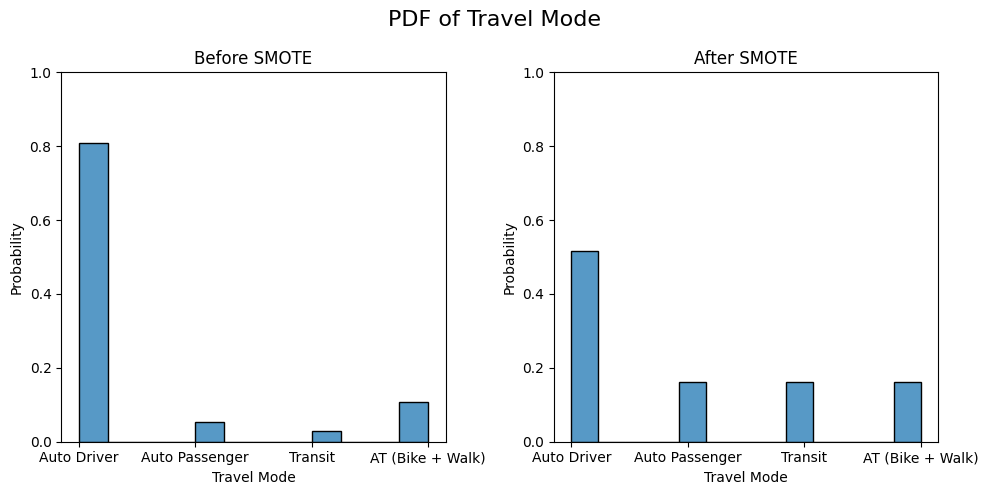

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_resampled is a Pandas Series and df is your DataFrame
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Define the custom labels for the categories
category_labels = ['Auto Driver', 'Auto Passenger', 'Transit', 'AT (Bike + Walk)']


# Plot the PDF of y_resampled
sns.histplot(y_resampled, kde=False, stat="probability", common_norm=False, ax=axes[1])
axes[1].set_title('After SMOTE')
axes[1].set_xlabel('Travel Mode')
axes[1].set_ylabel('Probability')
axes[1].set_ylim(0, 1.0)  # Set the y-axis limit
axes[1].set_xticks([1, 2, 3, 4])
axes[1].set_xticklabels(category_labels)

# Plot the PDF of df['PrimaryMode']
sns.histplot(df['New_Primary_Mode'], kde=False, stat="probability", common_norm=False, ax=axes[0])
axes[0].set_title('Before SMOTE')
axes[0].set_xlabel('Travel Mode')
axes[0].set_ylabel('Probability')
axes[0].set_ylim(0, 1.0)  # Set the y-axis limit
axes[0].set_xticks([1, 2, 3, 4])
axes[0].set_xticklabels(category_labels)

# Add a common title above both figures
fig.suptitle('PDF of Travel Mode', fontsize=16)
#plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the suptitle


plt.tight_layout()
plt.show()


In [ ]:
# Assume df is your DataFrame containing both features (X) and labels (Y)
New_X = pd.concat([X_resampled, y_resampled], axis=1)
New_y = New_X['TripStart']


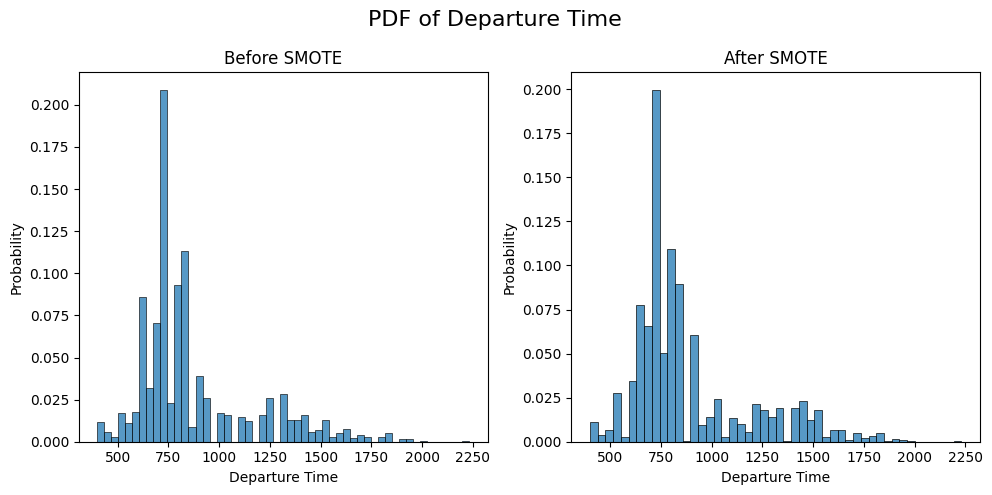

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_resampled is a Pandas Series and df is your DataFrame
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the PDF of y_resampled
sns.histplot(df['TripStart'], kde=False, stat="probability", common_norm=False, ax=axes[0])
axes[0].set_title('Before SMOTE')
axes[0].set_xlabel('Departure Time')
axes[0].set_ylabel('Probability')

# Plot the PDF of df['PrimaryMode']
sns.histplot(New_X['TripStart'], kde=False, stat="probability", common_norm=False, ax=axes[1])
axes[1].set_title('After SMOTE')
axes[1].set_xlabel('Departure Time')
axes[1].set_ylabel('Probability')

# Add a common title above both figures
fig.suptitle('PDF of Departure Time', fontsize=16)

plt.tight_layout()
plt.show()


# Split data into training x testing

In [ ]:
import numpy as np

from tensorflow.keras.utils import to_categorical


task1_labels = New_X['TripStart']

task2_labels = New_X['New_Primary_Mode']
task2_labels = to_categorical(task2_labels)
task2_labels = np.array([label[1:] for label in task2_labels])


input_data = New_X.drop(['TripStart','Period','New_Primary_Mode'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train_task1, y_test_task1, y_train_task2, y_test_task2, = train_test_split(
    input_data, task1_labels, task2_labels, test_size=0.2, random_state=42
)


# Single-output Model

## Departure Time (Task1)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Model
from keras.layers import Input, Dense, Concatenate, BatchNormalization
from keras.optimizers import Adam
from keras.metrics import Precision, Recall
import numpy as np
import keras
from keras.regularizers import l2

# Define the shared input layer
input_layer = Input(shape=(input_data.shape[1],))

# Define the shared hidden layers
shared_hidden_layer = Dense(300, activation='relu', kernel_regularizer=l2(0.0003))(input_layer)
shared_hidden_layer = BatchNormalization()(shared_hidden_layer)

shared_hidden_layer = Dense(300, activation='relu', kernel_regularizer=l2(0.0003))(shared_hidden_layer)
shared_hidden_layer = BatchNormalization()(shared_hidden_layer)

shared_hidden_layer = Dense(300, activation='relu', kernel_regularizer=l2(0.0003))(shared_hidden_layer)
shared_hidden_layer = BatchNormalization()(shared_hidden_layer)

shared_hidden_layer = Dense(500, activation='relu', kernel_regularizer=l2(0.0003))(shared_hidden_layer)
shared_hidden_layer = BatchNormalization()(shared_hidden_layer)

shared_hidden_layer = Dense(500, activation='relu', kernel_regularizer=l2(0.0003))(shared_hidden_layer)
shared_hidden_layer = BatchNormalization()(shared_hidden_layer)

# Define the Outputs
task1_output = Dense(1, name='task1_output')(shared_hidden_layer)

# Define the model with multiple outputs
model = Model(inputs=input_layer, outputs=[task1_output])

# Define a specific learning rate
learning_rate = 3e-4

# Instantiate an optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)


# Compile the model
model.compile(optimizer=optimizer,
              loss = ['mean_squared_error'],
              metrics=['mean_squared_error'])


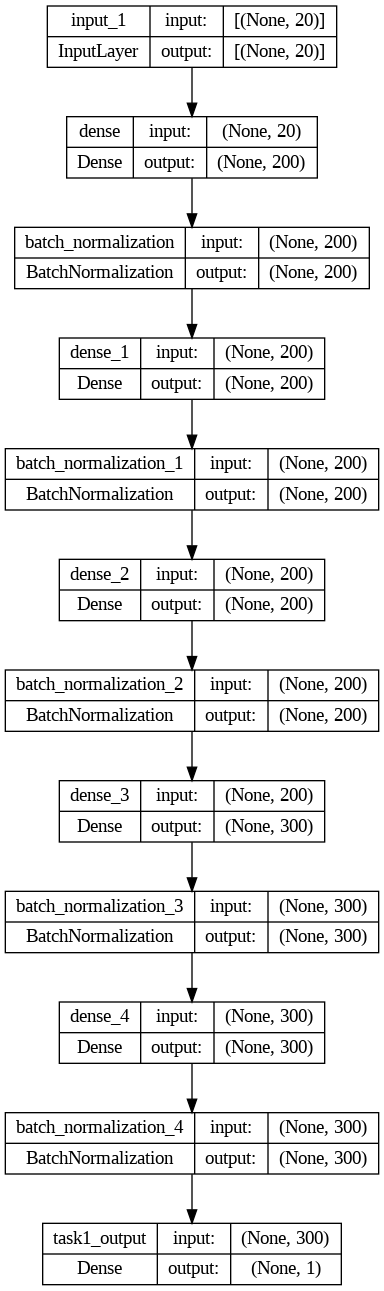

In [ ]:
import keras

keras.utils.plot_model(
    model, "ticket_classifier_with_shape_info.png", show_shapes=True)


In [ ]:
from keras.callbacks import EarlyStopping

'''
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model on the multi-task data with early stopping
history = model.fit(x_train, {'task1_output': y_train_task1},
                    epochs=1000, batch_size=32, validation_split=0.20, callbacks=[early_stopping])
'''


# Train the model on the multi-task data with early stopping
history = model.fit(x_train, {'task1_output': y_train_task1},
                    epochs=120, batch_size=32, validation_split=0.20)



Epoch 1/120
62/62 [==============================] - 8s 43ms/step - loss: 871054.8125 - mean_squared_error: 871054.3750 - val_loss: 910032.9375 - val_mean_squared_error: 910032.4375
Epoch 2/120
62/62 [==============================] - 1s 24ms/step - loss: 865106.5625 - mean_squared_error: 865106.1250 - val_loss: 924540.6875 - val_mean_squared_error: 924540.1875
Epoch 3/120
62/62 [==============================] - 1s 22ms/step - loss: 859010.9375 - mean_squared_error: 859010.4375 - val_loss: 933269.1250 - val_mean_squared_error: 933268.5625
Epoch 4/120
62/62 [==============================] - 2s 25ms/step - loss: 851245.7500 - mean_squared_error: 851245.3125 - val_loss: 959116.6250 - val_mean_squared_error: 959116.3125
Epoch 5/120
62/62 [==============================] - 1s 21ms/step - loss: 840488.5000 - mean_squared_error: 840488.0625 - val_loss: 940442.3125 - val_mean_squared_error: 940441.7500
Epoch 6/120
62/62 [==============================] - 1s 21ms/step - loss: 830779.6250 - me

In [ ]:
# Evaluate the model on the testing data
y_pred_task1 = model.predict(x_test)



20/20 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test_task1, y_pred_task1) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 18.15%


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Calculate the metrics
mape = mean_absolute_percentage_error(y_test_task1, y_pred_task1) * 100
mae = mean_absolute_error(y_test_task1, y_pred_task1)
mse = mean_squared_error(y_test_task1, y_pred_task1)
r2 = r2_score(y_test_task1, y_pred_task1)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['MAPE', 'MAE', 'MSE', 'R2'],
    'Value': [f'{mape:.2f}%', f'{mae:.2f}', f'{mse:.2f}', f'{r2:.2f}']
})

print(metrics_df)


  Metric     Value
0   MAPE    18.15%
1    MAE    159.72
2    MSE  64155.21
3     R2      0.24


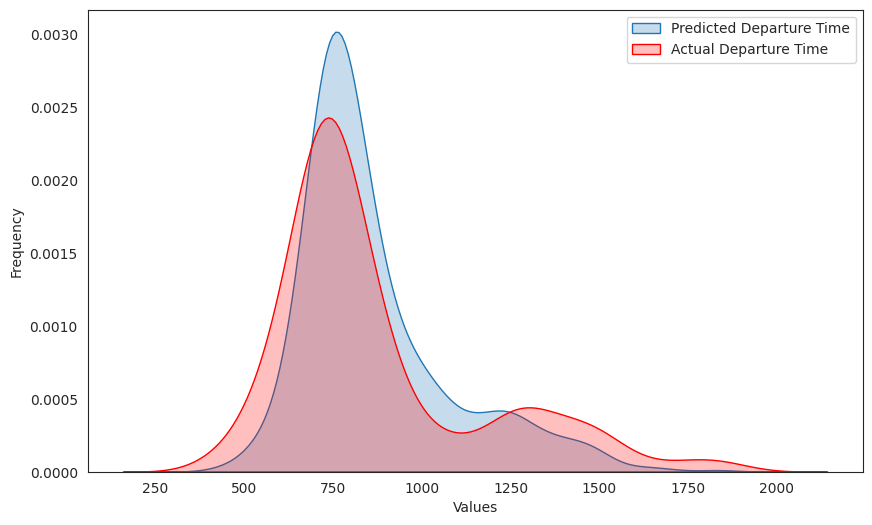

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the frequency curves
sns.kdeplot(y_pred_task1, label='Predicted Departure Time', color='red', fill=True)

sns.kdeplot(y_test_task1, label='Actual Departure Time', color='red', fill=True)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


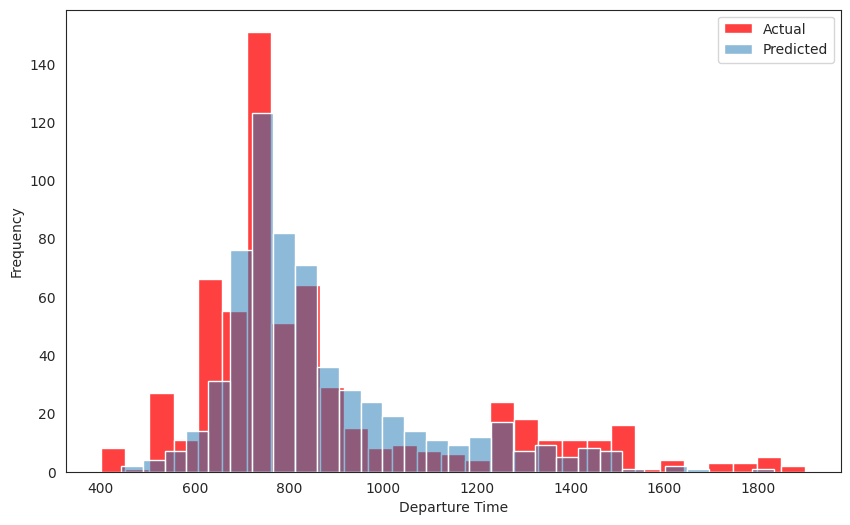

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the frequency curves
sns.histplot(y_test_task1, label='Actual', color='red')
sns.histplot(y_pred_task1, label='Predicted', color='red')

# Add labels and title
plt.xlabel('Departure Time')
plt.ylabel('Frequency')
#plt.title('Histogram of Actual vs. Predicted Departure Time (SO-NN)')
plt.legend()

# Show the plot
plt.show()


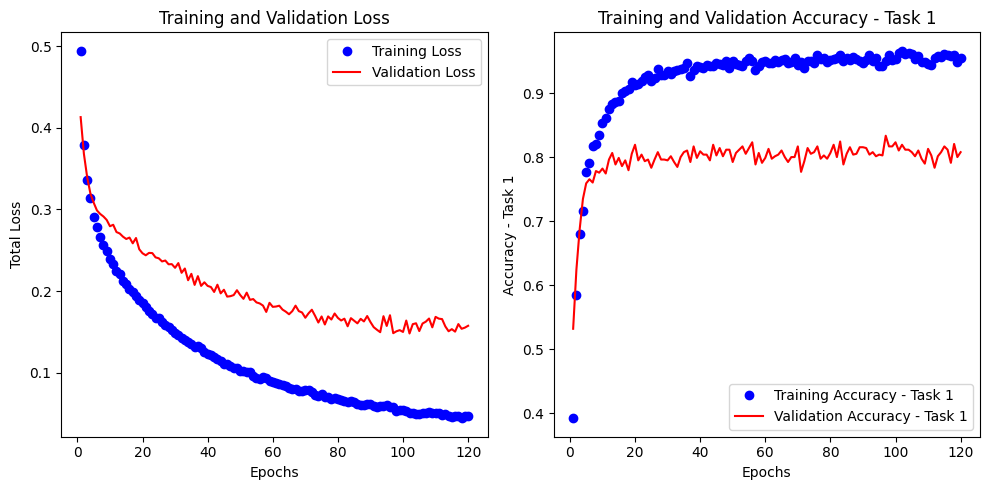

In [ ]:
import matplotlib.pyplot as plt

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss
plt.figure(figsize=(10, 5))

# Subplot 1: Loss
plt.subplot(1, 2, 1)
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.legend()

# Extract accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy - Task 1')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy - Task 1')
plt.title('Training and Validation Accuracy - Task 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy - Task 1')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model on the testing data
y_pred_task1 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 1
y_pred_classes1 = np.argmax(y_pred_task1, axis=1)
y_true_classes1 = np.argmax(y_test_task1, axis=1)


31/31 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy1 = accuracy_score(y_true_classes1, y_pred_classes1)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss1 = cross_entropy_loss(y_pred_task1, y_test_task1)

# Calculate precision, recall, and F1-score for each task
precision1 = precision_score(y_true_classes1, y_pred_classes1, average='weighted')

recall1 = recall_score(y_true_classes1, y_pred_classes1, average='weighted')

f1_score1 = f1_score(y_true_classes1, y_pred_classes1, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 1"],
    "Overall Accuracy": [overall_accuracy1],
    "Cross-Entropy Loss": [loss1],
    "Precision": [precision1],
    "Recall": [recall1],
    "F1 Score": [f1_score1]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 1          0.804103            0.627495   0.812273  0.804103  0.806454

## Mode Choice (Task 2)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Model
from keras.layers import Input, Dense, Concatenate, BatchNormalization
from keras.optimizers import Adam
from keras.metrics import Precision, Recall
import numpy as np
import keras
from keras.regularizers import l2

# Define the shared input layer
input_layer = Input(shape=(input_data.shape[1],))

# Define the shared hidden layers
shared_hidden_layer = Dense(30, activation='relu', kernel_regularizer=l2(0.0003))(input_layer)
shared_hidden_layer = BatchNormalization()(shared_hidden_layer)

shared_hidden_layer = Dense(300, activation='relu', kernel_regularizer=l2(0.0003))(shared_hidden_layer)
shared_hidden_layer = BatchNormalization()(shared_hidden_layer)

shared_hidden_layer = Dense(300, activation='relu', kernel_regularizer=l2(0.0003))(shared_hidden_layer)
shared_hidden_layer = BatchNormalization()(shared_hidden_layer)

shared_hidden_layer = Dense(500, activation='relu', kernel_regularizer=l2(0.0003))(shared_hidden_layer)
shared_hidden_layer = BatchNormalization()(shared_hidden_layer)

shared_hidden_layer = Dense(500, activation='relu', kernel_regularizer=l2(0.0003))(shared_hidden_layer)
shared_hidden_layer = BatchNormalization()(shared_hidden_layer)

# Define the Outputs
task2_output = Dense(4, activation="softmax", name='task2_output')(shared_hidden_layer)

# Define the model with multiple outputs
model = Model(inputs=input_layer, outputs=[task2_output])

# Define a specific learning rate
learning_rate = 3e-4

# Instantiate an optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)


# Compile the model
model.compile(optimizer=optimizer,
              loss = ['categorical_crossentropy'],
              metrics=['accuracy'])


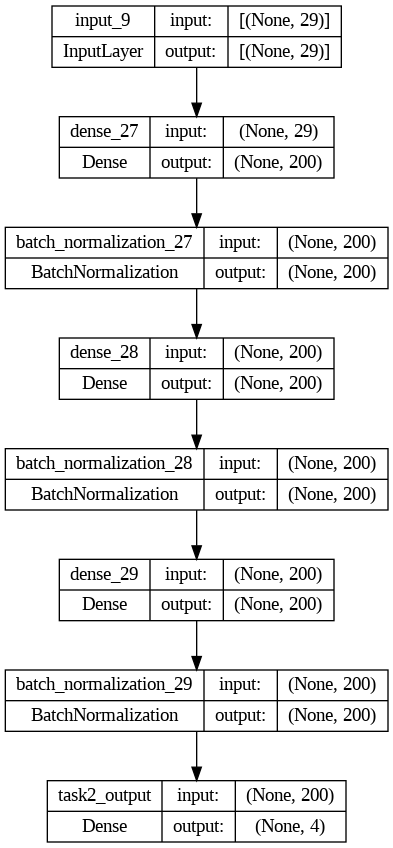

In [ ]:
import keras

keras.utils.plot_model(
    model, "ticket_classifier_with_shape_info.png", show_shapes=True)


In [ ]:
from keras.callbacks import EarlyStopping

'''
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model on the multi-task data with early stopping
history = model.fit(x_train, {'task2_output': y_train_task2},
                    epochs=1000, batch_size=32, validation_split=0.20, callbacks=[early_stopping])
'''

history = model.fit(x_train, {'task2_output': y_train_task2},
                    epochs=120, batch_size=32, validation_split=0.20)


Epoch 1/120
62/62 [==============================] - 7s 29ms/step - loss: 1.6641 - accuracy: 0.5282 - val_loss: 1.5898 - val_accuracy: 0.5060
Epoch 2/120
62/62 [==============================] - 1s 21ms/step - loss: 1.2065 - accuracy: 0.6951 - val_loss: 1.5040 - val_accuracy: 0.5060
Epoch 3/120
62/62 [==============================] - 1s 23ms/step - loss: 1.0660 - accuracy: 0.7475 - val_loss: 1.4030 - val_accuracy: 0.5323
Epoch 4/120
62/62 [==============================] - 2s 30ms/step - loss: 0.9876 - accuracy: 0.7692 - val_loss: 1.2855 - val_accuracy: 0.6169
Epoch 5/120
62/62 [==============================] - 2s 39ms/step - loss: 0.9451 - accuracy: 0.7893 - val_loss: 1.2033 - val_accuracy: 0.6754
Epoch 6/120
62/62 [==============================] - 2s 26ms/step - loss: 0.8560 - accuracy: 0.8110 - val_loss: 1.1534 - val_accuracy: 0.6815
Epoch 7/120
62/62 [==============================] - 1s 19ms/step - loss: 0.8316 - accuracy: 0.8271 - val_loss: 1.1851 - val_accuracy: 0.6996
Epoch 

In [ ]:
# Evaluate the model on the testing data
y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 1
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)


20/20 [==============================] - 0s 3ms/step


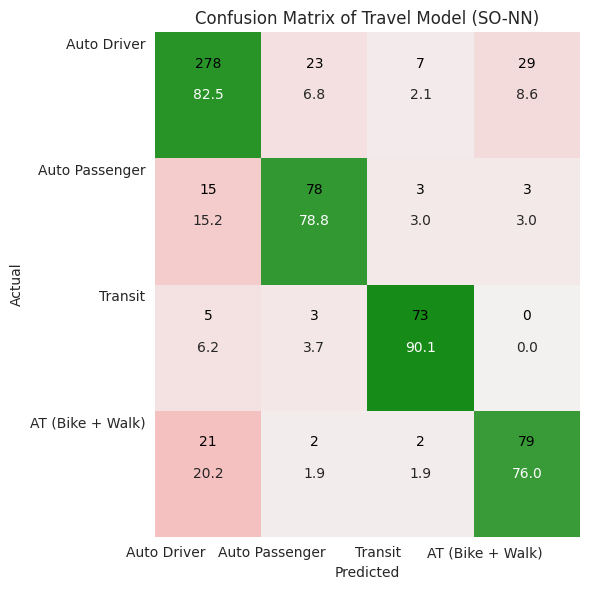

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Define category labels and indices mapping
category_labels = ['Auto Driver', 'Auto Passenger', 'Transit', 'AT (Bike + Walk)']
category_indices = {label: idx for idx, label in enumerate(category_labels)}


# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)

    # Set xticks and yticks with category labels
    ax.set_xticks(np.arange(len(category_labels)) + 0.1)
    ax.set_yticks(np.arange(len(category_labels)) + 0.1)
    ax.set_xticklabels(category_labels, rotation=0)
    ax.set_yticklabels(category_labels, rotation=0)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 6))  # Change to 1 subplot

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs, conf_matrix2, 'Confusion Matrix of Travel Model (SO-NN)')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 2"],
    "Overall Accuracy": [overall_accuracy2],
    "Cross-Entropy Loss": [loss2],
    "Precision": [precision2],
    "Recall": [recall2],
    "F1 Score": [f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 2          0.818035            0.876124   0.821447  0.818035  0.819056

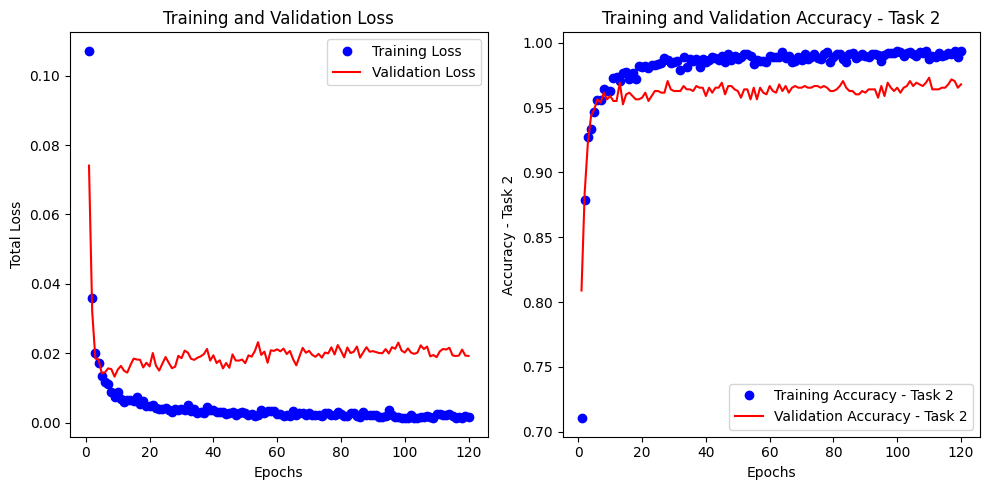

In [ ]:
import matplotlib.pyplot as plt

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss
plt.figure(figsize=(10, 5))

# Subplot 1: Loss
plt.subplot(1, 2, 1)
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.legend()

# Extract accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy - Task 2')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy - Task 2')
plt.title('Training and Validation Accuracy - Task 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy - Task 2')
plt.legend()

plt.tight_layout()
plt.show()


# Multi-task Learning Model

## Hard Parameter + Weight Decay

In [ ]:
pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import keras_tuner as kt
from keras.layers import Input, Dense, Concatenate, Dropout, BatchNormalization

def build_model(hp):
    # Define the shared input layer

    num_of_neurons_shared_layers = hp.Choice('num_of_neurons_shared_layers', [50, 100, 150, 200,300,500])
    num_of_neurons_task_layers   = hp.Choice('num_of_neurons_task_layers', [50, 100, 150, 200,300,500])

    lamda1 = l2(hp.Choice('lambda1', [0.0, 3e-4, 3e-2]))
    lamda2 = l2(hp.Choice('lambda2', [0.0, 3e-4, 3e-2]))
    lamda3 = l2(hp.Choice('lambda3', [0.0, 3e-4, 3e-2]))


    input_layer = Input(shape=(input_data.shape[1],))

    # Define the shared hidden layers with L2 regularization
    shared_hidden_layer_1 = Dense(units=num_of_neurons_shared_layers,
                                  activation='relu', kernel_regularizer=lamda1)(input_layer)

    shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)

    shared_hidden_layer_2 = Dense(units=num_of_neurons_shared_layers,
                                  activation='relu', kernel_regularizer=lamda1)(shared_hidden_layer_1)

    shared_hidden_layer_2 = BatchNormalization()(shared_hidden_layer_2)

    shared_hidden_layer_3 = Dense(units=num_of_neurons_shared_layers,
                                  activation='relu', kernel_regularizer=lamda1)(shared_hidden_layer_2)

    shared_hidden_layer_3 = BatchNormalization()(shared_hidden_layer_3)


    # Define task-specific output layers - Task1
    task1_hidden_layer_1 = Dense(units=num_of_neurons_task_layers,
                                  activation='relu', kernel_regularizer=lamda2)(shared_hidden_layer_1)

    task1_hidden_layer_1 = BatchNormalization()(task1_hidden_layer_1)


    task1_hidden_layer_2 = Dense(units=num_of_neurons_task_layers,
                                  activation='relu', kernel_regularizer=lamda2)(task1_hidden_layer_1)

    task1_hidden_layer_2 = BatchNormalization()(task1_hidden_layer_2)


    # Define task-specific output layers - Task2
    task2_hidden_layer_1 = Dense(units=num_of_neurons_task_layers,
                                  activation='relu', kernel_regularizer=lamda3)(shared_hidden_layer_1)

    task2_hidden_layer_1 = BatchNormalization()(task2_hidden_layer_1)


    task2_hidden_layer_2 = Dense(units=num_of_neurons_task_layers,
                                  activation='relu', kernel_regularizer=lamda3)(task2_hidden_layer_1)

    task2_hidden_layer_2 = BatchNormalization()(task2_hidden_layer_2)



    # Define the Outputs
    task1_output = Dense(1, name='task1_output')(task1_hidden_layer_2)
    task2_output = Dense(4, activation="softmax", name='task2_output')(task2_hidden_layer_2)

    # Define the model with multiple outputs
    model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

    # Define the learning rate
    learning_rate = 3e-4

    # Instantiate an optimizer with the desired learning rate
    optimizer = Adam(learning_rate=learning_rate)

    # Compile the model with the custom loss function
    model.compile(optimizer=optimizer,
                  loss = ['mean_squared_error','categorical_crossentropy'],
                  metrics=['mean_squared_error','accuracy'])

    return model



### Keras Tuner Training

In [ ]:
# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective=kt.Objective('val_task2_output_accuracy',direction="max"),
                     max_epochs=20,
                     directory='keras_tuner_dir',
                     project_name='multi_task_model_tuning',
                     overwrite=True
                     )


# Search for the best hyperparameters
tuner.search(input_data, [task1_labels, task2_labels], epochs=50, validation_split=0.2)



Trial 30 Complete [00h 00m 41s]
val_task2_output_accuracy: 0.7310789227485657

Best val_task2_output_accuracy So Far: 0.7342995405197144
Total elapsed time: 00h 06m 50s


In [ ]:
# Retrieve the best hyperparameters
best_trials = tuner.oracle.get_best_trials(1)[0]
best_hyperparameters = best_trials.hyperparameters.values

from prettytable import PrettyTable
table = PrettyTable(["Parameter", "Value"])

for param, value in best_hyperparameters.items():
    table.add_row([param, value])

print(table)

+------------------------------+--------+
|          Parameter           | Value  |
+------------------------------+--------+
| num_of_neurons_shared_layers |  300   |
|  num_of_neurons_task_layers  |  500   |
|           lambda1            | 0.0003 |
|           lambda2            | 0.0003 |
|           lambda3            | 0.0003 |
|         tuner/epochs         |   20   |
|     tuner/initial_epoch      |   7    |
|        tuner/bracket         |   1    |
|         tuner/round          |   1    |
|        tuner/trial_id        |  0019  |
+------------------------------+--------+


In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 20)]                 0         []                            
                                                                                                  
 dense_7 (Dense)             (None, 300)                  6300      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_7 (Bat  (None, 300)                  1200      ['dense_7[0][0]']             
 chNormalization)                                                                                 
                                                                                                  
 dense_10 (Dense)            (None, 500)                  150500    ['batch_normalization_7[

In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(x_train, [y_train_task1, y_train_task2], epochs=120)


Epoch 1/120
78/78 [==============================] - 4s 15ms/step - loss: 877742.9375 - task1_output_loss: 877741.3125 - task2_output_loss: 1.1244 - task1_output_mean_squared_error: 877741.3125 - task1_output_accuracy: 0.0000e+00 - task2_output_mean_squared_error: 0.1403 - task2_output_accuracy: 0.5794
Epoch 2/120
78/78 [==============================] - 1s 15ms/step - loss: 871539.6250 - task1_output_loss: 871538.2500 - task2_output_loss: 0.7168 - task1_output_mean_squared_error: 871538.2500 - task1_output_accuracy: 0.0000e+00 - task2_output_mean_squared_error: 0.0953 - task2_output_accuracy: 0.7242
Epoch 3/120
78/78 [==============================] - 1s 15ms/step - loss: 864111.5625 - task1_output_loss: 864110.6875 - task2_output_loss: 0.5997 - task1_output_mean_squared_error: 864110.6875 - task1_output_accuracy: 0.0000e+00 - task2_output_mean_squared_error: 0.0798 - task2_output_accuracy: 0.7669
Epoch 4/120
78/78 [==============================] - 1s 16ms/step - loss: 855118.3750 - 

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)

20/20 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test_task1, y_pred_task1) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 18.57%


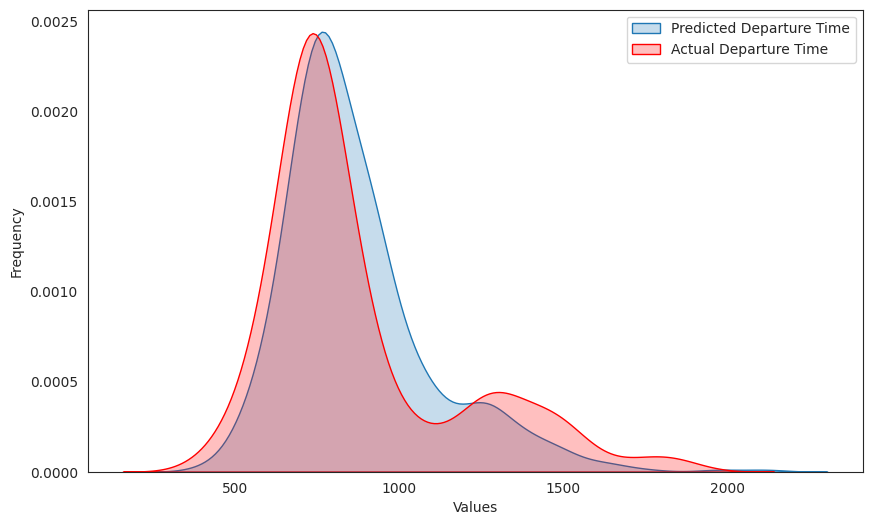

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the frequency curves
sns.kdeplot(y_pred_task1, label='Predicted Departure Time', color='red', fill=True)

sns.kdeplot(y_test_task1, label='Actual Departure Time', color='red', fill=True)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


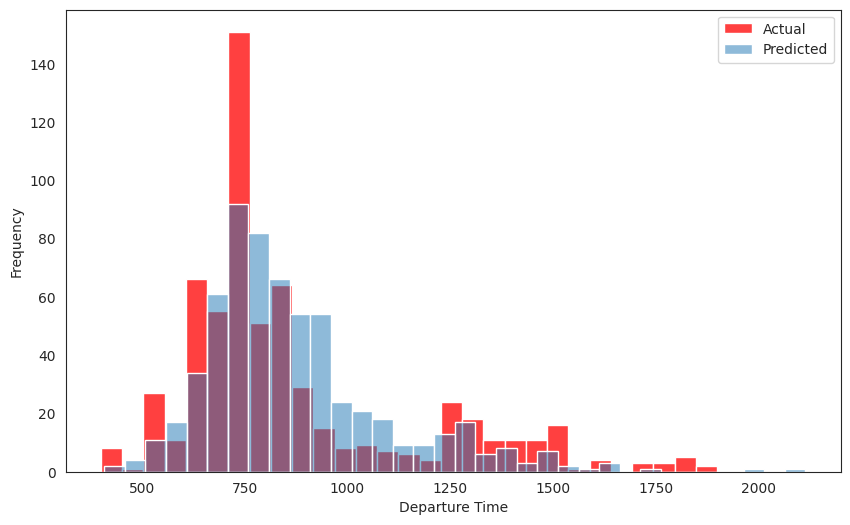

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the frequency curves
sns.histplot(y_test_task1, label='Actual', color='red')
sns.histplot(y_pred_task1, label='Predicted', color='red')

# Add labels and title
plt.xlabel('Departure Time')
plt.ylabel('Frequency')
#plt.title('Histogram of Actual vs. Predicted Departure Time (SO-NN)')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

# Sample data for demonstration purposes
# Assuming y_test_task1 and y_pred_task1 are your arrays
# y_test_task1 = np.array([values])
# y_pred_task1 = np.array([values])

# Ensure they are 1-dimensional
y_test_task1 = np.ravel(y_test_task1)
y_pred_task1 = np.ravel(y_pred_task1)

def convert_to_minutes(value):
    # Convert HHMM format to minutes
    hours = value // 100
    minutes = value % 100
    return hours * 60 + minutes

def convert_to_hhmm(minutes):
    # Convert minutes back to HHMM format
    hours = minutes // 60
    minutes = minutes % 60
    return hours * 100 + minutes

def convert_time(value):
    # Extract hours and minutes
    hours = value // 100
    minutes = value % 100

    # Convert any excess minutes to hours
    if minutes >= 60:
        hours += minutes // 60
        minutes = minutes % 60

    # Ensure the hours and minutes are correctly formatted
    return hours * 100 + minutes

# Apply the conversion to y_pred_task1
y_pred_task1_converted = np.array([convert_time(value) for value in y_pred_task1])

# Convert times to minutes
y_test_task1_minutes = np.array([convert_to_minutes(value) for value in y_test_task1])
y_pred_task1_minutes = np.array([convert_to_minutes(value) for value in y_pred_task1])

# Calculate the difference in minutes
time_difference_minutes = y_test_task1_minutes - y_pred_task1_minutes

# Convert the difference back to HHMM format
time_difference_hhmm = np.array([convert_to_hhmm(abs(diff)) for diff in time_difference_minutes])

# Create a DataFrame
df = pd.DataFrame({
    'y_test_task1': y_test_task1,
    'Original_y_pred_task1': y_pred_task1,
    'Fixed_y_pred_task1': y_pred_task1_converted,
    'time_difference': time_difference_hhmm
})

# Save the DataFrame to an Excel file
file_name = 'MTL_Hard_Parameter.xlsx'
df.to_excel(file_name, index=False)

# Download the file
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Calculate the metrics
mape = mean_absolute_percentage_error(y_test_task1, y_pred_task1) * 100
mae = mean_absolute_error(y_test_task1, y_pred_task1)
mse = mean_squared_error(y_test_task1, y_pred_task1)
r2 = r2_score(y_test_task1, y_pred_task1)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['MAPE', 'MAE', 'MSE', 'R2'],
    'Value': [f'{mape:.2f}%', f'{mae:.2f}', f'{mse:.2f}', f'{r2:.2f}']
})

print(metrics_df)


  Metric     Value
0   MAPE    18.57%
1    MAE    164.06
2    MSE  59246.78
3     R2      0.30


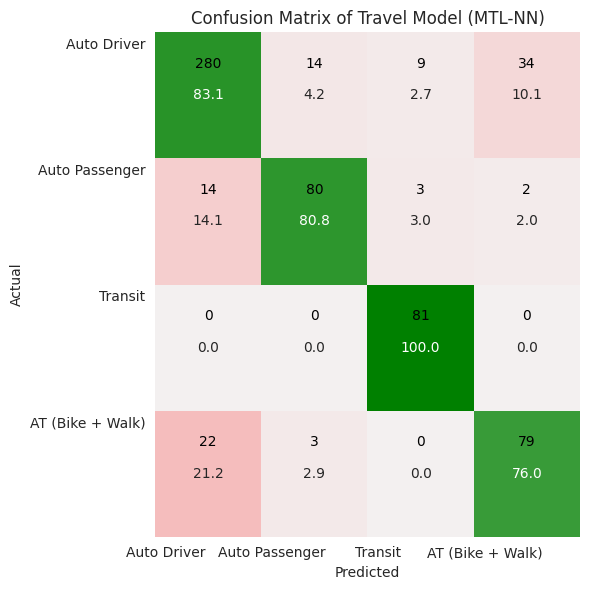

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Define category labels and indices mapping
category_labels = ['Auto Driver', 'Auto Passenger', 'Transit', 'AT (Bike + Walk)']
category_indices = {label: idx for idx, label in enumerate(category_labels)}


# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)

    # Set xticks and yticks with category labels
    ax.set_xticks(np.arange(len(category_labels)) + 0.1)
    ax.set_yticks(np.arange(len(category_labels)) + 0.1)
    ax.set_xticklabels(category_labels, rotation=0)
    ax.set_yticklabels(category_labels, rotation=0)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 6))  # Change to 1 subplot

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs, conf_matrix2, 'Confusion Matrix of Travel Model (MTL-NN)')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 2"],
    "Overall Accuracy": [overall_accuracy2],
    "Cross-Entropy Loss": [loss2],
    "Precision": [precision2],
    "Recall": [recall2],
    "F1 Score": [f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 2          0.837359             0.71353   0.840981  0.837359  0.837789

### Standalone Testing

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras.layers import Input, Dense, Concatenate, Dropout, BatchNormalization


num_of_neurons_shared_layers = 100
num_of_neurons_task_layers   = 500

lamda1 = 0.0
lamda2 = 0.03
lamda3 = 0.0


input_layer = Input(shape=(input_data.shape[1],))

# Define the shared hidden layers with L2 regularization
shared_hidden_layer_1 = Dense(units=num_of_neurons_shared_layers,
                                activation='relu', kernel_regularizer=l2(lamda1))(input_layer)

shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)

shared_hidden_layer_2 = Dense(units=num_of_neurons_shared_layers,
                                activation='relu', kernel_regularizer=l2(lamda1))(shared_hidden_layer_1)

shared_hidden_layer_2 = BatchNormalization()(shared_hidden_layer_2)

shared_hidden_layer_3 = Dense(units=num_of_neurons_shared_layers,
                                activation='relu', kernel_regularizer=l2(lamda1))(shared_hidden_layer_2)

shared_hidden_layer_3 = BatchNormalization()(shared_hidden_layer_3)


# Define task-specific output layers - Task1
task1_hidden_layer_1 = Dense(units=num_of_neurons_task_layers,
                                activation='relu', kernel_regularizer=l2(lamda2))(shared_hidden_layer_1)

task1_hidden_layer_1 = BatchNormalization()(task1_hidden_layer_1)


task1_hidden_layer_2 = Dense(units=num_of_neurons_task_layers,
                                activation='relu', kernel_regularizer=l2(lamda2))(task1_hidden_layer_1)

task1_hidden_layer_2 = BatchNormalization()(task1_hidden_layer_2)


# Define task-specific output layers - Task2
task2_hidden_layer_1 = Dense(units=num_of_neurons_task_layers,
                                activation='relu', kernel_regularizer=l2(lamda3))(shared_hidden_layer_1)

task2_hidden_layer_1 = BatchNormalization()(task2_hidden_layer_1)


task2_hidden_layer_2 = Dense(units=num_of_neurons_task_layers,
                                activation='relu', kernel_regularizer=l2(lamda3))(task2_hidden_layer_1)

task2_hidden_layer_2 = BatchNormalization()(task2_hidden_layer_2)



# Define the Outputs
task1_output = Dense(1, name='task1_output')(task1_hidden_layer_2)
task2_output = Dense(4, activation="softmax", name='task2_output')(task2_hidden_layer_2)

# Define the model with multiple outputs
model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

# Define the learning rate
learning_rate = 3e-4

# Instantiate an optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the custom loss function
model.compile(optimizer=optimizer,
                loss = ['mean_squared_error','categorical_crossentropy'],
                metrics=['mean_squared_error','accuracy'])




In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 20)]                 0         []                            
                                                                                                  
 dense_7 (Dense)             (None, 100)                  2100      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_7 (Bat  (None, 100)                  400       ['dense_7[0][0]']             
 chNormalization)                                                                                 
                                                                                                  
 dense_10 (Dense)            (None, 500)                  50500     ['batch_normalization_7[

In [ ]:
from keras.callbacks import EarlyStopping

'''
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model on the multi-task data with early stopping
history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=1000, batch_size=100, validation_split=0.20, callbacks=[early_stopping])
'''

history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=120, validation_split=0.20)



Epoch 1/120
62/62 [==============================] - 8s 33ms/step - loss: 871713.6875 - task1_output_loss: 871692.6250 - task2_output_loss: 1.1702 - task1_output_mean_squared_error: 871692.6250 - task1_output_accuracy: 0.0000e+00 - task2_output_mean_squared_error: 0.1491 - task2_output_accuracy: 0.5554 - val_loss: 904026.0000 - val_task1_output_loss: 904004.8125 - val_task2_output_loss: 1.1408 - val_task1_output_mean_squared_error: 904004.8125 - val_task1_output_accuracy: 0.0000e+00 - val_task2_output_mean_squared_error: 0.1533 - val_task2_output_accuracy: 0.5081
Epoch 2/120
62/62 [==============================] - 1s 22ms/step - loss: 867650.0000 - task1_output_loss: 867629.1875 - task2_output_loss: 0.7747 - task1_output_mean_squared_error: 867629.1875 - task1_output_accuracy: 0.0000e+00 - task2_output_mean_squared_error: 0.0999 - task2_output_accuracy: 0.7188 - val_loss: 903383.8125 - val_task1_output_loss: 903362.5000 - val_task2_output_loss: 1.0464 - val_task1_output_mean_squared_e

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)

20/20 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test_task1, y_pred_task1) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 19.57%


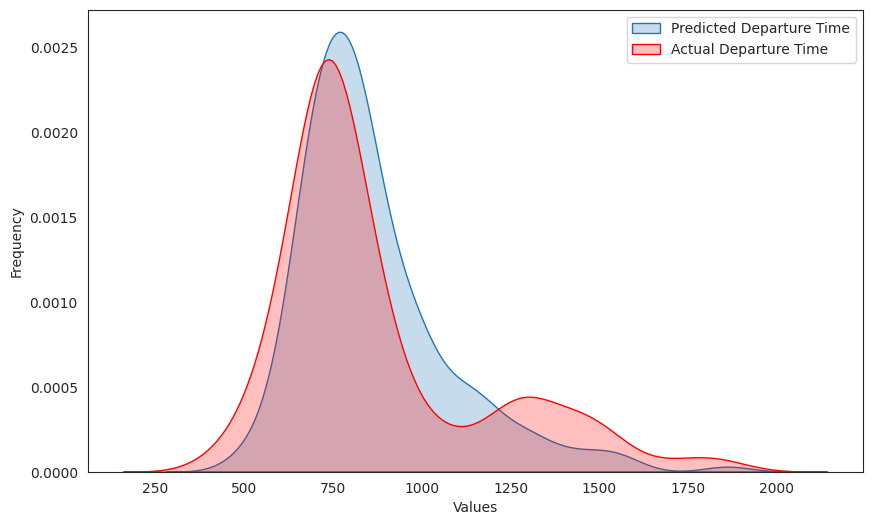

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the frequency curves
sns.kdeplot(y_pred_task1, label='Predicted Departure Time', color='red', fill=True)

sns.kdeplot(y_test_task1, label='Actual Departure Time', color='red', fill=True)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


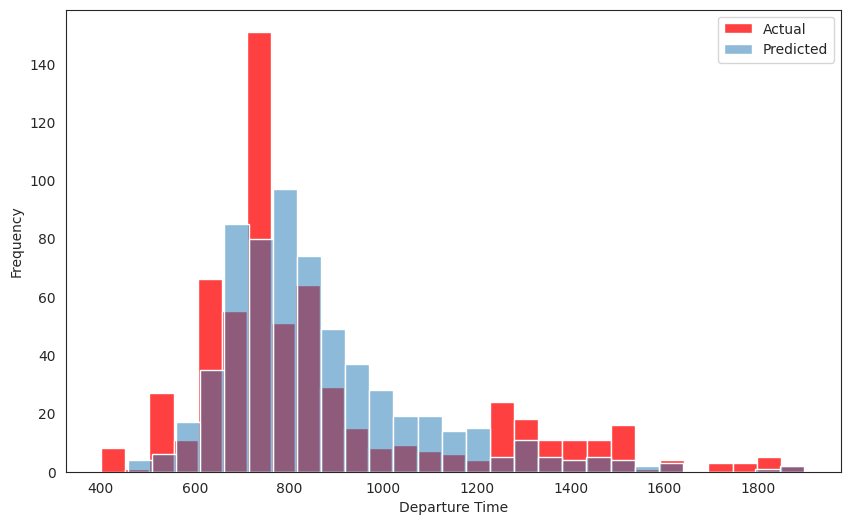

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the frequency curves
sns.histplot(y_test_task1, label='Actual', color='red')
sns.histplot(y_pred_task1, label='Predicted', color='red')

# Add labels and title
plt.xlabel('Departure Time')
plt.ylabel('Frequency')
#plt.title('Histogram of Actual vs. Predicted Departure Time (SO-NN)')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Calculate the metrics
mape = mean_absolute_percentage_error(y_test_task1, y_pred_task1) * 100
mae = mean_absolute_error(y_test_task1, y_pred_task1)
mse = mean_squared_error(y_test_task1, y_pred_task1)
r2 = r2_score(y_test_task1, y_pred_task1)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['MAPE', 'MAE', 'MSE', 'R2'],
    'Value': [f'{mape:.2f}%', f'{mae:.2f}', f'{mse:.2f}', f'{r2:.2f}']
})

print(metrics_df)


  Metric     Value
0   MAPE    19.57%
1    MAE    174.52
2    MSE  68996.15
3     R2      0.19


In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

# Sample data for demonstration purposes
# Assuming y_test_task1 and y_pred_task1 are your arrays
# y_test_task1 = np.array([values])
# y_pred_task1 = np.array([values])

# Ensure they are 1-dimensional
y_test_task1 = np.ravel(y_test_task1)
y_pred_task1 = np.ravel(y_pred_task1)

def convert_to_minutes(value):
    # Convert HHMM format to minutes
    hours = value // 100
    minutes = value % 100
    return hours * 60 + minutes

def convert_to_hhmm(minutes):
    # Convert minutes back to HHMM format
    hours = minutes // 60
    minutes = minutes % 60
    return hours * 100 + minutes

# Convert times to minutes
y_test_task1_minutes = np.array([convert_to_minutes(value) for value in y_test_task1])
y_pred_task1_minutes = np.array([convert_to_minutes(value) for value in y_pred_task1])

# Calculate the difference in minutes
time_difference_minutes = y_test_task1_minutes - y_pred_task1_minutes

# Convert the difference back to HHMM format
time_difference_hhmm = np.array([convert_to_hhmm(abs(diff)) for diff in time_difference_minutes])

# Create a DataFrame
df = pd.DataFrame({
    'y_test_task1': y_test_task1,
    'y_pred_task1': y_pred_task1,
    'time_difference': time_difference_hhmm
})

# Save the DataFrame to an Excel file
file_name = 'time_difference_values.xlsx'
df.to_excel(file_name, index=False)

# Download the file
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

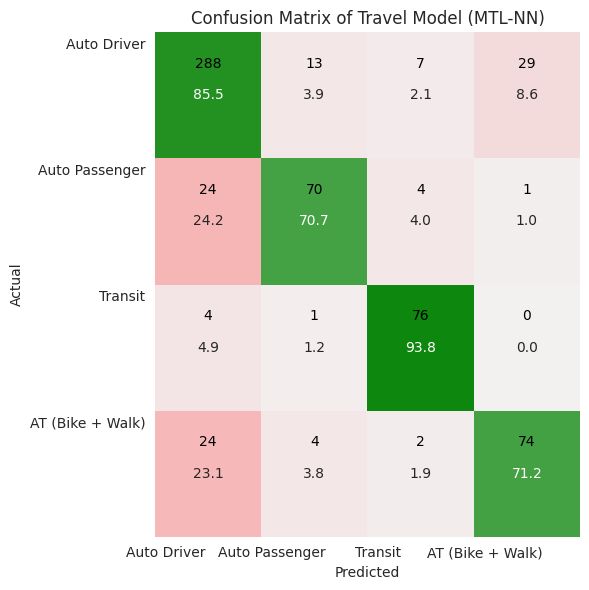

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

# Define category labels and indices mapping
category_labels = ['Auto Driver', 'Auto Passenger', 'Transit', 'AT (Bike + Walk)']
category_indices = {label: idx for idx, label in enumerate(category_labels)}


# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)

    # Set xticks and yticks with category labels
    ax.set_xticks(np.arange(len(category_labels)) + 0.1)
    ax.set_yticks(np.arange(len(category_labels)) + 0.1)
    ax.set_xticklabels(category_labels, rotation=0)
    ax.set_yticklabels(category_labels, rotation=0)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 6))  # Change to 1 subplot

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs, conf_matrix2, 'Confusion Matrix of Travel Model (MTL-NN)')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 2"],
    "Overall Accuracy": [overall_accuracy2],
    "Cross-Entropy Loss": [loss2],
    "Precision": [precision2],
    "Recall": [recall2],
    "F1 Score": [f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 2          0.818035            0.811981   0.817033  0.818035  0.816852

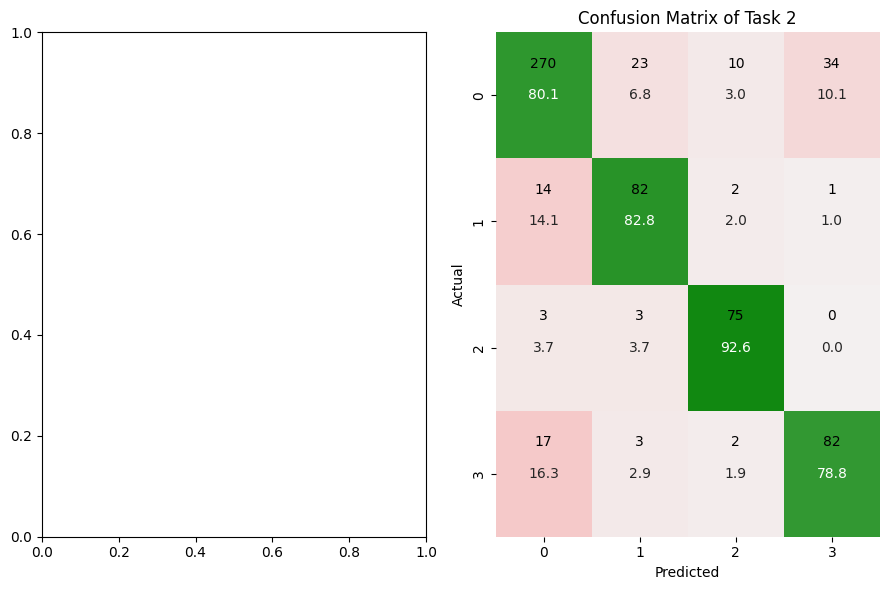

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 6))


# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs[1], conf_matrix2, 'Confusion Matrix of Task 2')

plt.tight_layout()
plt.show()


In [ ]:
import keras_tuner as kt
from keras.models import Model
from keras.layers import Input, Dense, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
import tensorflow as tf
import numpy as np

# Function to build the model
def build_model(hp):
    input_layer = Input(shape=(input_data.shape[1],))

    # Shared hidden layers
    x = input_layer
    for i in range(hp.Int('num_shared_layers', 1, 5)):
        x = Dense(
            units=hp.Choice('shared_units', [50, 100, 150, 200]),
            activation='relu',
            kernel_regularizer=l2(hp.Float('lambda1', 1e-5, 1e-2, sampling='LOG'))
        )(x)
        x = BatchNormalization()(x)

    # Task-specific layers for both tasks
    num_task_layers = hp.Int('num_task_layers', 1, 5)
    task_units = hp.Choice('task_units', [50, 100, 150, 200])
    lambda2 = hp.Float('lambda2', 1e-5, 1e-2, sampling='LOG')
    lambda3 = hp.Float('lambda3', 1e-5, 1e-2, sampling='LOG')

    task1 = x
    task2 = x
    for i in range(num_task_layers):
        task1 = Dense(
            units=task_units,
            activation='relu',
            kernel_regularizer=l2(lambda2)
        )(task1)
        task1 = BatchNormalization()(task1)

        task2 = Dense(
            units=task_units,
            activation='relu',
            kernel_regularizer=l2(lambda3)
        )(task2)
        task2 = BatchNormalization()(task2)

    task1_output = Dense(1, name='task1_output')(task1)
    task2_output = Dense(4, activation="softmax", name='task2_output')(task2)

    # Define the model
    model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=3e-4),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model



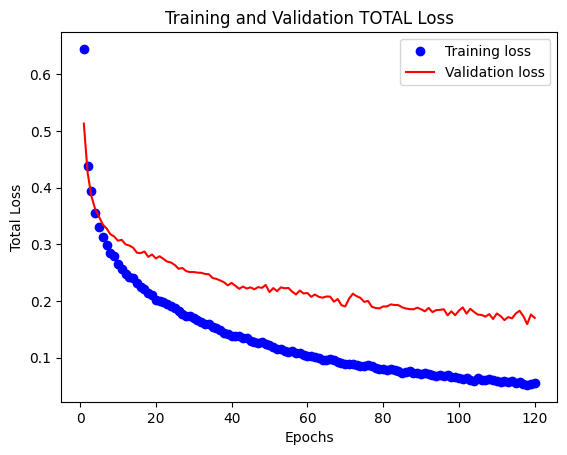

In [ ]:
# Extract accuracy values
train_accuracy = history.history['loss']
val_accuracy = history.history['val_loss']

# Plot accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'bo', label='Training loss')
plt.plot(epochs, val_accuracy, 'r', label='Validation loss')
plt.title('Training and Validation TOTAL Loss')
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.legend()
plt.show()

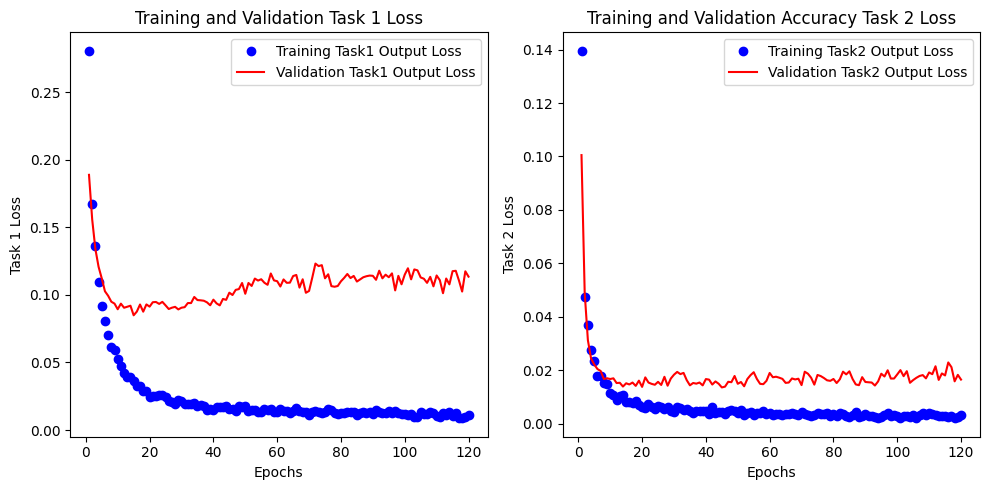

In [ ]:
import matplotlib.pyplot as plt

# Extract loss values
train_loss = history.history['task1_output_loss']
val_loss = history.history['val_task1_output_loss']

# Plot loss
plt.figure(figsize=(10, 5))

# Subplot 1: Loss
plt.subplot(1, 2, 1)
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training Task1 Output Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Task1 Output Loss')
plt.title('Training and Validation Task 1 Loss')
plt.xlabel('Epochs')
plt.ylabel('Task 1 Loss')
plt.legend()

# Extract accuracy values
train_accuracy = history.history['task2_output_loss']
val_accuracy = history.history['val_task2_output_loss']

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'bo', label='Training Task2 Output Loss')
plt.plot(epochs, val_accuracy, 'r', label='Validation Task2 Output Loss')
plt.title('Training and Validation Accuracy Task 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Task 2 Loss')
plt.legend()

plt.tight_layout()
plt.show()


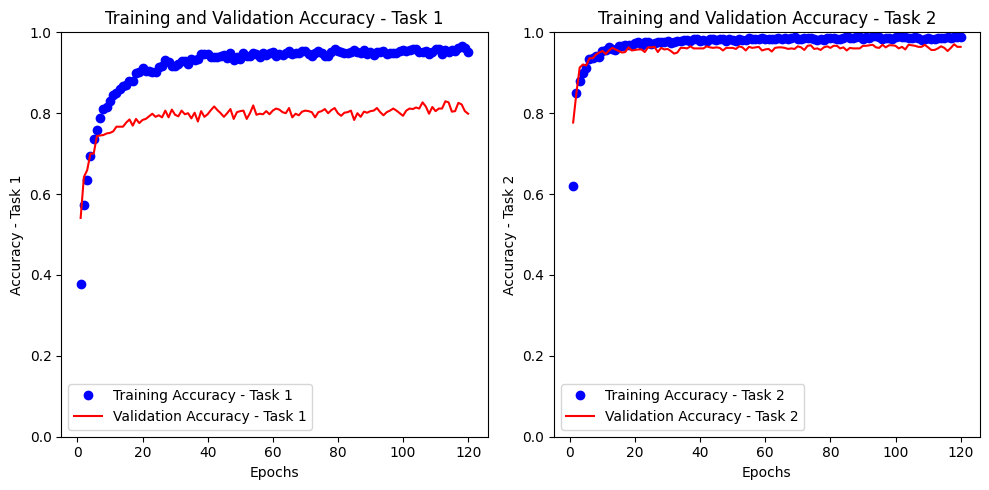

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot accuracy
def plot_accuracy(train_accuracy, val_accuracy, task_name):
    epochs = range(1, len(train_accuracy) + 1)
    plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy - ' + task_name)
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy - ' + task_name)
    plt.title('Training and Validation Accuracy - ' + task_name)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy - ' + task_name)
    plt.legend()
    plt.ylim(0, 1.0)  # Set y-axis limit from 0 to 1.0

# Plot accuracy for Task 1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_accuracy(history.history['task1_output_accuracy'], history.history['val_task1_output_accuracy'], 'Task 1')

# Plot accuracy for Task 2
plt.subplot(1, 2, 2)
plot_accuracy(history.history['task2_output_accuracy'], history.history['val_task2_output_accuracy'], 'Task 2')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 1
y_pred_classes1 = np.argmax(y_pred_task1, axis=1)
y_true_classes1 = np.argmax(y_test_task1, axis=1)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)

31/31 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy1 = accuracy_score(y_true_classes1, y_pred_classes1)
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss1 = cross_entropy_loss(y_pred_task1, y_test_task1)
loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision1 = precision_score(y_true_classes1, y_pred_classes1, average='weighted')
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall1 = recall_score(y_true_classes1, y_pred_classes1, average='weighted')
recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score1 = f1_score(y_true_classes1, y_pred_classes1, average='weighted')
f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 1", "Task 2"],
    "Overall Accuracy": [overall_accuracy1, overall_accuracy2],
    "Cross-Entropy Loss": [loss1, loss2],
    "Precision": [precision1, precision2],
    "Recall": [recall1, recall2],
    "F1 Score": [f1_score1, f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 1          0.823590            0.592355   0.826475  0.823590  0.824620
1  Task 2          0.955897            0.128560   0.955857  0.955897  0.955729

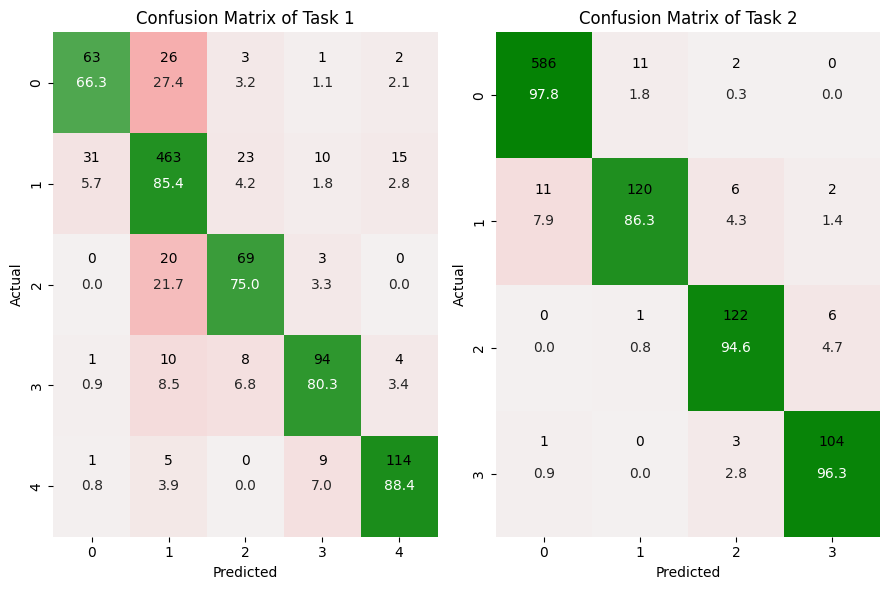

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 6))

# Confusion matrix for Task 1
conf_matrix1 = calculate_confusion_matrix(y_true_classes1, y_pred_classes1)
plot_confusion_matrix(axs[0], conf_matrix1, 'Confusion Matrix of Task 1')

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs[1], conf_matrix2, 'Confusion Matrix of Task 2')

plt.tight_layout()
plt.show()


## Hard Parameter + Statis Loss Weight

In [ ]:
pip install -q -U keras-tuner

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import keras_tuner as kt
from keras.layers import Input, Dense, Concatenate, Dropout, BatchNormalization

def build_model(hp):
    # Define the shared input layer

    num_of_neurons_shared_layers = hp.Choice('num_of_neurons_shared_layers', [50, 100, 150, 200,300,500])
    num_of_neurons_task_layers   = hp.Choice('num_of_neurons_task_layers', [50, 100, 150, 200,300,500])

    lamda1 = l2(hp.Choice('lambda1', [0.0, 3e-4, 3e-2]))
    lamda2 = l2(hp.Choice('lambda2', [0.0, 3e-4, 3e-2]))
    lamda3 = l2(hp.Choice('lambda3', [0.0, 3e-4, 3e-2]))

    loss_weights_1 = hp.Choice('loss_weights_1', [1.5, 1.0, 0.8, 0.2])
    loss_weights_2 = hp.Choice('loss_weights_2', [1.5, 1.0, 0.8, 0.2])


    input_layer = Input(shape=(input_data.shape[1],))

    # Define the shared hidden layers with L2 regularization
    shared_hidden_layer_1 = Dense(units=num_of_neurons_shared_layers,
                                  activation='relu', kernel_regularizer=lamda1)(input_layer)

    shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)

    shared_hidden_layer_2 = Dense(units=num_of_neurons_shared_layers,
                                  activation='relu', kernel_regularizer=lamda1)(shared_hidden_layer_1)

    shared_hidden_layer_2 = BatchNormalization()(shared_hidden_layer_2)

    shared_hidden_layer_3 = Dense(units=num_of_neurons_shared_layers,
                                  activation='relu', kernel_regularizer=lamda1)(shared_hidden_layer_2)

    shared_hidden_layer_3 = BatchNormalization()(shared_hidden_layer_3)


    # Define task-specific output layers - Task1
    task1_hidden_layer_1 = Dense(units=num_of_neurons_task_layers,
                                  activation='relu', kernel_regularizer=lamda2)(shared_hidden_layer_1)

    task1_hidden_layer_1 = BatchNormalization()(task1_hidden_layer_1)


    task1_hidden_layer_2 = Dense(units=num_of_neurons_task_layers,
                                  activation='relu', kernel_regularizer=lamda2)(task1_hidden_layer_1)

    task1_hidden_layer_2 = BatchNormalization()(task1_hidden_layer_2)


    # Define task-specific output layers - Task2
    task2_hidden_layer_1 = Dense(units=num_of_neurons_task_layers,
                                  activation='relu', kernel_regularizer=lamda3)(shared_hidden_layer_1)

    task2_hidden_layer_1 = BatchNormalization()(task2_hidden_layer_1)


    task2_hidden_layer_2 = Dense(units=num_of_neurons_task_layers,
                                  activation='relu', kernel_regularizer=lamda3)(task2_hidden_layer_1)

    task2_hidden_layer_2 = BatchNormalization()(task2_hidden_layer_2)



    # Define the Outputs
    task1_output = Dense(1, name='task1_output')(task1_hidden_layer_2)
    task2_output = Dense(4, activation="softmax", name='task2_output')(task2_hidden_layer_2)

    # Define the model with multiple outputs
    model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

    # Define the learning rate
    learning_rate = 3e-4

    # Instantiate an optimizer with the desired learning rate
    optimizer = Adam(learning_rate=learning_rate)

    # Compile the model with the custom loss function
    model.compile(optimizer=optimizer,
                  loss = ['mean_squared_error','categorical_crossentropy'],
                  loss_weights = [loss_weights_1,loss_weights_2],
                  metrics=['mean_squared_error','accuracy'])

    return model



In [ ]:
# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective=kt.Objective('val_task2_output_accuracy',direction="max"),
                     max_epochs=20,
                     directory='keras_tuner_dir',
                     project_name='multi_task_model_tuning',
                     overwrite=True
                     )


# Search for the best hyperparameters
tuner.search(input_data, [task1_labels, task2_labels], epochs=20, validation_split=0.2)



Trial 30 Complete [00h 00m 38s]
val_task2_output_accuracy: 0.7198067903518677

Best val_task2_output_accuracy So Far: 0.7568438053131104
Total elapsed time: 00h 09m 11s


In [ ]:
# Retrieve the best hyperparameters
best_trials = tuner.oracle.get_best_trials(1)[0]
best_hyperparameters = best_trials.hyperparameters.values

from prettytable import PrettyTable
table = PrettyTable(["Parameter", "Value"])

for param, value in best_hyperparameters.items():
    table.add_row([param, value])

print(table)

+------------------------------+--------+
|          Parameter           | Value  |
+------------------------------+--------+
| num_of_neurons_shared_layers |  500   |
|  num_of_neurons_task_layers  |  500   |
|           lambda1            | 0.0003 |
|           lambda2            |  0.0   |
|           lambda3            |  0.0   |
|        loss_weights_1        |  0.8   |
|        loss_weights_2        |  0.8   |
|         tuner/epochs         |   20   |
|     tuner/initial_epoch      |   7    |
|        tuner/bracket         |   1    |
|         tuner/round          |   1    |
|        tuner/trial_id        |  0019  |
+------------------------------+--------+


In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(x_train, [y_train_task1, y_train_task2], epochs=120)


Epoch 1/120
78/78 [==============================] - 9s 30ms/step - loss: 701893.9375 - task1_output_loss: 877366.3750 - task2_output_loss: 1.1042 - task1_output_mean_squared_error: 877366.3750 - task1_output_accuracy: 0.0000e+00 - task2_output_mean_squared_error: 0.1369 - task2_output_accuracy: 0.5956
Epoch 2/120
78/78 [==============================] - 2s 30ms/step - loss: 697055.6250 - task1_output_loss: 871318.9375 - task2_output_loss: 0.7187 - task1_output_mean_squared_error: 871318.9375 - task1_output_accuracy: 0.0000e+00 - task2_output_mean_squared_error: 0.0928 - task2_output_accuracy: 0.7403
Epoch 3/120
78/78 [==============================] - 2s 26ms/step - loss: 690949.5625 - task1_output_loss: 863686.4375 - task2_output_loss: 0.5608 - task1_output_mean_squared_error: 863686.4375 - task1_output_accuracy: 0.0000e+00 - task2_output_mean_squared_error: 0.0739 - task2_output_accuracy: 0.7960
Epoch 4/120
78/78 [==============================] - 2s 27ms/step - loss: 682525.5625 - 

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)

20/20 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test_task1, y_pred_task1) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 18.50%


<ipython-input-88-cea5bcbe88ee>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_task1, label='Actual Values', color='blue', shade=True)
<ipython-input-88-cea5bcbe88ee>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_task1, label='Predicted Values', color='red', shade=True)


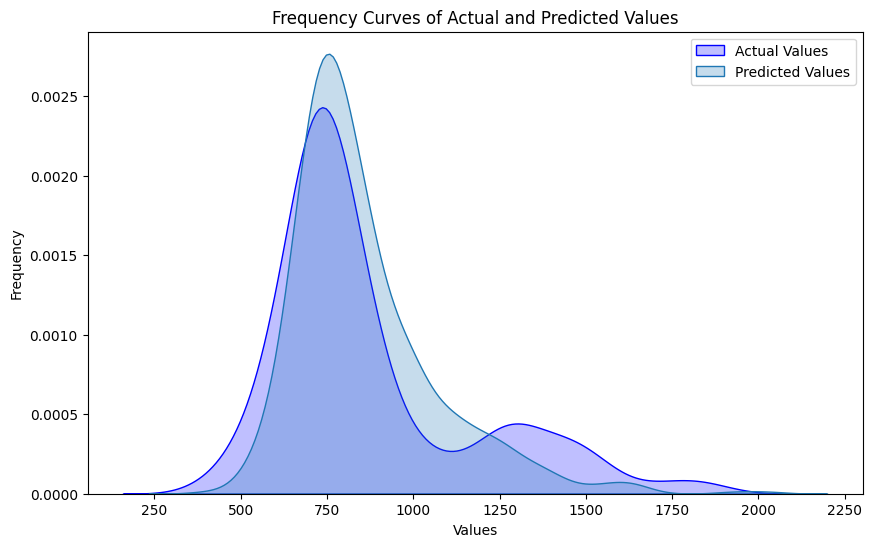

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the frequency curves
sns.kdeplot(y_test_task1, label='Actual Values', color='blue', shade=True)
sns.kdeplot(y_pred_task1, label='Predicted Values', color='red', shade=True)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency Curves of Actual and Predicted Values')
plt.legend()

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 2"],
    "Overall Accuracy": [overall_accuracy2],
    "Cross-Entropy Loss": [loss2],
    "Precision": [precision2],
    "Recall": [recall2],
    "F1 Score": [f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 2          0.845411            0.728191   0.851134  0.845411  0.846284

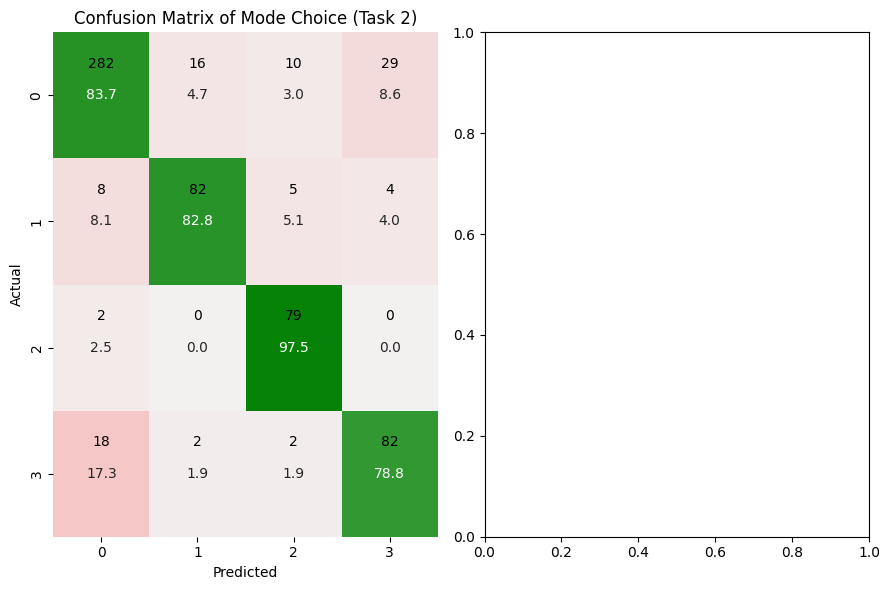

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 6))


# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs[0], conf_matrix2, 'Confusion Matrix of Mode Choice (Task 2)')

plt.tight_layout()
plt.show()


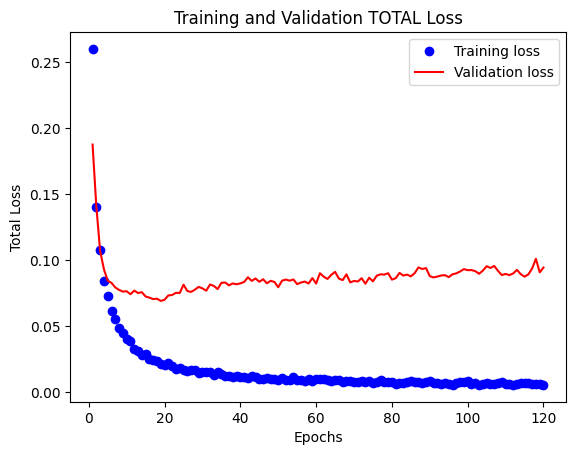

In [ ]:
# Extract accuracy values
train_accuracy = history.history['loss']
val_accuracy = history.history['val_loss']

# Plot accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'bo', label='Training loss')
plt.plot(epochs, val_accuracy, 'r', label='Validation loss')
plt.title('Training and Validation TOTAL Loss')
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 1
y_pred_classes1 = np.argmax(y_pred_task1, axis=1)
y_true_classes1 = np.argmax(y_test_task1, axis=1)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)


31/31 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy1 = accuracy_score(y_true_classes1, y_pred_classes1)
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss1 = cross_entropy_loss(y_pred_task1, y_test_task1)
loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision1 = precision_score(y_true_classes1, y_pred_classes1, average='weighted')
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall1 = recall_score(y_true_classes1, y_pred_classes1, average='weighted')
recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score1 = f1_score(y_true_classes1, y_pred_classes1, average='weighted')
f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 1", "Task 2"],
    "Overall Accuracy": [overall_accuracy1, overall_accuracy2],
    "Cross-Entropy Loss": [loss1, loss2],
    "Precision": [precision1, precision2],
    "Recall": [recall1, recall2],
    "F1 Score": [f1_score1, f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 1          0.819487            0.572314   0.823820  0.819487  0.820689
1  Task 2          0.954872            0.162768   0.954902  0.954872  0.954819

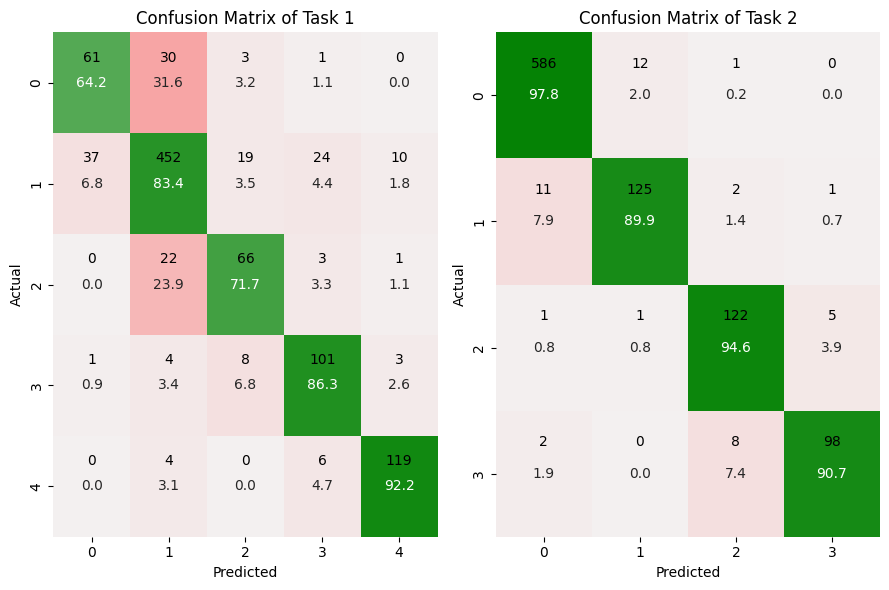

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 6))

# Confusion matrix for Task 1
conf_matrix1 = calculate_confusion_matrix(y_true_classes1, y_pred_classes1)
plot_confusion_matrix(axs[0], conf_matrix1, 'Confusion Matrix of Task 1')

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs[1], conf_matrix2, 'Confusion Matrix of Task 2')

plt.tight_layout()
plt.show()


# Cross-stich (NEW)

In [ ]:
import numpy as np
import tensorflow as tf  # Import TensorFlow
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout, BatchNormalization, Layer

# Define the input layer
input_layer = Input(shape=(input_data.shape[1],))

class CrossStitch(Layer):
    def build(self, input_shape):
        # Assuming both inputs have the same shape
        shape = input_shape[0]
        # Create a weight matrix for each neuron
        self.cross_stitch_units = self.add_weight(
            shape=(shape[1], 2, 2),
            initializer='ones',
            trainable=True,
            name='cross_stitch_units'
        )
        super(CrossStitch, self).build(input_shape)

    def call(self, inputs):
        task1, task2 = inputs
        # Stack the inputs along a new dimension
        stacked_inputs = tf.stack([task1, task2], axis=-1)  # Shape: (batch_size, units, 2)
        # Multiply inputs by cross-stitch units
        outputs = tf.einsum('bij,ijk->bik', stacked_inputs, self.cross_stitch_units)

        # Split outputs back into task-specific outputs
        task1_output, task2_output = tf.unstack(outputs, axis=-1)
        return [task1_output, task2_output]

# Define the neural network layers
task1_hidden_layer_1 = Dense(units=300,
                             activation='relu', kernel_regularizer=l2(0.0003))(input_layer)
task1_hidden_layer_1 = BatchNormalization()(task1_hidden_layer_1)

task2_hidden_layer_1 = Dense(units=300,
                             activation='relu', kernel_regularizer=l2(0.0003))(input_layer)
task2_hidden_layer_1 = BatchNormalization()(task2_hidden_layer_1)

# Apply CrossStitch - #1
output1, output2 = CrossStitch()([task1_hidden_layer_1, task2_hidden_layer_1])

# Define task-specific layers - #2
task1_hidden_layer_2 = Dense(units=300,
                             activation='relu', kernel_regularizer=l2(0.0003))(output1)
task1_hidden_layer_2 = BatchNormalization()(task1_hidden_layer_2)

task2_hidden_layer_2 = Dense(units=300,
                             activation='relu', kernel_regularizer=l2(0.0003))(output2)
task2_hidden_layer_2 = BatchNormalization()(task2_hidden_layer_2)

# Apply CrossStitch - #2
output1, output2 = CrossStitch()([task1_hidden_layer_2, task2_hidden_layer_2])

# Define task-specific layers - #3
task1_hidden_layer_3 = Dense(units=300,
                             activation='relu', kernel_regularizer=l2(0.0003))(output1)
task1_hidden_layer_3 = BatchNormalization()(task1_hidden_layer_3)

task2_hidden_layer_3 = Dense(units=300,
                             activation='relu', kernel_regularizer=l2(0.0003))(output2)
task2_hidden_layer_3 = BatchNormalization()(task2_hidden_layer_3)

# Define Outputs
task1_output = Dense(1, name='task1_output')(task1_hidden_layer_3)
task2_output = Dense(4, activation="softmax", name='task2_output')(task2_hidden_layer_3)

# Define the model with multiple outputs
model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

# Define a specific learning rate
learning_rate = 3e-4

# Instantiate an optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the custom loss function
model.compile(optimizer=optimizer,
              loss=['mean_squared_error', 'categorical_crossentropy'],
              metrics={'task1_output': 'mean_squared_error', 'task2_output': 'accuracy'})


In [ ]:

history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=120, batch_size=32, validation_split=0.20)


Epoch 1/120
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 874390.3125 - task1_output_mean_squared_error: 874388.6875 - task2_output_accuracy: 0.4152 - val_loss: 905892.6875 - val_task1_output_mean_squared_error: 905891.3750 - val_task2_output_accuracy: 0.5484
Epoch 2/120
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 857446.9375 - task1_output_mean_squared_error: 857445.8750 - task2_output_accuracy: 0.6412 - val_loss: 905615.0625 - val_task1_output_mean_squared_error: 905613.6250 - val_task2_output_accuracy: 0.5181
Epoch 3/120
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 887592.8750 - task1_output_mean_squared_error: 887591.8125 - task2_output_accuracy: 0.7028 - val_loss: 908171.3750 - val_task1_output_mean_squared_error: 908170.1875 - val_task2_output_accuracy: 0.5605
Epoch 4/120
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 865663.3750 - task1_output_mean_squared_error: 865662.3125 - task2_output_accuracy: 0.7114 - val_loss: 910278.1250 - val_task1_output_mean_squared_error:

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


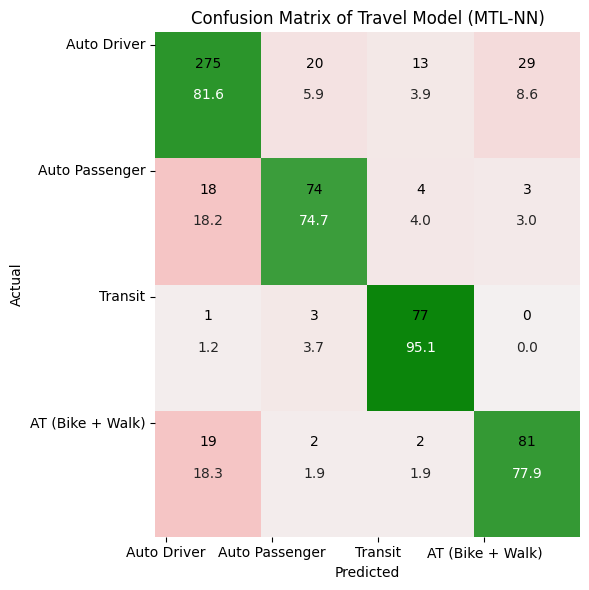

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

# Define category labels and indices mapping
category_labels = ['Auto Driver', 'Auto Passenger', 'Transit', 'AT (Bike + Walk)']
category_indices = {label: idx for idx, label in enumerate(category_labels)}


# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)

    # Set xticks and yticks with category labels
    ax.set_xticks(np.arange(len(category_labels)) + 0.1)
    ax.set_yticks(np.arange(len(category_labels)) + 0.1)
    ax.set_xticklabels(category_labels, rotation=0)
    ax.set_yticklabels(category_labels, rotation=0)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 6))  # Change to 1 subplot

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs, conf_matrix2, 'Confusion Matrix of Travel Model (MTL-NN)')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 2"],
    "Overall Accuracy": [overall_accuracy2],
    "Cross-Entropy Loss": [loss2],
    "Precision": [precision2],
    "Recall": [recall2],
    "F1 Score": [f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 2          0.816425            0.682431   0.820618  0.816425  0.816858

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

# Sample data for demonstration purposes
# Assuming y_test_task1 and y_pred_task1 are your arrays
# y_test_task1 = np.array([values])
# y_pred_task1 = np.array([values])

# Ensure they are 1-dimensional
y_test_task1 = np.ravel(y_test_task1)
y_pred_task1 = np.ravel(y_pred_task1)

def convert_to_minutes(value):
    # Convert HHMM format to minutes
    hours = value // 100
    minutes = value % 100
    return hours * 60 + minutes

def convert_to_hhmm(minutes):
    # Convert minutes back to HHMM format
    hours = minutes // 60
    minutes = minutes % 60
    return hours * 100 + minutes

def convert_time(value):
    # Extract hours and minutes
    hours = value // 100
    minutes = value % 100

    # Convert any excess minutes to hours
    if minutes >= 60:
        hours += minutes // 60
        minutes = minutes % 60

    # Ensure the hours and minutes are correctly formatted
    return hours * 100 + minutes

# Apply the conversion to y_pred_task1
y_pred_task1_converted = np.array([convert_time(value) for value in y_pred_task1])

# Convert times to minutes
y_test_task1_minutes = np.array([convert_to_minutes(value) for value in y_test_task1])
y_pred_task1_minutes = np.array([convert_to_minutes(value) for value in y_pred_task1])

# Calculate the difference in minutes
time_difference_minutes = y_test_task1_minutes - y_pred_task1_minutes

# Convert the difference back to HHMM format
time_difference_hhmm = np.array([convert_to_hhmm(abs(diff)) for diff in time_difference_minutes])

# Create a DataFrame
df = pd.DataFrame({
    'y_test_task1': y_test_task1,
    'Original_y_pred_task1': y_pred_task1,
    'Fixed_y_pred_task1': y_pred_task1_converted,
    'time_difference': time_difference_hhmm
})

# Save the DataFrame to an Excel file
file_name = 'MTL_Cross_Stich.xlsx'
df.to_excel(file_name, index=False)

# Download the file
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Sluice MTL

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer, Concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Input layer
#input_layer = Input(shape=(input_dim,), name='input_layer')
input_layer = Input(shape=(input_data.shape[1],))

# Shared and Private Subspaces for Task 1 and Task 2
# Let's assume we split the layer into 2 subspaces: one shared, one private for each task
shared_subspace_units = 128
private_subspace_units = 64

# First Layer: Factorization into Subspaces
# Shared Subspace
shared_subspace = Dense(shared_subspace_units, activation='relu', kernel_regularizer=l2(0.0001), name='shared_subspace')(input_layer)
shared_subspace = BatchNormalization()(shared_subspace)

# Private Subspaces
private_subspace_t1 = Dense(private_subspace_units, activation='relu', kernel_regularizer=l2(0.0001), name='private_subspace_t1')(input_layer)
private_subspace_t1 = BatchNormalization()(private_subspace_t1)

private_subspace_t2 = Dense(private_subspace_units, activation='relu', kernel_regularizer=l2(0.0001), name='private_subspace_t2')(input_layer)
private_subspace_t2 = BatchNormalization()(private_subspace_t2)

# Combine Subspaces for Each Task
# For each task, we combine the shared and private subspaces using learnable mixing parameters (alpha and beta)
class SluiceUnit(Layer):
    def __init__(self, **kwargs):
        super(SluiceUnit, self).__init__(**kwargs)
        # Initialize mixing parameters alpha and beta
        # These parameters determine how much to weigh the shared and private subspaces
        self.alpha = self.add_weight(shape=(shared_subspace_units,),
                                        initializer='ones',
                                        trainable=True,
                                        name='alpha')
        self.beta = self.add_weight(shape=(private_subspace_units,),
                                    initializer='ones',
                                    trainable=True,
                                    name='beta')

    def call(self, inputs):
        shared_input, private_input = inputs
        # Apply mixing parameters
        shared_output = tf.multiply(shared_input, self.alpha)
        private_output = tf.multiply(private_input, self.beta)
        # Concatenate the mixed subspaces
        combined_output = Concatenate()([shared_output, private_output])
        return combined_output

# Task 1 Sluice Unit
sluice_unit_t1 = SluiceUnit(name='sluice_unit_t1')([shared_subspace, private_subspace_t1])
sluice_unit_t1 = BatchNormalization()(sluice_unit_t1)

# Task 2 Sluice Unit
sluice_unit_t2 = SluiceUnit(name='sluice_unit_t2')([shared_subspace, private_subspace_t2])
sluice_unit_t2 = BatchNormalization()(sluice_unit_t2)

# Task-specific Layers
# Task 1: Regression Task
task1_layer = Dense(64, activation='relu', kernel_regularizer=l2(0.0001), name='task1_layer')(sluice_unit_t1)
task1_layer = BatchNormalization()(task1_layer)
task1_output = Dense(1, name='task1_output')(task1_layer)

# Task 2: Classification Task
task2_layer = Dense(64, activation='relu', kernel_regularizer=l2(0.0001), name='task2_layer')(sluice_unit_t2)
task2_layer = BatchNormalization()(task2_layer)
task2_output = Dense(4, activation='softmax', name='task2_output')(task2_layer)

# Define the Model
model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

# Compile the Model
optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer,
                loss={'task1_output': 'mean_squared_error', 'task2_output': 'categorical_crossentropy'},
                metrics={'task1_output': 'mean_absolute_error', 'task2_output': 'accuracy'})



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer, Concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def build_sluice_network(input_dim):
    # Input layer
    input_layer = Input(shape=(input_dim,), name='input_layer')

    # Shared and Private Subspaces for Task 1 and Task 2
    # Let's assume we split the layer into 2 subspaces: one shared, one private for each task
    shared_subspace_units = 128
    private_subspace_units = 64

    # First Layer: Factorization into Subspaces
    # Shared Subspace
    shared_subspace = Dense(shared_subspace_units, activation='relu', kernel_regularizer=l2(0.0001), name='shared_subspace')(input_layer)
    shared_subspace = BatchNormalization()(shared_subspace)

    # Private Subspaces
    private_subspace_t1 = Dense(private_subspace_units, activation='relu', kernel_regularizer=l2(0.0001), name='private_subspace_t1')(input_layer)
    private_subspace_t1 = BatchNormalization()(private_subspace_t1)

    private_subspace_t2 = Dense(private_subspace_units, activation='relu', kernel_regularizer=l2(0.0001), name='private_subspace_t2')(input_layer)
    private_subspace_t2 = BatchNormalization()(private_subspace_t2)

    # Combine Subspaces for Each Task
    # For each task, we combine the shared and private subspaces using learnable mixing parameters (alpha and beta)
    class SluiceUnit(Layer):
        def __init__(self, **kwargs):
            super(SluiceUnit, self).__init__(**kwargs)
            # Initialize mixing parameters alpha and beta
            # These parameters determine how much to weigh the shared and private subspaces
            self.alpha = self.add_weight(shape=(shared_subspace_units,),
                                         initializer='ones',
                                         trainable=True,
                                         name='alpha')
            self.beta = self.add_weight(shape=(private_subspace_units,),
                                        initializer='ones',
                                        trainable=True,
                                        name='beta')

        def call(self, inputs):
            shared_input, private_input = inputs
            # Apply mixing parameters
            shared_output = tf.multiply(shared_input, self.alpha)
            private_output = tf.multiply(private_input, self.beta)
            # Concatenate the mixed subspaces
            combined_output = Concatenate()([shared_output, private_output])
            return combined_output

    # Task 1 Sluice Unit
    sluice_unit_t1 = SluiceUnit(name='sluice_unit_t1')([shared_subspace, private_subspace_t1])
    sluice_unit_t1 = BatchNormalization()(sluice_unit_t1)

    # Task 2 Sluice Unit
    sluice_unit_t2 = SluiceUnit(name='sluice_unit_t2')([shared_subspace, private_subspace_t2])
    sluice_unit_t2 = BatchNormalization()(sluice_unit_t2)

    # Task-specific Layers
    # Task 1: Regression Task
    task1_layer = Dense(64, activation='relu', kernel_regularizer=l2(0.0001), name='task1_layer')(sluice_unit_t1)
    task1_layer = BatchNormalization()(task1_layer)
    task1_output = Dense(1, name='task1_output')(task1_layer)

    # Task 2: Classification Task
    task2_layer = Dense(64, activation='relu', kernel_regularizer=l2(0.0001), name='task2_layer')(sluice_unit_t2)
    task2_layer = BatchNormalization()(task2_layer)
    task2_output = Dense(4, activation='softmax', name='task2_output')(task2_layer)

    # Define the Model
    model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

    # Compile the Model
    optimizer = Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer,
                  loss={'task1_output': 'mean_squared_error', 'task2_output': 'categorical_crossentropy'},
                  metrics={'task1_output': 'mean_absolute_error', 'task2_output': 'accuracy'})

    return model


In [ ]:

history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=120, batch_size=32, validation_split=0.20)


Epoch 1/120
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - loss: 846703.5000 - task1_output_mean_absolute_error: 874.2650 - task2_output_accuracy: 0.4166 - val_loss: 905717.4375 - val_task1_output_mean_absolute_error: 902.2897 - val_task2_output_accuracy: 0.5423
Epoch 2/120
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 839167.6250 - task1_output_mean_absolute_error: 869.9431 - task2_output_accuracy: 0.6284 - val_loss: 903828.1250 - val_task1_output_mean_absolute_error: 901.7460 - val_task2_output_accuracy: 0.5444
Epoch 3/120
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 862730.8125 - task1_output_mean_absolute_error: 882.7675 - task2_output_accuracy: 0.6933 - val_loss: 902515.2500 - val_task1_output_mean_absolute_error: 901.6122 - val_task2_output_accuracy: 0.6028
Epoch 4/120
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 870804.3125 - task1_output_mean_absolute_error: 886.9174 - task2_output_accuracy: 0.7056 - val_loss: 900188.9375 - val_task1_output_mean_absolute_error: 901.3206 - v

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


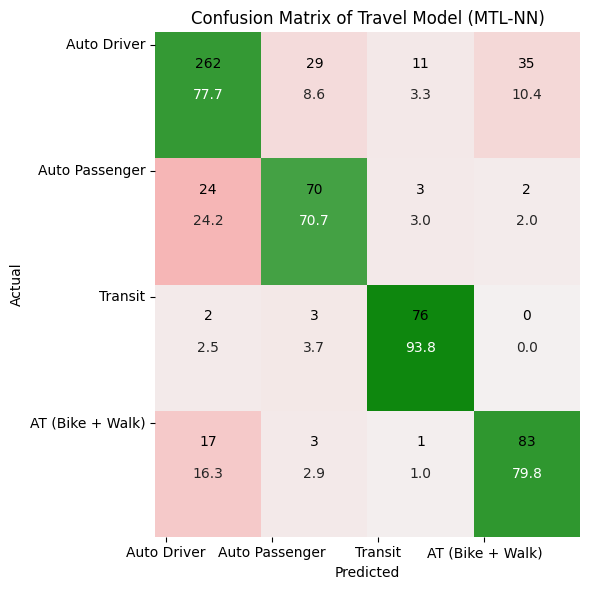

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

# Define category labels and indices mapping
category_labels = ['Auto Driver', 'Auto Passenger', 'Transit', 'AT (Bike + Walk)']
category_indices = {label: idx for idx, label in enumerate(category_labels)}


# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)

    # Set xticks and yticks with category labels
    ax.set_xticks(np.arange(len(category_labels)) + 0.1)
    ax.set_yticks(np.arange(len(category_labels)) + 0.1)
    ax.set_xticklabels(category_labels, rotation=0)
    ax.set_yticklabels(category_labels, rotation=0)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 6))  # Change to 1 subplot

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs, conf_matrix2, 'Confusion Matrix of Travel Model (MTL-NN)')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 2"],
    "Overall Accuracy": [overall_accuracy2],
    "Cross-Entropy Loss": [loss2],
    "Precision": [precision2],
    "Recall": [recall2],
    "F1 Score": [f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision   Recall  F1 Score
0  Task 2           0.79066            0.783171   0.797215  0.79066  0.791712

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

# Sample data for demonstration purposes
# Assuming y_test_task1 and y_pred_task1 are your arrays
# y_test_task1 = np.array([values])
# y_pred_task1 = np.array([values])

# Ensure they are 1-dimensional
y_test_task1 = np.ravel(y_test_task1)
y_pred_task1 = np.ravel(y_pred_task1)

def convert_to_minutes(value):
    # Convert HHMM format to minutes
    hours = value // 100
    minutes = value % 100
    return hours * 60 + minutes

def convert_to_hhmm(minutes):
    # Convert minutes back to HHMM format
    hours = minutes // 60
    minutes = minutes % 60
    return hours * 100 + minutes

def convert_time(value):
    # Extract hours and minutes
    hours = value // 100
    minutes = value % 100

    # Convert any excess minutes to hours
    if minutes >= 60:
        hours += minutes // 60
        minutes = minutes % 60

    # Ensure the hours and minutes are correctly formatted
    return hours * 100 + minutes

# Apply the conversion to y_pred_task1
y_pred_task1_converted = np.array([convert_time(value) for value in y_pred_task1])

# Convert times to minutes
y_test_task1_minutes = np.array([convert_to_minutes(value) for value in y_test_task1])
y_pred_task1_minutes = np.array([convert_to_minutes(value) for value in y_pred_task1])

# Calculate the difference in minutes
time_difference_minutes = y_test_task1_minutes - y_pred_task1_minutes

# Convert the difference back to HHMM format
time_difference_hhmm = np.array([convert_to_hhmm(abs(diff)) for diff in time_difference_minutes])

# Create a DataFrame
df = pd.DataFrame({
    'y_test_task1': y_test_task1,
    'Original_y_pred_task1': y_pred_task1,
    'Fixed_y_pred_task1': y_pred_task1_converted,
    'time_difference': time_difference_hhmm
})

# Save the DataFrame to an Excel file
file_name = 'MTL_Sluice.xlsx'
df.to_excel(file_name, index=False)

# Download the file
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Multi-gate Mixture-of-Experts (MMoE)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer, Concatenate, Softmax, Multiply, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def build_mmoe_model(input_dim, num_experts=8, expert_units=64, gate_units=64):
    # Input layer
    input_layer = Input(shape=(input_dim,), name='input_layer')

    # Shared Expert Networks
    experts = []
    for i in range(num_experts):
        expert = Dense(expert_units, activation='relu', kernel_regularizer=l2(0.0001),
                       name=f'expert_{i}')(input_layer)
        experts.append(expert)
    # Stack expert outputs: Shape (batch_size, num_experts, expert_units)
    experts_stack = tf.stack(experts, axis=1)

    # Task-specific Gates
    def build_gate(name):
        gate = Dense(num_experts, activation='softmax', kernel_regularizer=l2(0.0001),
                     name=f'{name}_gate')(input_layer)
        return gate  # Shape: (batch_size, num_experts)

    # Gates for each task
    gate_t1 = build_gate('task1')
    gate_t2 = build_gate('task2')

    # Compute Weighted Sum of Experts for Each Task
    def combine_experts(gate, experts_stack, name):
        # Expand gate dimension to match experts_stack
        gate_expanded = tf.expand_dims(gate, axis=-1)  # Shape: (batch_size, num_experts, 1)
        # Multiply gate weights with experts
        gate_experts_product = gate_expanded * experts_stack  # Element-wise multiplication
        # Sum over experts to get combined output
        combined_output = tf.reduce_sum(gate_experts_product, axis=1)  # Shape: (batch_size, expert_units)
        return combined_output

    # Combined expert outputs for each task
    combined_output_t1 = combine_experts(gate_t1, experts_stack, 'task1')
    combined_output_t2 = combine_experts(gate_t2, experts_stack, 'task2')

    # Task-specific Towers
    # Task 1: Regression Task
    task1_tower = Dense(64, activation='relu', kernel_regularizer=l2(0.0001),
                        name='task1_tower_layer')(combined_output_t1)
    task1_tower = tf.keras.layers.BatchNormalization()(task1_tower)
    task1_output = Dense(1, name='task1_output')(task1_tower)

    # Task 2: Classification Task
    task2_tower = Dense(64, activation='relu', kernel_regularizer=l2(0.0001),
                        name='task2_tower_layer')(combined_output_t2)
    task2_tower = tf.keras.layers.BatchNormalization()(task2_tower)
    task2_output = Dense(4, activation='softmax', name='task2_output')(task2_tower)

    # Define the Model
    model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

    # Compile the Model
    optimizer = Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer,
                  loss={'task1_output': 'mean_squared_error', 'task2_output': 'categorical_crossentropy'},
                  metrics={'task1_output': 'mean_absolute_error', 'task2_output': 'accuracy'})

    return model


In [ ]:

history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=120, batch_size=32, validation_split=0.20)


Epoch 1/120
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 6969.7915 - task1_output_mean_squared_error: 6969.2778 - task2_output_accuracy: 0.9892 - val_loss: 63198.0547 - val_task1_output_mean_squared_error: 63196.6328 - val_task2_output_accuracy: 0.7823
Epoch 2/120
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4965.1582 - task1_output_mean_squared_error: 4964.6533 - task2_output_accuracy: 0.9924 - val_loss: 64032.4102 - val_task1_output_mean_squared_error: 64030.9727 - val_task2_output_accuracy: 0.7742
Epoch 3/120
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 4333.1587 - task1_output_mean_squared_error: 4332.6406 - task2_output_accuracy: 0.9885 - val_loss: 65991.3125 - val_task1_output_mean_squared_error: 65989.7578 - val_task2_output_accuracy: 0.7581
Epoch 4/120
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 6062.8887 - task1_output_mean_squared_error: 6062.3633 - task2_output_accuracy: 0.9874 - val_loss: 64194.4492 - val_task1_output_mean_squared_error: 64193.0234 - val_task2_

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


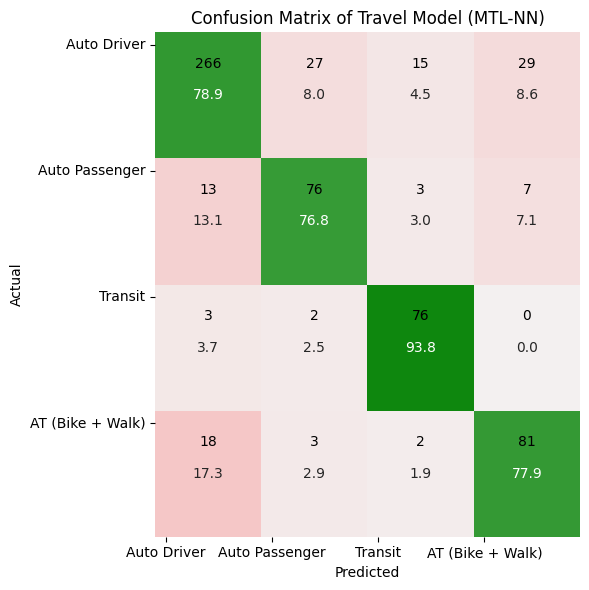

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

# Define category labels and indices mapping
category_labels = ['Auto Driver', 'Auto Passenger', 'Transit', 'AT (Bike + Walk)']
category_indices = {label: idx for idx, label in enumerate(category_labels)}


# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)

    # Set xticks and yticks with category labels
    ax.set_xticks(np.arange(len(category_labels)) + 0.1)
    ax.set_yticks(np.arange(len(category_labels)) + 0.1)
    ax.set_xticklabels(category_labels, rotation=0)
    ax.set_yticklabels(category_labels, rotation=0)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 6))  # Change to 1 subplot

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs, conf_matrix2, 'Confusion Matrix of Travel Model (MTL-NN)')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 2"],
    "Overall Accuracy": [overall_accuracy2],
    "Cross-Entropy Loss": [loss2],
    "Precision": [precision2],
    "Recall": [recall2],
    "F1 Score": [f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 2          0.803543            0.948793   0.812558  0.803543  0.805058

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

# Sample data for demonstration purposes
# Assuming y_test_task1 and y_pred_task1 are your arrays
# y_test_task1 = np.array([values])
# y_pred_task1 = np.array([values])

# Ensure they are 1-dimensional
y_test_task1 = np.ravel(y_test_task1)
y_pred_task1 = np.ravel(y_pred_task1)

def convert_to_minutes(value):
    # Convert HHMM format to minutes
    hours = value // 100
    minutes = value % 100
    return hours * 60 + minutes

def convert_to_hhmm(minutes):
    # Convert minutes back to HHMM format
    hours = minutes // 60
    minutes = minutes % 60
    return hours * 100 + minutes

def convert_time(value):
    # Extract hours and minutes
    hours = value // 100
    minutes = value % 100

    # Convert any excess minutes to hours
    if minutes >= 60:
        hours += minutes // 60
        minutes = minutes % 60

    # Ensure the hours and minutes are correctly formatted
    return hours * 100 + minutes

# Apply the conversion to y_pred_task1
y_pred_task1_converted = np.array([convert_time(value) for value in y_pred_task1])

# Convert times to minutes
y_test_task1_minutes = np.array([convert_to_minutes(value) for value in y_test_task1])
y_pred_task1_minutes = np.array([convert_to_minutes(value) for value in y_pred_task1])

# Calculate the difference in minutes
time_difference_minutes = y_test_task1_minutes - y_pred_task1_minutes

# Convert the difference back to HHMM format
time_difference_hhmm = np.array([convert_to_hhmm(abs(diff)) for diff in time_difference_minutes])

# Create a DataFrame
df = pd.DataFrame({
    'y_test_task1': y_test_task1,
    'Original_y_pred_task1': y_pred_task1,
    'Fixed_y_pred_task1': y_pred_task1_converted,
    'time_difference': time_difference_hhmm
})

# Save the DataFrame to an Excel file
file_name = 'MTL_MMoE.xlsx'
df.to_excel(file_name, index=False)

# Download the file
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Cross-stich (Soft Parameter)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Layer

def build_model(input_dim, hp=None):
    # Input layer
    input_layer = Input(shape=(input_dim,), name='input_layer')

    # Task 1 Network
    t1_layer1 = Dense(300, activation='relu', kernel_regularizer=l2(0.0003), name='t1_layer1')(input_layer)
    t1_layer1_bn = BatchNormalization(name='t1_layer1_bn')(t1_layer1)
    t1_layer2 = Dense(500, activation='relu', kernel_regularizer=l2(0.0003), name='t1_layer2')(t1_layer1_bn)
    t1_layer2_bn = BatchNormalization(name='t1_layer2_bn')(t1_layer2)
    t1_layer3 = Dense(500, activation='relu', kernel_regularizer=l2(0.0003), name='t1_layer3')(t1_layer2_bn)
    t1_layer3_bn = BatchNormalization(name='t1_layer3_bn')(t1_layer3)
    task1_output = Dense(1, name='task1_output')(t1_layer3_bn)

    # Task 2 Network
    t2_layer1 = Dense(300, activation='relu', kernel_regularizer=l2(0.0003), name='t2_layer1')(input_layer)
    t2_layer1_bn = BatchNormalization(name='t2_layer1_bn')(t2_layer1)
    t2_layer2 = Dense(500, activation='relu', kernel_regularizer=l2(0.0003), name='t2_layer2')(t2_layer1_bn)
    t2_layer2_bn = BatchNormalization(name='t2_layer2_bn')(t2_layer2)
    t2_layer3 = Dense(500, activation='relu', kernel_regularizer=l2(0.0003), name='t2_layer3')(t2_layer2_bn)
    t2_layer3_bn = BatchNormalization(name='t2_layer3_bn')(t2_layer3)
    task2_output = Dense(4, activation='softmax', name='task2_output')(t2_layer3_bn)

    # Define the model with multiple outputs
    model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

    # Define optimizer
    optimizer = Adam(learning_rate=3e-4)

    # Compile the model without specifying the loss yet
    model.compile(optimizer=optimizer,
                  loss={'task1_output': 'mean_squared_error', 'task2_output': 'categorical_crossentropy'},
                  metrics={'task1_output': 'mean_squared_error', 'task2_output': 'accuracy'})

    # Return the model
    return model

# Custom training loop to include parameter regularization
def custom_train(model, train_data, val_data, epochs=50, batch_size=32, alpha=0.01):
    # Prepare data
    X_train, y_train = train_data
    X_val, y_val = val_data

    # Compile model (again, to ensure custom training step uses the optimizer)
    optimizer = Adam(learning_rate=3e-4)

    # Define loss functions
    loss_fn_task1 = tf.keras.losses.MeanSquaredError()
    loss_fn_task2 = tf.keras.losses.CategoricalCrossentropy()

    # Metrics
    train_loss = tf.keras.metrics.Mean(name='train_loss')
    val_loss = tf.keras.metrics.Mean(name='val_loss')

    # Training loop
    for epoch in range(epochs):
        print(f'Epoch {epoch+1}/{epochs}')
        # Reset metrics
        train_loss.reset_state()
        val_loss.reset_state()

        # Training step
        for step in range(0, len(X_train), batch_size):
            X_batch = X_train[step:step+batch_size]
            y_batch_task1 = y_train[0][step:step+batch_size]
            y_batch_task2 = y_train[1][step:step+batch_size]

            with tf.GradientTape() as tape:
                # Forward pass
                pred_task1, pred_task2 = model(X_batch, training=True)

                # Compute task losses
                loss_task1 = loss_fn_task1(y_batch_task1, pred_task1)
                loss_task2 = loss_fn_task2(y_batch_task2, pred_task2)

                # Compute parameter difference loss
                param_loss = 0
                for layer_name in ['layer1', 'layer2', 'layer3']:
                    t1_weights = model.get_layer(f't1_{layer_name}').trainable_weights[0]
                    t2_weights = model.get_layer(f't2_{layer_name}').trainable_weights[0]
                    param_loss += tf.reduce_sum(tf.square(t1_weights - t2_weights))

                # Total loss
                total_loss = loss_task1 + loss_task2 + alpha * param_loss

            # Compute gradients
            gradients = tape.gradient(total_loss, model.trainable_variables)
            # Update weights
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            # Update metric
            train_loss(total_loss)

        # Validation step
        for step in range(0, len(X_val), batch_size):
            X_batch = X_val[step:step+batch_size]
            y_batch_task1 = y_val[0][step:step+batch_size]
            y_batch_task2 = y_val[1][step:step+batch_size]

            # Forward pass
            pred_task1, pred_task2 = model(X_batch, training=False)

            # Compute task losses
            loss_task1 = loss_fn_task1(y_batch_task1, pred_task1)
            loss_task2 = loss_fn_task2(y_batch_task2, pred_task2)

            # Compute parameter difference loss
            param_loss = 0
            for layer_name in ['layer1', 'layer2', 'layer3']:
                t1_weights = model.get_layer(f't1_{layer_name}').trainable_weights[0]
                t2_weights = model.get_layer(f't2_{layer_name}').trainable_weights[0]
                param_loss += tf.reduce_sum(tf.square(t1_weights - t2_weights))

            # Total loss
            total_loss = loss_task1 + loss_task2 + alpha * param_loss

            # Update metric
            val_loss(total_loss)

        # Print metrics
        print(f'Train Loss: {train_loss.result():.4f} - Val Loss: {val_loss.result():.4f}')

# Example usage:

# Ensure you have your data prepared as:
# x_train, y_train_task1, y_train_task2
# x_test, y_test_task1, y_test_task2

# Build the model
input_dim = x_train.shape[1]
model = build_model(input_dim)

# Prepare the data
train_data = (x_train, [y_train_task1, y_train_task2])
val_data = (x_test, [y_test_task1, y_test_task2])

# Train the model using custom training loop
custom_train(model, train_data, val_data, epochs=120, batch_size=32, alpha=0.01)


Epoch 1/120
Train Loss: 877686.6875 - Val Loss: 840246.1250
Epoch 2/120
Train Loss: 871354.3750 - Val Loss: 844893.0000
Epoch 3/120
Train Loss: 863403.0625 - Val Loss: 846943.0000
Epoch 4/120
Train Loss: 852793.7500 - Val Loss: 848023.6250
Epoch 5/120
Train Loss: 839069.5000 - Val Loss: 854614.3125
Epoch 6/120
Train Loss: 822056.5625 - Val Loss: 857152.1250
Epoch 7/120
Train Loss: 802006.5625 - Val Loss: 851945.3125
Epoch 8/120
Train Loss: 779982.0625 - Val Loss: 836613.5625
Epoch 9/120
Train Loss: 756157.8750 - Val Loss: 816493.3750
Epoch 10/120
Train Loss: 731679.8125 - Val Loss: 801178.2500
Epoch 11/120
Train Loss: 707465.0000 - Val Loss: 792980.4375
Epoch 12/120
Train Loss: 685016.4375 - Val Loss: 759961.6875
Epoch 13/120
Train Loss: 663839.4375 - Val Loss: 762351.0625
Epoch 14/120
Train Loss: 642532.6250 - Val Loss: 729855.2500
Epoch 15/120
Train Loss: 618750.8750 - Val Loss: 684518.0625
Epoch 16/120
Train Loss: 593927.6875 - Val Loss: 691551.4375
Epoch 17/120
Train Loss: 569369.8

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


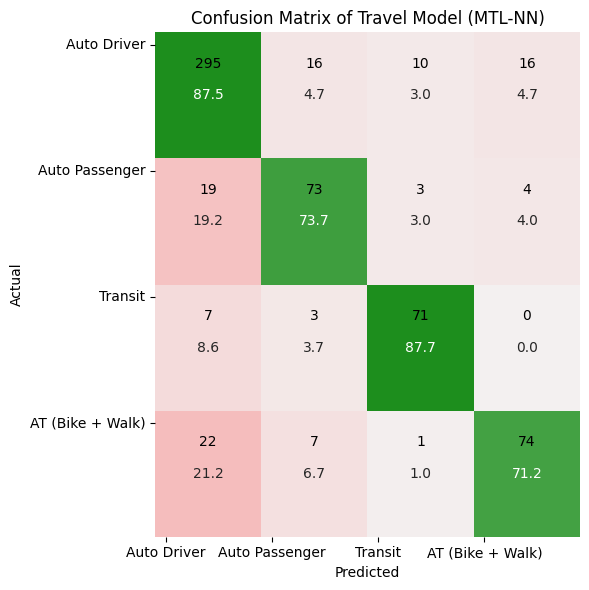

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

# Define category labels and indices mapping
category_labels = ['Auto Driver', 'Auto Passenger', 'Transit', 'AT (Bike + Walk)']
category_indices = {label: idx for idx, label in enumerate(category_labels)}


# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)

    # Set xticks and yticks with category labels
    ax.set_xticks(np.arange(len(category_labels)) + 0.1)
    ax.set_yticks(np.arange(len(category_labels)) + 0.1)
    ax.set_xticklabels(category_labels, rotation=0)
    ax.set_yticklabels(category_labels, rotation=0)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 6))  # Change to 1 subplot

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs, conf_matrix2, 'Confusion Matrix of Travel Model (MTL-NN)')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 2"],
    "Overall Accuracy": [overall_accuracy2],
    "Cross-Entropy Loss": [loss2],
    "Precision": [precision2],
    "Recall": [recall2],
    "F1 Score": [f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 2          0.826087            0.687595   0.825074  0.826087  0.825159

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

# Sample data for demonstration purposes
# Assuming y_test_task1 and y_pred_task1 are your arrays
# y_test_task1 = np.array([values])
# y_pred_task1 = np.array([values])

# Ensure they are 1-dimensional
y_test_task1 = np.ravel(y_test_task1)
y_pred_task1 = np.ravel(y_pred_task1)

def convert_to_minutes(value):
    # Convert HHMM format to minutes
    hours = value // 100
    minutes = value % 100
    return hours * 60 + minutes

def convert_to_hhmm(minutes):
    # Convert minutes back to HHMM format
    hours = minutes // 60
    minutes = minutes % 60
    return hours * 100 + minutes

def convert_time(value):
    # Extract hours and minutes
    hours = value // 100
    minutes = value % 100

    # Convert any excess minutes to hours
    if minutes >= 60:
        hours += minutes // 60
        minutes = minutes % 60

    # Ensure the hours and minutes are correctly formatted
    return hours * 100 + minutes

# Apply the conversion to y_pred_task1
y_pred_task1_converted = np.array([convert_time(value) for value in y_pred_task1])

# Convert times to minutes
y_test_task1_minutes = np.array([convert_to_minutes(value) for value in y_test_task1])
y_pred_task1_minutes = np.array([convert_to_minutes(value) for value in y_pred_task1])

# Calculate the difference in minutes
time_difference_minutes = y_test_task1_minutes - y_pred_task1_minutes

# Convert the difference back to HHMM format
time_difference_hhmm = np.array([convert_to_hhmm(abs(diff)) for diff in time_difference_minutes])

# Create a DataFrame
df = pd.DataFrame({
    'y_test_task1': y_test_task1,
    'Original_y_pred_task1': y_pred_task1,
    'Fixed_y_pred_task1': y_pred_task1_converted,
    'time_difference': time_difference_hhmm
})

# Save the DataFrame to an Excel file
file_name = 'MTL_Crosssss-stich_Soft_Parameter.xlsx'
df.to_excel(file_name, index=False)

# Download the file
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Cross-stich (PyTorch)

In [ ]:
import torch
import torch.nn as nn

class CrossStitchUnit(nn.Module):
    def __init__(self, num_features):
        super(CrossStitchUnit, self).__init__()
        # Initialize cross-stitch weights (alpha) as parameters
        # Shape: (num_features, 2, 2)
        self.alpha = nn.Parameter(torch.ones(num_features, 2, 2))
        # Optionally, initialize with small random values around 1
        # self.alpha = nn.Parameter(torch.randn(num_features, 2, 2) * 0.01 + 1.0)

    def forward(self, x1, x2):
        # x1 and x2 are tensors of shape (batch_size, num_features)
        # Stack the inputs along a new dimension
        x = torch.stack([x1, x2], dim=-1)  # Shape: (batch_size, num_features, 2)
        # Expand dimensions for batch matrix multiplication
        x = x.unsqueeze(2)                 # Shape: (batch_size, num_features, 1, 2)
        alpha = self.alpha.unsqueeze(0)    # Shape: (1, num_features, 2, 2)
        # Perform batch matrix multiplication
        out = torch.matmul(x, alpha)       # Shape: (batch_size, num_features, 1, 2)
        out = out.squeeze(2)               # Shape: (batch_size, num_features, 2)
        # Split outputs back into task-specific outputs
        out1, out2 = out.unbind(dim=-1)    # Each of shape (batch_size, num_features)
        return out1, out2


In [ ]:
class MultiTaskCrossStitchModel(nn.Module):
    def __init__(self, input_dim):
        super(MultiTaskCrossStitchModel, self).__init__()
        # Shared input layer
        self.input_layer = nn.Linear(input_dim, 300)
        self.bn_input = nn.BatchNorm1d(300)

        # Task-specific layers before Cross-Stitch Unit #1
        self.task1_layer1 = nn.Linear(300, 300)
        self.task2_layer1 = nn.Linear(300, 300)
        self.bn_t1_layer1 = nn.BatchNorm1d(300)
        self.bn_t2_layer1 = nn.BatchNorm1d(300)

        # Cross-Stitch Unit #1
        self.cross_stitch1 = CrossStitchUnit(300)

        # Task-specific layers after Cross-Stitch Unit #1
        self.task1_layer2 = nn.Linear(300, 500)
        self.task2_layer2 = nn.Linear(300, 500)
        self.bn_t1_layer2 = nn.BatchNorm1d(500)
        self.bn_t2_layer2 = nn.BatchNorm1d(500)

        # Cross-Stitch Unit #2
        self.cross_stitch2 = CrossStitchUnit(500)

        # Task-specific layers after Cross-Stitch Unit #2
        self.task1_layer3 = nn.Linear(500, 500)
        self.task2_layer3 = nn.Linear(500, 500)
        self.bn_t1_layer3 = nn.BatchNorm1d(500)
        self.bn_t2_layer3 = nn.BatchNorm1d(500)

        # Output layers
        self.task1_output = nn.Linear(500, 1)    # Regression output
        self.task2_output = nn.Linear(500, 4)    # Classification output (4 classes)

    def forward(self, x):
        # Shared input layer
        x = F.relu(self.bn_input(self.input_layer(x)))

        # Task-specific layers before Cross-Stitch Unit #1
        t1 = F.relu(self.bn_t1_layer1(self.task1_layer1(x)))
        t2 = F.relu(self.bn_t2_layer1(self.task2_layer1(x)))

        # Cross-Stitch Unit #1
        t1, t2 = self.cross_stitch1(t1, t2)

        # Task-specific layers after Cross-Stitch Unit #1
        t1 = F.relu(self.bn_t1_layer2(self.task1_layer2(t1)))
        t2 = F.relu(self.bn_t2_layer2(self.task2_layer2(t2)))

        # Cross-Stitch Unit #2
        t1, t2 = self.cross_stitch2(t1, t2)

        # Task-specific layers after Cross-Stitch Unit #2
        t1 = F.relu(self.bn_t1_layer3(self.task1_layer3(t1)))
        t2 = F.relu(self.bn_t2_layer3(self.task2_layer3(t2)))

        # Output layers
        task1_output = self.task1_output(t1)              # Regression output
        task2_output = F.softmax(self.task2_output(t2), dim=-1)  # Classification output

        return task1_output, task2_output


In [ ]:
from torch.utils.data import Dataset, DataLoader

class MultiTaskDataset(Dataset):
    def __init__(self, X, y_task1, y_task2):
        self.X = x_train
        self.y_task1 = y_task1
        self.y_task2 = y_task2

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        # Ensure that the targets are tensors
        x = torch.tensor(self.X[idx], dtype=torch.float32)
        y1 = torch.tensor(self.y_task1[idx], dtype=torch.float32)
        y2 = torch.tensor(self.y_task2[idx], dtype=torch.long)
        return x, (y1, y2)


In [ ]:
# Assuming you have numpy arrays: X_train, y_train_task1, y_train_task2
train_dataset = MultiTaskDataset(x_train, y_train_task1, y_train_task2)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# For validation data
val_dataset = MultiTaskDataset(x_test, y_test_task1, y_test_task2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [ ]:
import torch.optim as optim

# Define the model
input_dim = x_train.shape[1]
model = MultiTaskCrossStitchModel(input_dim=input_dim)
#model.to(device)  # Move model to GPU if available

# Define loss functions
criterion_task1 = nn.MSELoss()             # Regression loss
criterion_task2 = nn.CrossEntropyLoss()    # Classification loss

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=3e-4)


In [ ]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.to(device)
        targets_task1 = targets[0].to(device)
        targets_task2 = targets[1].to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs_task1, outputs_task2 = model(inputs)

        # Compute losses
        loss_task1 = criterion_task1(outputs_task1.squeeze(), targets_task1)
        loss_task2 = criterion_task2(outputs_task2, targets_task2)

        # Total loss (you can adjust loss weights if needed)
        total_loss = loss_task1 + loss_task2

        # Backward pass and optimization
        total_loss.backward()
        optimizer.step()

        running_loss += total_loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs = inputs.to(device)
            targets_task1 = targets[0].to(device)
            targets_task2 = targets[1].to(device)

            outputs_task1, outputs_task2 = model(inputs)
            loss_task1 = criterion_task1(outputs_task1.squeeze(), targets_task1)
            loss_task2 = criterion_task2(outputs_task2, targets_task2)

            total_loss = loss_task1 + loss_task2
            val_loss += total_loss.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f'Validation Loss: {avg_val_loss:.4f}')


KeyError: 1400

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CrossStitchUnit(nn.Module):
    def __init__(self, num_features):
        super(CrossStitchUnit, self).__init__()
        # Initialize cross-stitch weights
        self.alpha = nn.Parameter(torch.ones(num_features, 2, 2))

    def forward(self, x1, x2):
        # Stack inputs along new dimension
        x = torch.stack([x1, x2], dim=-1)  # Shape: (batch_size, num_features, 2)
        # Apply cross-stitch operation
        # x: (batch_size, num_features, 2)
        # alpha: (num_features, 2, 2)
        # Need to align dimensions for batch matrix multiplication
        x = x.unsqueeze(2)  # Shape: (batch_size, num_features, 1, 2)
        alpha = self.alpha.unsqueeze(0)  # Shape: (1, num_features, 2, 2)
        out = torch.matmul(x, alpha)  # Shape: (batch_size, num_features, 1, 2)
        out = out.squeeze(2)  # Shape: (batch_size, num_features, 2)
        # Split outputs
        out1, out2 = out[..., 0], out[..., 1]
        return out1, out2

# Example usage in a model
class MultiTaskModel(nn.Module):
    def __init__(self, input_dim):
        super(MultiTaskModel, self).__init__()
        # Shared layers
        self.shared_layer = nn.Linear(input_dim, 300)
        # Task-specific layers
        self.task1_layer = nn.Linear(300, 500)
        self.task2_layer = nn.Linear(300, 500)
        # Cross-stitch unit
        self.cross_stitch = CrossStitchUnit(500)
        # Output layers
        self.task1_output = nn.Linear(500, 1)
        self.task2_output = nn.Linear(500, 4)

    def forward(self, x):
        x = F.relu(self.shared_layer(x))
        t1 = F.relu(self.task1_layer(x))
        t2 = F.relu(self.task2_layer(x))
        t1, t2 = self.cross_stitch(t1, t2)
        t1 = self.task1_output(t1)
        t2 = F.softmax(self.task2_output(t2), dim=-1)
        return t1, t2


## Cross-stich - Verion 1 (Per Layer Sharing)

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import keras_tuner as kt
from keras.layers import Input, Dense, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.layers import Layer, Input, Dense


def build_model(hp):

    class CrossStitch(Layer):
        def __init__(self, units, **kwargs):
            super(CrossStitch, self).__init__(**kwargs)
            self.units = units

        def build(self, input_shape):
            self.cross_stitch_units = self.add_weight(shape=(self.units, self.units),
                                                    initializer='ones',
                                                    trainable=True,
                                                    name='cross_stitch_units')
            super(CrossStitch, self).build(input_shape)

        def call(self, inputs):
            task1, task2 = inputs

            task1_output = self.cross_stitch_units[0, 0] * task1 + self.cross_stitch_units[0, 1] * task2
            task2_output = self.cross_stitch_units[1, 0] * task1 + self.cross_stitch_units[1, 1] * task2

            return [task1_output, task2_output]

        def compute_output_shape(self, input_shape):
            return [(input_shape[0][0], self.units), (input_shape[0][0], self.units)]


    # Define the shared input layer

    num_of_neurons_task_1_layers = hp.Choice('num_of_neurons_task_1_layers', [50, 100, 150, 200,300,500])
    num_of_neurons_task_2_layers = hp.Choice('num_of_neurons_task_2_layers', [50, 100, 150, 200,300,500])

    task_1_lambda = l2(hp.Choice('task_1_lambda', [0.0, 3e-4, 3e-2]))
    task_2_lambda = l2(hp.Choice('task_2_lambda', [0.0, 3e-4, 3e-2]))
    lamda3 = l2(hp.Choice('lambda3', [0.0, 3e-4, 3e-2]))

    loss_weights_1 = hp.Choice('loss_weights_1', [1.5, 1.0, 0.8, 0.2])
    loss_weights_2 = hp.Choice('loss_weights_2', [1.5, 1.0, 0.8, 0.2])



    # Define task-specific layers - # 1
    # Define the neural network layers
    task1_hidden_layer_1 = Dense(units=num_of_neurons_task_1_layers,
                                 activation='relu',kernel_regularizer=task_1_lambda)(input_layer)
    task1_hidden_layer_1 = BatchNormalization()(task1_hidden_layer_1)


    task2_hidden_layer_1 = Dense(units=num_of_neurons_task_1_layers,
                                 activation='relu',kernel_regularizer=task_2_lambda)(input_layer)
    task2_hidden_layer_1 = BatchNormalization()(task2_hidden_layer_1)

    # Apply Cross_Strich - # 1
    output1, output2 = CrossStitch(units=2)([task1_hidden_layer_1, task2_hidden_layer_1])

    # Define task-specific layers - # 2
    task1_hidden_layer_2 = Dense(units=num_of_neurons_task_1_layers,
                                 activation='relu',kernel_regularizer=task_1_lambda)(output1)
    task1_hidden_layer_2 = BatchNormalization()(task1_hidden_layer_2)

    task2_hidden_layer_2 = Dense(units=num_of_neurons_task_1_layers,
                                 activation='relu',kernel_regularizer=task_2_lambda)(output2)
    task2_hidden_layer_2 = BatchNormalization()(task2_hidden_layer_2)

    # Apply Cross_Strich - # 2
    output1, output2 = CrossStitch(units=2)([task1_hidden_layer_2, task2_hidden_layer_2])

    # Define task-specific layers - # 3
    task1_hidden_layer_3 = Dense(units=num_of_neurons_task_1_layers,
                                 activation='relu',kernel_regularizer=task_1_lambda)(output1)
    task1_hidden_layer_3 = BatchNormalization()(task1_hidden_layer_3)

    task2_hidden_layer_3 = Dense(units=num_of_neurons_task_1_layers,
                                 activation='relu',kernel_regularizer=task_2_lambda)(output2)
    task2_hidden_layer_3 = BatchNormalization()(task2_hidden_layer_3)

    # Define Outputs
    task1_output = Dense(1, name='task1_output')(task1_hidden_layer_3)
    task2_output = Dense(4, activation="softmax", name='task2_output')(task2_hidden_layer_3)


    # Define the model with multiple outputs
    model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

    # Define a specific learning rate
    learning_rate = 3e-4

    # Instantiate an optimizer with the desired learning rate
    optimizer = Adam(learning_rate=learning_rate)

    # Compile the model with the custom loss function
    model.compile(optimizer=optimizer,
                  loss = ['mean_squared_error','categorical_crossentropy'],
                  metrics=['mean_squared_error','accuracy'])

    return model



In [ ]:
# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective=kt.Objective('val_task2_output_accuracy',direction="max"),
                     max_epochs=20,
                     directory='keras_tuner_dir',
                     project_name='multi_task_model_tuning',
                     overwrite=True
                     )


# Search for the best hyperparameters
tuner.search(input_data, [task1_labels, task2_labels], epochs=20, validation_split=0.2)



Trial 30 Complete [00h 00m 29s]
val_task2_output_accuracy: 0.37681159377098083

Best val_task2_output_accuracy So Far: 0.6859903335571289
Total elapsed time: 00h 08m 14s


In [ ]:
# Retrieve the best hyperparameters
best_trials = tuner.oracle.get_best_trials(1)[0]
best_hyperparameters = best_trials.hyperparameters.values

from prettytable import PrettyTable
table = PrettyTable(["Parameter", "Value"])

for param, value in best_hyperparameters.items():
    table.add_row([param, value])

print(table)

+------------------------------+--------+
|          Parameter           | Value  |
+------------------------------+--------+
| num_of_neurons_task_1_layers |  300   |
| num_of_neurons_task_2_layers |   50   |
|        task_1_lambda         |  0.03  |
|        task_2_lambda         | 0.0003 |
|           lambda3            |  0.0   |
|        loss_weights_1        |  0.2   |
|        loss_weights_2        |  1.0   |
|         tuner/epochs         |   20   |
|     tuner/initial_epoch      |   0    |
|        tuner/bracket         |   0    |
|         tuner/round          |   0    |
+------------------------------+--------+


In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(x_train, [y_train_task1, y_train_task2], epochs=120)


Epoch 1/120
78/78 [==============================] - 11s 31ms/step - loss: 878428.1875 - task1_output_loss: 878407.7500 - task2_output_loss: 1.2118 - task1_output_mean_squared_error: 878407.7500 - task1_output_accuracy: 0.0000e+00 - task2_output_mean_squared_error: 0.1575 - task2_output_accuracy: 0.5052
Epoch 2/120
78/78 [==============================] - 3s 32ms/step - loss: 874144.1250 - task1_output_loss: 874123.8750 - task2_output_loss: 0.9138 - task1_output_mean_squared_error: 874123.8750 - task1_output_accuracy: 0.0000e+00 - task2_output_mean_squared_error: 0.1227 - task2_output_accuracy: 0.6335
Epoch 3/120
78/78 [==============================] - 2s 24ms/step - loss: 869034.4375 - task1_output_loss: 869014.3125 - task2_output_loss: 0.8030 - task1_output_mean_squared_error: 869014.3125 - task1_output_accuracy: 0.0000e+00 - task2_output_mean_squared_error: 0.1093 - task2_output_accuracy: 0.6819
Epoch 4/120
78/78 [==============================] - 2s 20ms/step - loss: 862635.5000 -

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)

20/20 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test_task1, y_pred_task1) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 19.18%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 2"],
    "Overall Accuracy": [overall_accuracy2],
    "Cross-Entropy Loss": [loss2],
    "Precision": [precision2],
    "Recall": [recall2],
    "F1 Score": [f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 2          0.830918            0.577866   0.830065  0.830918  0.829968

### Best mdl

In [ ]:
# Retrieve the best hyperparameters
best_trials = tuner.oracle.get_best_trials(1)[0]
best_hyperparameters = best_trials.hyperparameters.values

from prettytable import PrettyTable
table = PrettyTable(["Parameter", "Value"])

for param, value in best_hyperparameters.items():
    table.add_row([param, value])

print(table)

+------------------------------+--------+
|          Parameter           | Value  |
+------------------------------+--------+
| num_of_neurons_task_1_layers |  500   |
| num_of_neurons_task_2_layers |  300   |
|        task_1_lambda         |  0.03  |
|        task_2_lambda         | 0.0003 |
|           lambda3            |  0.03  |
|        loss_weights_1        |  1.0   |
|        loss_weights_2        |  1.5   |
|         tuner/epochs         |   20   |
|     tuner/initial_epoch      |   7    |
|        tuner/bracket         |   1    |
|         tuner/round          |   1    |
|        tuner/trial_id        |  0021  |
+------------------------------+--------+


In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(x_train, [y_train_task1, y_train_task2], epochs=120)


Epoch 1/120
78/78 [==============================] - 8s 37ms/step - loss: 877017.3125 - task1_output_loss: 876984.5625 - task2_output_loss: 1.1445 - task1_output_mean_squared_error: 876984.5625 - task1_output_accuracy: 0.0000e+00 - task2_output_mean_squared_error: 0.1459 - task2_output_accuracy: 0.5669
Epoch 2/120
78/78 [==============================] - 2s 27ms/step - loss: 870822.6875 - task1_output_loss: 870790.3125 - task2_output_loss: 0.8142 - task1_output_mean_squared_error: 870790.3125 - task1_output_accuracy: 0.0000e+00 - task2_output_mean_squared_error: 0.1092 - task2_output_accuracy: 0.6726
Epoch 3/120
78/78 [==============================] - 2s 28ms/step - loss: 863203.0625 - task1_output_loss: 863170.2500 - task2_output_loss: 0.7409 - task1_output_mean_squared_error: 863170.2500 - task1_output_accuracy: 0.0000e+00 - task2_output_mean_squared_error: 0.0990 - task2_output_accuracy: 0.7153
Epoch 4/120
78/78 [==============================] - 2s 21ms/step - loss: 852666.5000 - 

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)

20/20 [==============================] - 0s 8ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test_task1, y_pred_task1) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 18.43%


<ipython-input-126-cea5bcbe88ee>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_task1, label='Actual Values', color='blue', shade=True)
<ipython-input-126-cea5bcbe88ee>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_task1, label='Predicted Values', color='red', shade=True)


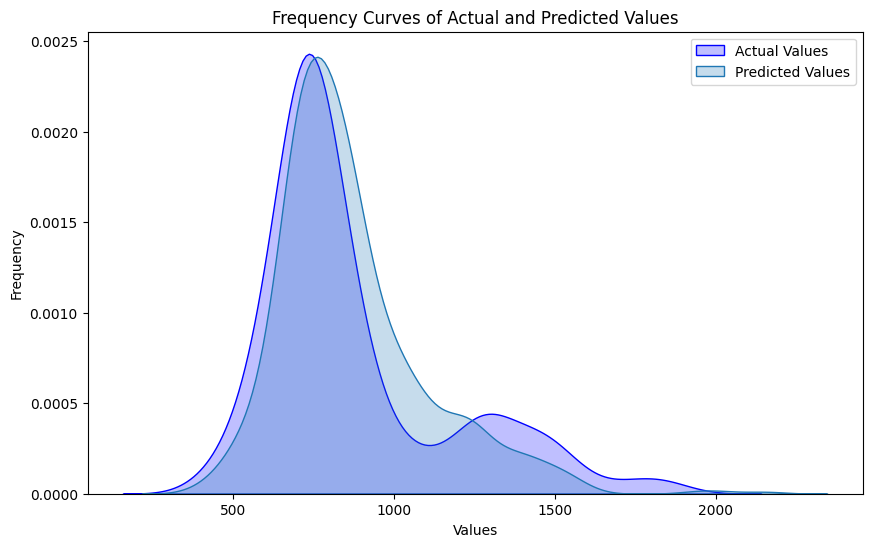

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the frequency curves
sns.kdeplot(y_test_task1, label='Actual Values', color='blue', shade=True)
sns.kdeplot(y_pred_task1, label='Predicted Values', color='red', shade=True)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency Curves of Actual and Predicted Values')
plt.legend()

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 2"],
    "Overall Accuracy": [overall_accuracy2],
    "Cross-Entropy Loss": [loss2],
    "Precision": [precision2],
    "Recall": [recall2],
    "F1 Score": [f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 2          0.834138            0.659655   0.842919  0.834138  0.835491

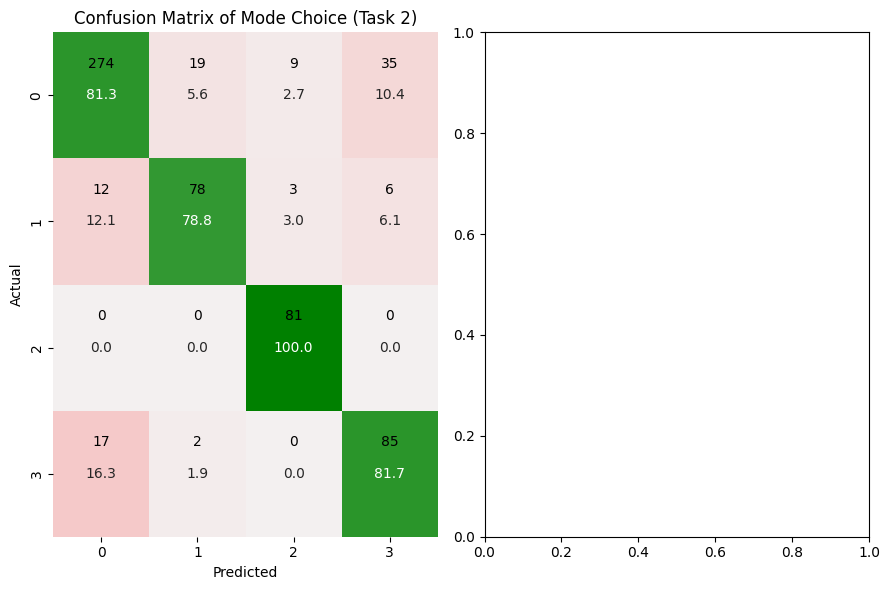

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 6))


# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs[0], conf_matrix2, 'Confusion Matrix of Mode Choice (Task 2)')

plt.tight_layout()
plt.show()


In [ ]:
from keras.models import Model
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization,Dropout, Input, Dense
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix
import seaborn as sns
import numpy as np
from tensorflow.keras import regularizers
import tensorflow as tf
import sys
import argparse
from tensorflow.keras.optimizers import Adam
from keras.metrics import Accuracy, Precision, Recall, F1Score
from keras.layers import Flatten, Concatenate, Reshape
import keras
import numpy as np
from tensorflow.keras.layers import Layer, Input, Dense
from tensorflow.keras.models import Model



class CrossStitch(Layer):
    def __init__(self, units, **kwargs):
        super(CrossStitch, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.cross_stitch_units = self.add_weight(shape=(self.units, self.units),
                                                  initializer='ones',
                                                  trainable=True,
                                                  name='cross_stitch_units')
        super(CrossStitch, self).build(input_shape)

    def call(self, inputs):
        task1, task2 = inputs

        task1_output = self.cross_stitch_units[0, 0] * task1 + self.cross_stitch_units[0, 1] * task2
        task2_output = self.cross_stitch_units[1, 0] * task1 + self.cross_stitch_units[1, 1] * task2

        return [task1_output, task2_output]

    def compute_output_shape(self, input_shape):
        return [(input_shape[0][0], self.units), (input_shape[0][0], self.units)]


# Define the shared input layer
input_layer = Input(shape=(input_data.shape[1],))

# Define task-specific layers - # 1
# Define the neural network layers
task1_hidden_layer_1 = Dense(200, activation='relu')(input_layer)
task1_hidden_layer_1 = BatchNormalization()(task1_hidden_layer_1)

task2_hidden_layer_1 = Dense(200, activation='relu')(input_layer)
task2_hidden_layer_1 = BatchNormalization()(task2_hidden_layer_1)

# Apply Cross_Strich - # 1
output1, output2 = CrossStitch(units=2)([task1_hidden_layer_1, task2_hidden_layer_1])

# Define task-specific layers - # 2
task1_hidden_layer_2 = Dense(200, activation='relu')(output1)
task1_hidden_layer_2 = BatchNormalization()(task1_hidden_layer_2)

task2_hidden_layer_2 = Dense(200, activation='relu')(output2)
task2_hidden_layer_2 = BatchNormalization()(task2_hidden_layer_2)

# Apply Cross_Strich - # 2
output1, output2 = CrossStitch(units=2)([task1_hidden_layer_2, task2_hidden_layer_2])

# Define task-specific layers - # 3
task1_hidden_layer_3 = Dense(200, activation='relu')(output1)
task1_hidden_layer_3 = BatchNormalization()(task1_hidden_layer_3)

task2_hidden_layer_3 = Dense(200, activation='relu')(output1)
task2_hidden_layer_3 = BatchNormalization()(task2_hidden_layer_3)

# Define Outputs
task1_output = Dense(1, name='task1_output')(task1_hidden_layer_3)
task2_output = Dense(4, activation="softmax", name='task2_output')(task2_hidden_layer_3)


# Define the model with multiple outputs
model = Model(inputs=input_layer, outputs=[task1_output, task2_output])


# Define a specific learning rate
learning_rate = 3e-4

# Instantiate an optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the custom loss function

model.compile(optimizer=optimizer,
              loss={'task1_output': 'mean_squared_error', 'task2_output': 'categorical_crossentropy'},
              metrics={'task1_output': 'mean_squared_error', 'task2_output': 'categorical_crossentropy'})



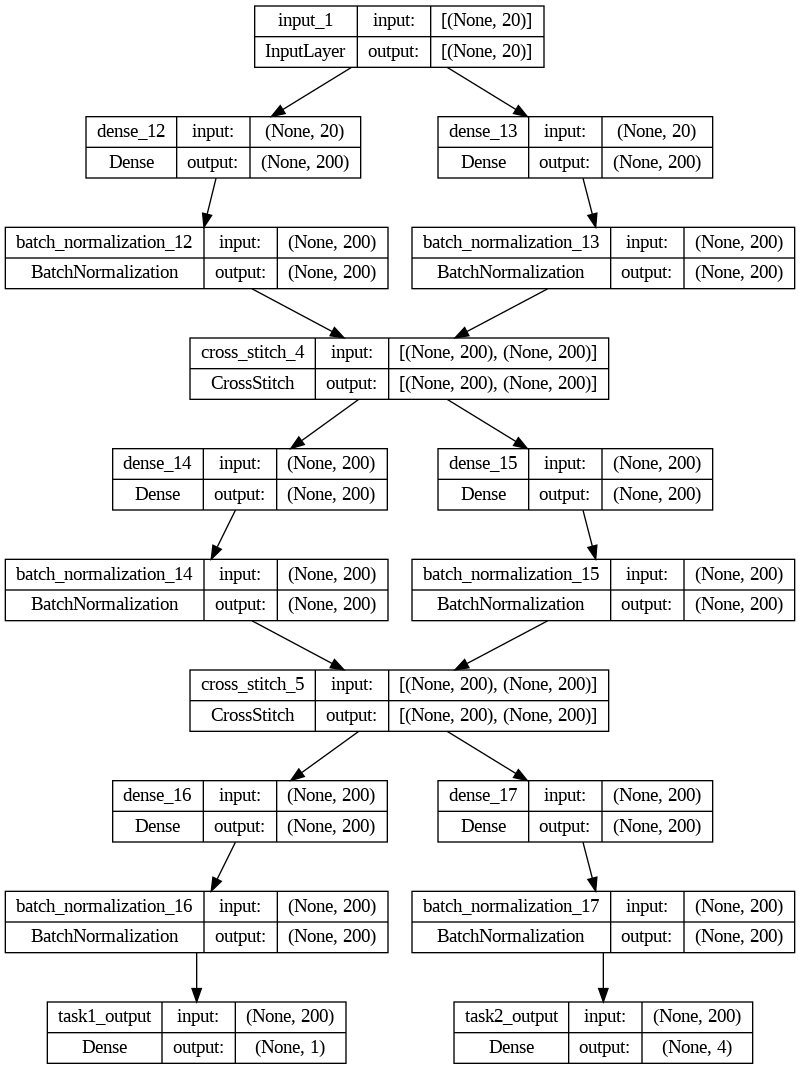

In [ ]:
keras.utils.plot_model(
    model, "ticket_classifier_with_shape_info.png", show_shapes=True)


In [ ]:
from keras.callbacks import EarlyStopping
'''
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model on the multi-task data with early stopping
history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=1000, batch_size=100, validation_split=0.20, callbacks=[early_stopping])
'''

history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=120, batch_size=32, validation_split=0.20)


Epoch 1/120
62/62 [==============================] - 13s 48ms/step - loss: 872697.0625 - task1_output_loss: 872695.8750 - task2_output_loss: 1.3173 - task1_output_mean_squared_error: 872695.8750 - task2_output_categorical_crossentropy: 1.3173 - val_loss: 906549.3750 - val_task1_output_loss: 906548.2500 - val_task2_output_loss: 1.1289 - val_task1_output_mean_squared_error: 906548.2500 - val_task2_output_categorical_crossentropy: 1.1289
Epoch 2/120
62/62 [==============================] - 1s 22ms/step - loss: 870441.3750 - task1_output_loss: 870440.5000 - task2_output_loss: 1.0233 - task1_output_mean_squared_error: 870440.5000 - task2_output_categorical_crossentropy: 1.0233 - val_loss: 907955.8125 - val_task1_output_loss: 907954.7500 - val_task2_output_loss: 1.0771 - val_task1_output_mean_squared_error: 907954.7500 - val_task2_output_categorical_crossentropy: 1.0771
Epoch 3/120
62/62 [==============================] - 1s 12ms/step - loss: 867713.7500 - task1_output_loss: 867712.9375 - ta

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)


20/20 [==============================] - 1s 4ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test_task1, y_pred_task1) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 20.15%


In [ ]:
from keras.callbacks import EarlyStopping
'''
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model on the multi-task data with early stopping
history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=1000, batch_size=100, validation_split=0.20, callbacks=[early_stopping])
'''

history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=120, batch_size=32, validation_split=0.20)


Epoch 1/120
62/62 [==============================] - 15s 31ms/step - loss: 872688.5625 - task1_output_loss: 872686.8750 - task2_output_loss: 1.4116 - task1_output_mean_squared_error: 872686.8750 - task2_output_categorical_crossentropy: 1.4116 - val_loss: 906284.8125 - val_task1_output_loss: 906283.7500 - val_task2_output_loss: 1.1561 - val_task1_output_mean_squared_error: 906283.7500 - val_task2_output_categorical_crossentropy: 1.1561
Epoch 2/120
62/62 [==============================] - 1s 17ms/step - loss: 870417.1250 - task1_output_loss: 870416.0625 - task2_output_loss: 1.0265 - task1_output_mean_squared_error: 870416.0625 - task2_output_categorical_crossentropy: 1.0265 - val_loss: 910508.0625 - val_task1_output_loss: 910507.0625 - val_task2_output_loss: 1.1073 - val_task1_output_mean_squared_error: 910507.0625 - val_task2_output_categorical_crossentropy: 1.1073
Epoch 3/120
62/62 [==============================] - 1s 18ms/step - loss: 867818.3125 - task1_output_loss: 867817.3750 - ta

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)


20/20 [==============================] - 1s 10ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test_task1, y_pred_task1) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 18.89%


<ipython-input-34-cea5bcbe88ee>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_task1, label='Actual Values', color='blue', shade=True)
<ipython-input-34-cea5bcbe88ee>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_task1, label='Predicted Values', color='red', shade=True)


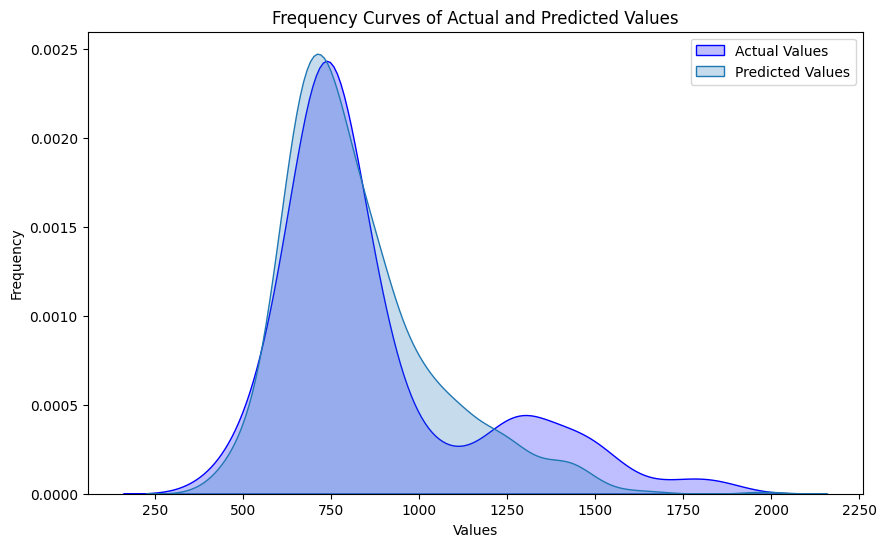

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the frequency curves
sns.kdeplot(y_test_task1, label='Actual Values', color='blue', shade=True)
sns.kdeplot(y_pred_task1, label='Predicted Values', color='red', shade=True)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency Curves of Actual and Predicted Values')
plt.legend()

# Show the plot
plt.show()


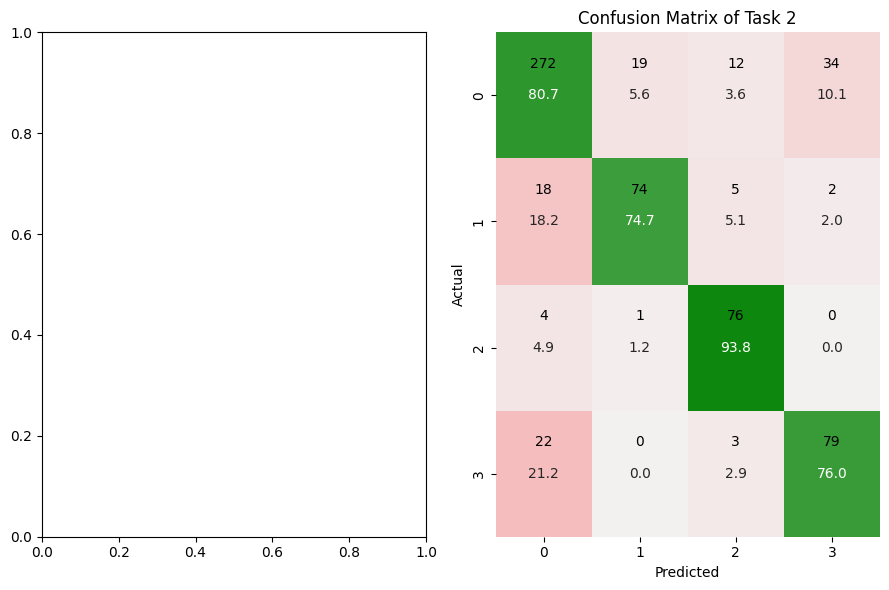

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 6))


# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs[1], conf_matrix2, 'Confusion Matrix of Task 2')

plt.tight_layout()
plt.show()


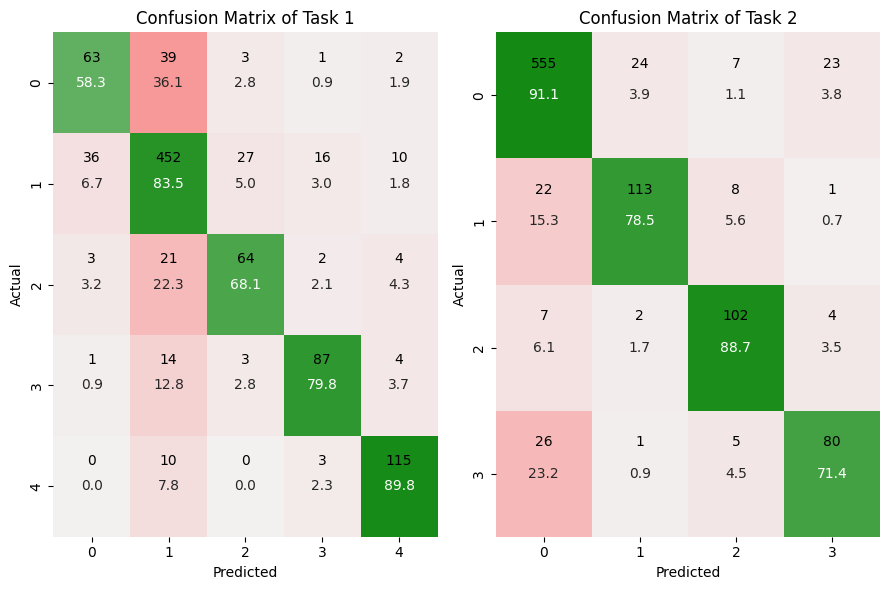

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 6))

# Confusion matrix for Task 1
conf_matrix1 = calculate_confusion_matrix(y_true_classes1, y_pred_classes1)
plot_confusion_matrix(axs[0], conf_matrix1, 'Confusion Matrix of Task 1')

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs[1], conf_matrix2, 'Confusion Matrix of Task 2')

plt.tight_layout()
plt.show()


In [ ]:
from keras.callbacks import EarlyStopping
'''
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model on the multi-task data with early stopping
history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=1000, batch_size=100, validation_split=0.20, callbacks=[early_stopping])
'''

history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=120, batch_size=32, validation_split=0.20)


Epoch 1/120
98/98 [==============================] - 10s 16ms/step - loss: 0.3702 - task1_output_loss: 0.2599 - task2_output_loss: 0.1104 - task1_output_accuracy: 0.3964 - task2_output_accuracy: 0.7059 - val_loss: 0.2630 - val_task1_output_loss: 0.1849 - val_task2_output_loss: 0.0781 - val_task1_output_accuracy: 0.5744 - val_task2_output_accuracy: 0.8167
Epoch 2/120
98/98 [==============================] - 1s 10ms/step - loss: 0.1829 - task1_output_loss: 0.1456 - task2_output_loss: 0.0373 - task1_output_accuracy: 0.6036 - task2_output_accuracy: 0.8829 - val_loss: 0.1927 - val_task1_output_loss: 0.1508 - val_task2_output_loss: 0.0419 - val_task1_output_accuracy: 0.6269 - val_task2_output_accuracy: 0.8936
Epoch 3/120
98/98 [==============================] - 1s 8ms/step - loss: 0.1329 - task1_output_loss: 0.1097 - task2_output_loss: 0.0232 - task1_output_accuracy: 0.6863 - task2_output_accuracy: 0.9208 - val_loss: 0.1507 - val_task1_output_loss: 0.1237 - val_task2_output_loss: 0.0270 - va

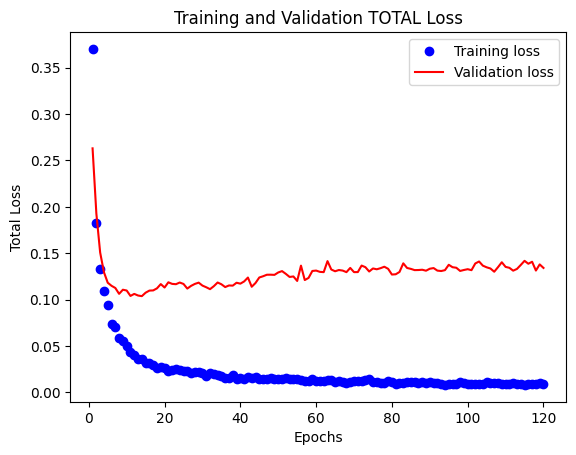

In [ ]:
# Extract accuracy values
train_accuracy = history.history['loss']
val_accuracy = history.history['val_loss']

# Plot accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'bo', label='Training loss')
plt.plot(epochs, val_accuracy, 'r', label='Validation loss')
plt.title('Training and Validation TOTAL Loss')
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 1
y_pred_classes1 = np.argmax(y_pred_task1, axis=1)
y_true_classes1 = np.argmax(y_test_task1, axis=1)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)


31/31 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy1 = accuracy_score(y_true_classes1, y_pred_classes1)
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss1 = cross_entropy_loss(y_pred_task1, y_test_task1)
loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision1 = precision_score(y_true_classes1, y_pred_classes1, average='weighted')
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall1 = recall_score(y_true_classes1, y_pred_classes1, average='weighted')
recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score1 = f1_score(y_true_classes1, y_pred_classes1, average='weighted')
f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 1", "Task 2"],
    "Overall Accuracy": [overall_accuracy1, overall_accuracy2],
    "Cross-Entropy Loss": [loss1, loss2],
    "Precision": [precision1, precision2],
    "Recall": [recall1, recall2],
    "F1 Score": [f1_score1, f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 1          0.816410            0.559847   0.823627  0.816410  0.818721
1  Task 2          0.957949            0.163339   0.958243  0.957949  0.957950

## Custom Keras Training - Adaptive Weighting Method

In [ ]:
x_train = x_train.to_numpy()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, BatchNormalization
from keras.regularizers import l2
from keras.models import Model

import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import keras_tuner as kt
from keras.layers import Input, Dense, Concatenate, Dropout, BatchNormalization


# Define your model
def create_model(input_shape):
    num_of_neurons_shared_layers = 200
    num_of_neurons_task_layers   = 300

    lamda1 = 0.0
    lamda2 = 0.0
    lamda3 = 0.0003


    input_layer = Input(shape=(input_data.shape[1],))

    # Define the shared hidden layers with L2 regularization
    shared_hidden_layer_1 = Dense(units=num_of_neurons_shared_layers,
                                    activation='relu', kernel_regularizer=l2(lamda1))(input_layer)

    shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)

    shared_hidden_layer_2 = Dense(units=num_of_neurons_shared_layers,
                                    activation='relu', kernel_regularizer=l2(lamda1))(shared_hidden_layer_1)

    shared_hidden_layer_2 = BatchNormalization()(shared_hidden_layer_2)

    shared_hidden_layer_3 = Dense(units=num_of_neurons_shared_layers,
                                    activation='relu', kernel_regularizer=l2(lamda1))(shared_hidden_layer_2)

    shared_hidden_layer_3 = BatchNormalization()(shared_hidden_layer_3)


    # Define task-specific output layers - Task1
    task1_hidden_layer_1 = Dense(units=num_of_neurons_task_layers,
                                    activation='relu', kernel_regularizer=l2(lamda2))(shared_hidden_layer_1)

    task1_hidden_layer_1 = BatchNormalization()(task1_hidden_layer_1)


    task1_hidden_layer_2 = Dense(units=num_of_neurons_task_layers,
                                    activation='relu', kernel_regularizer=l2(lamda2))(task1_hidden_layer_1)

    task1_hidden_layer_2 = BatchNormalization()(task1_hidden_layer_2)


    # Define task-specific output layers - Task2
    task2_hidden_layer_1 = Dense(units=num_of_neurons_task_layers,
                                    activation='relu', kernel_regularizer=l2(lamda3))(shared_hidden_layer_1)

    task2_hidden_layer_1 = BatchNormalization()(task2_hidden_layer_1)


    task2_hidden_layer_2 = Dense(units=num_of_neurons_task_layers,
                                    activation='relu', kernel_regularizer=l2(lamda3))(task2_hidden_layer_1)

    task2_hidden_layer_2 = BatchNormalization()(task2_hidden_layer_2)

    # Define the Outputs
    task1_output = Dense(1, name='task1_output')(task1_hidden_layer_2)
    task2_output = Dense(4, activation="softmax", name='task2_output')(task2_hidden_layer_2)

    # Define the model with multiple outputs
    model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

    return model

# Define metrics
train_loss_metric = tf.keras.metrics.Mean(name='train_loss')

train_accuracy_metric_task1 = tf.keras.metrics.MeanSquaredError(name='train_accuracy_task1')
train_accuracy_metric_task2 = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy_task2')

val_loss_metric = tf.keras.metrics.Mean(name='val_loss')
val_accuracy_metric_task1 = tf.keras.metrics.MeanSquaredError(name='val_accuracy_task1')
val_accuracy_metric_task2 = tf.keras.metrics.CategoricalAccuracy(name='val_accuracy_task2')

# Custom training loop
def custom_training_loop(model, optimizer, loss_fns, x_train, y_train_task1, y_train_task2, val_split, batch_size, epochs):
    # Convert inputs to numpy arrays if they are not already
    x_train = np.array(x_train)
    y_train_task1 = np.array(y_train_task1)
    y_train_task2 = np.array(y_train_task2)

    # Determine the size of the validation set
    val_size = int(len(x_train) * val_split)

    # Ensure reproducibility by setting a random seed
    np.random.seed(42)

    # Split the data into training and validation sets
    val_indices = np.random.choice(len(x_train), size=val_size, replace=False)
    train_indices = np.setdiff1d(np.arange(len(x_train)), val_indices)

    x_val = x_train[val_indices]
    y_val_task1 = y_train_task1[val_indices]
    y_val_task2 = y_train_task2[val_indices]

    x_train = x_train[train_indices]
    y_train_task1 = y_train_task1[train_indices]
    y_train_task2 = y_train_task2[train_indices]

    for epoch in range(epochs):
        print("\nStart of epoch %d" % (epoch,))
        # Reset the metrics at the start of each epoch
        train_loss_metric.reset_states()
        train_accuracy_metric_task1.reset_states()
        train_accuracy_metric_task2.reset_states()

        val_loss_metric.reset_states()
        val_accuracy_metric_task1.reset_states()
        val_accuracy_metric_task2.reset_states()

        for step in range(len(x_train) // batch_size):
            x_batch = x_train[step * batch_size: (step + 1) * batch_size]
            y_batch1 = y_train_task1[step * batch_size: (step + 1) * batch_size]
            y_batch2 = y_train_task2[step * batch_size: (step + 1) * batch_size]

            with tf.GradientTape() as tape:
                logits1, logits2 = model(x_batch, training=True)
                loss_value1 = loss_fns[0](y_batch1, logits1)
                loss_value2 = loss_fns[1](y_batch2, logits2)

                #task_weight1 = loss_value1/(loss_value1 + loss_value2)
                #task_weight2 = loss_value2/(loss_value1 + loss_value2)
                #loss_value = task_weight1 * loss_value1 + task_weight2 * loss_value2

                loss_value = loss_value1 +  loss_value2



            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

            # Update metrics
            train_loss_metric(loss_value)
            train_accuracy_metric_task1(y_batch1, logits1)
            train_accuracy_metric_task2(y_batch2, logits2)

        # Validation loop
        for step in range(len(x_val) // batch_size):
            x_val_batch = x_val[step * batch_size: (step + 1) * batch_size]
            y_val_batch1 = y_val_task1[step * batch_size: (step + 1) * batch_size]
            y_val_batch2 = y_val_task2[step * batch_size: (step + 1) * batch_size]

            val_logits1, val_logits2 = model(x_val_batch, training=False)
            val_loss_value1 = loss_fns[0](y_val_batch1, val_logits1)
            val_loss_value2 = loss_fns[1](y_val_batch2, val_logits2)

            #val_task_weight1 = val_loss_value1/(val_loss_value1 + val_loss_value2)
            #val_task_weight2 = val_loss_value2/(val_loss_value1 + val_loss_value2)
            #val_loss_value = val_task_weight1 * val_loss_value1 + val_task_weight2 * val_loss_value2

            val_loss_value = val_loss_value1 + val_loss_value2


            # Update validation metrics
            val_loss_metric(val_loss_value)
            val_accuracy_metric_task1(y_val_batch1, val_logits1)
            val_accuracy_metric_task2(y_val_batch2, val_logits2)

        # Display metrics at the end of each epoch
        print("Epoch %d: Training Loss: %.4f, Training Accuracy of Task 1: %.4f, Training Accuracy of Task 2: %.4f, Validation Loss: %.4f, Validation Accuracy of Task 1: %.4f, Validation Accuracy of Task 2: %.4f" %
              (epoch, train_loss_metric.result(), train_accuracy_metric_task1.result(), train_accuracy_metric_task2.result(),
               val_loss_metric.result(), val_accuracy_metric_task1.result(), val_accuracy_metric_task2.result()))

# Define custom testing loop
def custom_testing_loop(model, x_test, y_test_task1, y_test_task2):
    logits1, logits2 = model.predict(x_test)
    test_loss1 = tf.keras.losses.mean_squared_error(y_test_task1, logits1)
    test_loss2 = tf.keras.losses.categorical_crossentropy(y_test_task2, logits2)
    test_loss = tf.reduce_mean(test_loss1 + test_loss2)
    print("Test set loss: {:.4f}".format(float(test_loss)))

# Assume input_data is available
input_shape = input_data.shape[1]

# Instantiate the model
model = create_model(input_shape)


# Define the learning rate
learning_rate = 3e-4
# Instantiate an optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)


loss_fns = [tf.keras.losses.MeanSquaredError(), tf.keras.losses.CategoricalCrossentropy()]

# Define batch size and number of epochs
batch_size = 32
epochs = 120

# Custom training loop
custom_training_loop(model, optimizer, loss_fns, x_train, y_train_task1, y_train_task2, 0.2, batch_size, epochs)




Start of epoch 0
Epoch 0: Training Loss: 873544.0625, Training Accuracy of Task 1: 873549.4375, Training Accuracy of Task 2: 0.5423, Validation Loss: 903535.8125, Validation Accuracy of Task 1: 903538.0000, Validation Accuracy of Task 2: 0.5063

Start of epoch 1
Epoch 1: Training Loss: 872195.3750, Training Accuracy of Task 1: 872197.2500, Training Accuracy of Task 2: 0.7666, Validation Loss: 901737.1250, Validation Accuracy of Task 1: 901743.6250, Validation Accuracy of Task 2: 0.5708

Start of epoch 2
Epoch 2: Training Loss: 870010.0000, Training Accuracy of Task 1: 869998.9375, Training Accuracy of Task 2: 0.8488, Validation Loss: 898843.2500, Validation Accuracy of Task 1: 898885.6250, Validation Accuracy of Task 2: 0.6354

Start of epoch 3
Epoch 3: Training Loss: 866920.1875, Training Accuracy of Task 1: 866950.8750, Training Accuracy of Task 2: 0.9007, Validation Loss: 895725.1875, Validation Accuracy of Task 1: 895704.0000, Validation Accuracy of Task 2: 0.6687

Start of epoch 

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)


# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)


20/20 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test_task1, y_pred_task1) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 26.30%


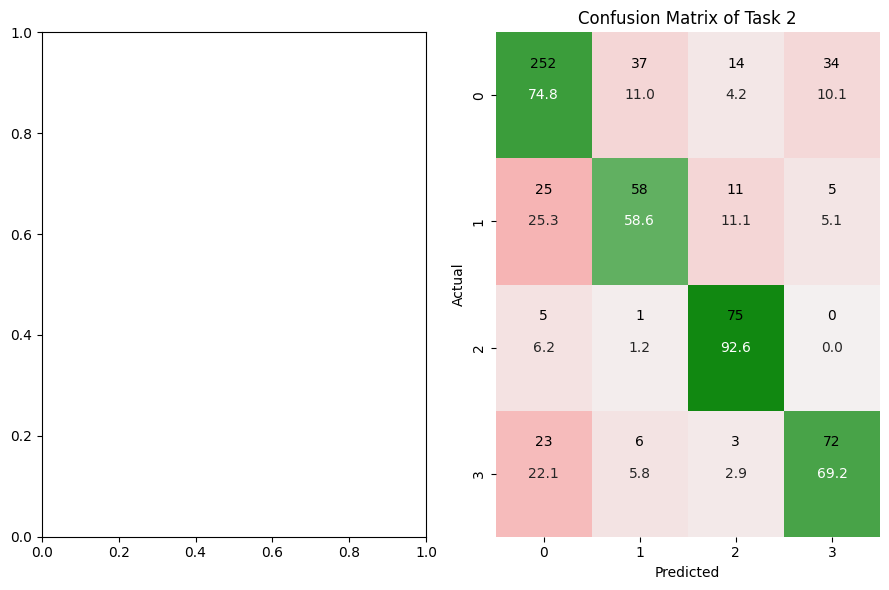

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 6))


# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs[1], conf_matrix2, 'Confusion Matrix of Task 2')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy1 = accuracy_score(y_true_classes1, y_pred_classes1)
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss1 = cross_entropy_loss(y_pred_task1, y_test_task1)
loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision1 = precision_score(y_true_classes1, y_pred_classes1, average='weighted')
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall1 = recall_score(y_true_classes1, y_pred_classes1, average='weighted')
recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score1 = f1_score(y_true_classes1, y_pred_classes1, average='weighted')
f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 1", "Task 2"],
    "Overall Accuracy": [overall_accuracy1, overall_accuracy2],
    "Cross-Entropy Loss": [loss1, loss2],
    "Precision": [precision1, precision2],
    "Recall": [recall1, recall2],
    "F1 Score": [f1_score1, f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 1          0.829744            1.172139   0.828962  0.829744  0.828779
1  Task 2          0.954872            0.362376   0.954788  0.954872  0.954766

## Ask Uncertainly

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, BatchNormalization
from keras.regularizers import l2
from keras.models import Model

#x_train = x_train.to_numpy()


# Define your model
def create_model():
    input_layer = Input(shape=(input_data.shape[1],))  # Adjust input shape according to your data
    # Define the shared hidden layers
    shared_hidden_layer_1 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(input_layer)
    shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)
    shared_hidden_layer_1 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(shared_hidden_layer_1)
    shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)
    shared_hidden_layer_1 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(shared_hidden_layer_1)
    shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)

    task1_hidden_layer_1 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(shared_hidden_layer_1)
    task1_hidden_layer_1 = BatchNormalization()(task1_hidden_layer_1)
    task1_hidden_layer_1 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(task1_hidden_layer_1)
    task1_hidden_layer_1 = BatchNormalization()(task1_hidden_layer_1)


    task1_hidden_layer_2 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(shared_hidden_layer_1)
    task1_hidden_layer_2 = BatchNormalization()(task1_hidden_layer_2)
    task1_hidden_layer_2 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(task1_hidden_layer_2)
    task1_hidden_layer_2 = BatchNormalization()(task1_hidden_layer_2)



    # Define the Outputs
    task1_output = Dense(5, activation="softmax", name='task1_output')(task1_hidden_layer_1)
    task2_output = Dense(4, activation="softmax", name='task2_output')(task1_hidden_layer_2)

    model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

    return model



# Define metrics
train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
train_accuracy_metric_task1 = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy_task1')
train_accuracy_metric_task2 = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy_task2')

val_loss_metric = tf.keras.metrics.Mean(name='val_loss')
val_accuracy_metric_task1 = tf.keras.metrics.CategoricalAccuracy(name='val_accuracy_task1')
val_accuracy_metric_task2 = tf.keras.metrics.CategoricalAccuracy(name='val_accuracy_task2')


# Custom training loop
def custom_training_loop(model, optimizer, loss_fn, x_train, y_train_task1, y_train_task2, val_split, batch_size, epochs):

    # Determine the size of the validation set
    val_size = int(len(x_train) * val_split)
    # Split the data into training and validation sets
    val_indices = np.random.choice(len(x_train), size=val_size, replace=False)
    train_indices = np.delete(np.arange(len(x_train)), val_indices)

    x_val = x_train[val_indices]
    y_val_task1 = y_train_task1[val_indices]
    y_val_task2 = y_train_task2[val_indices]

    x_train = x_train[train_indices]
    y_train_task1 = y_train_task1[train_indices]
    y_train_task2 = y_train_task2[train_indices]


    # Define learnable parameters
    w1 = tf.Variable(1.0, trainable=True, dtype=tf.float32)
    w2 = tf.Variable(1.0, trainable=True, dtype=tf.float32)


    for epoch in range(epochs):
        print("\nStart of epoch %d" % (epoch,))
        # Reset the metrics at the start of each epoch
        train_loss_metric.reset_states()
        train_accuracy_metric_task1.reset_states()
        train_accuracy_metric_task2.reset_states()

        val_loss_metric.reset_states()
        val_accuracy_metric_task1.reset_states()
        val_accuracy_metric_task2.reset_states()

        for step in range(len(x_train) // batch_size):
            x_batch = x_train[step * batch_size: (step + 1) * batch_size]
            y_batch1 = y_train_task1[step * batch_size: (step + 1) * batch_size]
            y_batch2 = y_train_task2[step * batch_size: (step + 1) * batch_size]

            with tf.GradientTape() as tape:
                logits1, logits2 = model(x_batch, training=True)
                loss_value1 = loss_fn(y_batch1, logits1)
                loss_value2 = loss_fn(y_batch2, logits2)

                task_loss1 = 1 / (2 * tf.exp(w1)) * loss_value1 + w1 / 2
                task_loss2 = 1 / (2 * tf.exp(w2)) * loss_value2 + w2 / 2

                loss_value = task_loss1 + task_loss2

            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

            # Update metrics
            train_loss_metric(loss_value)
            train_accuracy_metric_task1(y_batch1, logits1)
            train_accuracy_metric_task2(y_batch2, logits2)

        # Validation loop
        for step in range(len(x_val) // batch_size):
            x_val_batch = x_val[step * batch_size: (step + 1) * batch_size]
            y_val_batch1 = y_val_task1[step * batch_size: (step + 1) * batch_size]
            y_val_batch2 = y_val_task2[step * batch_size: (step + 1) * batch_size]

            val_logits1, val_logits2 = model(x_val_batch, training=False)
            val_loss_value1 = loss_fn(y_val_batch1, val_logits1)
            val_loss_value2 = loss_fn(y_val_batch2, val_logits2)

            val_loss_value = val_loss_value1 + val_loss_value2

            # Update validation metrics
            val_loss_metric(val_loss_value)
            val_accuracy_metric_task1(y_val_batch1, val_logits1)
            val_accuracy_metric_task2(y_val_batch2, val_logits2)


        # Display metrics at the end of each epoch
        print("Epoch %d: Training Loss: %.4f, Training Accuracy of Task 1: %.4f, Training Accuracy of Task 2: %.4f, Validation Loss: %.4f, Validation Accuracy of Task 1: %.4f, Validation Accuracy of Task 2: %.4f" %
              (epoch, train_loss_metric.result(), train_accuracy_metric_task1.result(), train_accuracy_metric_task2.result(),
               val_loss_metric.result(), val_accuracy_metric_task1.result(), val_accuracy_metric_task2.result()))

# Define custom testing loop
def custom_testing_loop(model, x_test, y_test_task1, y_test_task2):
    logits1, logits2 = model.predict(x_test)
    test_loss1 = tf.keras.losses.categorical_crossentropy(y_test_task1, logits1)
    test_loss2 = tf.keras.losses.categorical_crossentropy(y_test_task2, logits2)
    test_loss = tf.reduce_mean(test_loss1 + test_loss2)
    print("Test set loss: {:.4f}".format(float(test_loss)))

# Instantiate the model
model = create_model()

# Define optimizer and loss function
optimizer = keras.optimizers.Adam()
loss_fn = tf.keras.losses.CategoricalCrossentropy()

# Define batch size and number of epochs
batch_size = 32
epochs = 120

# Custom training loop
custom_training_loop(model, optimizer, loss_fn, x_train, y_train_task1, y_train_task2, 0.2, batch_size, epochs)




Start of epoch 0
Epoch 0: Training Loss: 1.4489, Training Accuracy of Task 1: 0.4598, Training Accuracy of Task 2: 0.6180, Validation Loss: 2.2290, Validation Accuracy of Task 1: 0.5469, Validation Accuracy of Task 2: 0.6224

Start of epoch 1
Epoch 1: Training Loss: 1.2439, Training Accuracy of Task 1: 0.7181, Training Accuracy of Task 2: 0.8122, Validation Loss: 1.9264, Validation Accuracy of Task 1: 0.5599, Validation Accuracy of Task 2: 0.6797

Start of epoch 2
Epoch 2: Training Loss: 1.1528, Training Accuracy of Task 1: 0.8256, Training Accuracy of Task 2: 0.8992, Validation Loss: 1.6477, Validation Accuracy of Task 1: 0.6380, Validation Accuracy of Task 2: 0.7552

Start of epoch 3
Epoch 3: Training Loss: 1.0981, Training Accuracy of Task 1: 0.9059, Training Accuracy of Task 2: 0.9372, Validation Loss: 1.5246, Validation Accuracy of Task 1: 0.6693, Validation Accuracy of Task 2: 0.8047

Start of epoch 4
Epoch 4: Training Loss: 1.0680, Training Accuracy of Task 1: 0.9362, Training 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, BatchNormalization
from keras.regularizers import l2
from keras.models import Model

#x_train = x_train.to_numpy()


# Define your model
def create_model():
    input_layer = Input(shape=(input_data.shape[1],))  # Adjust input shape according to your data
    # Define the shared hidden layers
    shared_hidden_layer_1 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(input_layer)
    shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)
    shared_hidden_layer_1 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(shared_hidden_layer_1)
    shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)
    shared_hidden_layer_1 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(shared_hidden_layer_1)
    shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)

    task1_hidden_layer_1 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(shared_hidden_layer_1)
    task1_hidden_layer_1 = BatchNormalization()(task1_hidden_layer_1)
    task1_hidden_layer_1 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(task1_hidden_layer_1)
    task1_hidden_layer_1 = BatchNormalization()(task1_hidden_layer_1)


    task1_hidden_layer_2 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(shared_hidden_layer_1)
    task1_hidden_layer_2 = BatchNormalization()(task1_hidden_layer_2)
    task1_hidden_layer_2 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(task1_hidden_layer_2)
    task1_hidden_layer_2 = BatchNormalization()(task1_hidden_layer_2)



    # Define the Outputs
    task1_output = Dense(5, activation="softmax", name='task1_output')(task1_hidden_layer_1)
    task2_output = Dense(4, activation="softmax", name='task2_output')(task1_hidden_layer_2)

    model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

    return model



# Define metrics
train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
train_accuracy_metric_task1 = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy_task1')
train_accuracy_metric_task2 = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy_task2')

val_loss_metric = tf.keras.metrics.Mean(name='val_loss')
val_accuracy_metric_task1 = tf.keras.metrics.CategoricalAccuracy(name='val_accuracy_task1')
val_accuracy_metric_task2 = tf.keras.metrics.CategoricalAccuracy(name='val_accuracy_task2')


# Custom training loop
def custom_training_loop(model, optimizer, loss_fn, x_train, y_train_task1, y_train_task2, val_split, batch_size, epochs):

    # Determine the size of the validation set
    val_size = int(len(x_train) * val_split)
    # Split the data into training and validation sets
    val_indices = np.random.choice(len(x_train), size=val_size, replace=False)
    train_indices = np.delete(np.arange(len(x_train)), val_indices)

    x_val = x_train[val_indices]
    y_val_task1 = y_train_task1[val_indices]
    y_val_task2 = y_train_task2[val_indices]

    x_train = x_train[train_indices]
    y_train_task1 = y_train_task1[train_indices]
    y_train_task2 = y_train_task2[train_indices]


    # Define learnable parameters
    w1 = tf.Variable(1.0, trainable=True, dtype=tf.float32)
    w2 = tf.Variable(1.0, trainable=True, dtype=tf.float32)


    for epoch in range(epochs):
        print("\nStart of epoch %d" % (epoch,))
        # Reset the metrics at the start of each epoch
        train_loss_metric.reset_states()
        train_accuracy_metric_task1.reset_states()
        train_accuracy_metric_task2.reset_states()

        val_loss_metric.reset_states()
        val_accuracy_metric_task1.reset_states()
        val_accuracy_metric_task2.reset_states()

        for step in range(len(x_train) // batch_size):
            x_batch = x_train[step * batch_size: (step + 1) * batch_size]
            y_batch1 = y_train_task1[step * batch_size: (step + 1) * batch_size]
            y_batch2 = y_train_task2[step * batch_size: (step + 1) * batch_size]

            with tf.GradientTape() as tape:
                logits1, logits2 = model(x_batch, training=True)
                loss_value1 = loss_fn(y_batch1, logits1)
                loss_value2 = loss_fn(y_batch2, logits2)

                task_loss1 = 1 / (2 * tf.exp(w1)) * loss_value1 + w1 / 2
                task_loss2 = 1 / (2 * tf.exp(w2)) * loss_value2 + w2 / 2

                loss_value = task_loss1 + task_loss2

            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

            # Update metrics
            train_loss_metric(loss_value)
            train_accuracy_metric_task1(y_batch1, logits1)
            train_accuracy_metric_task2(y_batch2, logits2)

        # Validation loop
        for step in range(len(x_val) // batch_size):
            x_val_batch = x_val[step * batch_size: (step + 1) * batch_size]
            y_val_batch1 = y_val_task1[step * batch_size: (step + 1) * batch_size]
            y_val_batch2 = y_val_task2[step * batch_size: (step + 1) * batch_size]

            val_logits1, val_logits2 = model(x_val_batch, training=False)
            val_loss_value1 = loss_fn(y_val_batch1, val_logits1)
            val_loss_value2 = loss_fn(y_val_batch2, val_logits2)

            val_loss_value = val_loss_value1 + val_loss_value2

            # Update validation metrics
            val_loss_metric(val_loss_value)
            val_accuracy_metric_task1(y_val_batch1, val_logits1)
            val_accuracy_metric_task2(y_val_batch2, val_logits2)


        # Display metrics at the end of each epoch
        print("Epoch %d: Training Loss: %.4f, Training Accuracy of Task 1: %.4f, Training Accuracy of Task 2: %.4f, Validation Loss: %.4f, Validation Accuracy of Task 1: %.4f, Validation Accuracy of Task 2: %.4f" %
              (epoch, train_loss_metric.result(), train_accuracy_metric_task1.result(), train_accuracy_metric_task2.result(),
               val_loss_metric.result(), val_accuracy_metric_task1.result(), val_accuracy_metric_task2.result()))

# Define custom testing loop
def custom_testing_loop(model, x_test, y_test_task1, y_test_task2):
    logits1, logits2 = model.predict(x_test)
    test_loss1 = tf.keras.losses.categorical_crossentropy(y_test_task1, logits1)
    test_loss2 = tf.keras.losses.categorical_crossentropy(y_test_task2, logits2)
    test_loss = tf.reduce_mean(test_loss1 + test_loss2)
    print("Test set loss: {:.4f}".format(float(test_loss)))

# Instantiate the model
model = create_model()

# Define optimizer and loss function
optimizer = keras.optimizers.Adam()
loss_fn = tf.keras.losses.CategoricalCrossentropy()

# Define batch size and number of epochs
batch_size = 32
epochs = 120

# Custom training loop
custom_training_loop(model, optimizer, loss_fn, x_train, y_train_task1, y_train_task2, 0.2, batch_size, epochs)




Start of epoch 0
Epoch 0: Training Loss: 1.3654, Training Accuracy of Task 1: 0.4955, Training Accuracy of Task 2: 0.7948, Validation Loss: 1.6914, Validation Accuracy of Task 1: 0.5703, Validation Accuracy of Task 2: 0.8529

Start of epoch 1
Epoch 1: Training Loss: 1.1556, Training Accuracy of Task 1: 0.7687, Training Accuracy of Task 2: 0.9465, Validation Loss: 1.2485, Validation Accuracy of Task 1: 0.6562, Validation Accuracy of Task 2: 0.8802

Start of epoch 2
Epoch 2: Training Loss: 1.0815, Training Accuracy of Task 1: 0.8956, Training Accuracy of Task 2: 0.9826, Validation Loss: 1.0230, Validation Accuracy of Task 1: 0.6979, Validation Accuracy of Task 2: 0.9479

Start of epoch 3
Epoch 3: Training Loss: 1.0424, Training Accuracy of Task 1: 0.9607, Training Accuracy of Task 2: 0.9939, Validation Loss: 1.0831, Validation Accuracy of Task 1: 0.7357, Validation Accuracy of Task 2: 0.9388

Start of epoch 4
Epoch 4: Training Loss: 1.0297, Training Accuracy of Task 1: 0.9781, Training 

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 1
y_pred_classes1 = np.argmax(y_pred_task1, axis=1)
y_true_classes1 = np.argmax(y_test_task1, axis=1)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)


31/31 [==============================] - 1s 5ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy1 = accuracy_score(y_true_classes1, y_pred_classes1)
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss1 = cross_entropy_loss(y_pred_task1, y_test_task1)
loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision1 = precision_score(y_true_classes1, y_pred_classes1, average='weighted')
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall1 = recall_score(y_true_classes1, y_pred_classes1, average='weighted')
recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score1 = f1_score(y_true_classes1, y_pred_classes1, average='weighted')
f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 1", "Task 2"],
    "Overall Accuracy": [overall_accuracy1, overall_accuracy2],
    "Cross-Entropy Loss": [loss1, loss2],
    "Precision": [precision1, precision2],
    "Recall": [recall1, recall2],
    "F1 Score": [f1_score1, f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 1          0.803077            1.506318   0.801817  0.803077  0.801147
1  Task 2          0.958974            0.400871   0.958882  0.958974  0.958866

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.7 MB/s eta 0:00:00


In [ ]:
?x_test

In [ ]:
import shap

explainer = shap.KernelExplainer(model.predict,x_train)

shap_values = explainer.shap_values(x_test,nsamples=100)

shap.summary_plot(shap_values,X_test,feature_names=features)


122/122 [==============================] - 1s 7ms/step


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
explainer = shap.Explainer(model, x_train)
shap_values = explainer.shap_values(x_test)



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 4954) + inhomogeneous part.

In [ ]:
explainer = shap.KernelExplainer(model=model.predict, data=input.head(50), link="identity")


AttributeError: 'function' object has no attribute 'head'

In [ ]:
?x_test

In [ ]:
explainer

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, BatchNormalization
from keras.regularizers import l2
from keras.models import Model

#x_train = x_train.to_numpy()


# Define your model
def create_model():
    input_layer = Input(shape=(input_data.shape[1],))  # Adjust input shape according to your data
    # Define the shared hidden layers
    shared_hidden_layer_1 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(input_layer)
    shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)
    shared_hidden_layer_1 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(shared_hidden_layer_1)
    shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)
    shared_hidden_layer_1 = Dense(200, activation='relu', kernel_regularizer=l2(5e-4))(shared_hidden_layer_1)
    shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)

    # Define the Outputs
    task1_output = Dense(5, activation="softmax", name='task1_output')(shared_hidden_layer_1)
    task2_output = Dense(4, activation="softmax", name='task2_output')(shared_hidden_layer_1)

    model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

    return model


# Define metrics
train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
train_accuracy_metric_task1 = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy_task1')
train_accuracy_metric_task2 = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy_task2')

val_loss_metric = tf.keras.metrics.Mean(name='val_loss')
val_accuracy_metric_task1 = tf.keras.metrics.CategoricalAccuracy(name='val_accuracy_task1')
val_accuracy_metric_task2 = tf.keras.metrics.CategoricalAccuracy(name='val_accuracy_task2')


# Custom training loop
def custom_training_loop(model, optimizer, loss_fn, x_train, y_train_task1, y_train_task2, val_split, batch_size, epochs):

    # Determine the size of the validation set
    val_size = int(len(x_train) * val_split)
    # Split the data into training and validation sets
    val_indices = np.random.choice(len(x_train), size=val_size, replace=False)
    train_indices = np.delete(np.arange(len(x_train)), val_indices)

    x_val = x_train[val_indices]
    y_val_task1 = y_train_task1[val_indices]
    y_val_task2 = y_train_task2[val_indices]

    x_train = x_train[train_indices]
    y_train_task1 = y_train_task1[train_indices]
    y_train_task2 = y_train_task2[train_indices]


    # Define learnable parameters
    w1 = tf.Variable(1.0, trainable=True, dtype=tf.float32)
    w2 = tf.Variable(1.0, trainable=True, dtype=tf.float32)


    for epoch in range(epochs):
        print("\nStart of epoch %d" % (epoch,))
        # Reset the metrics at the start of each epoch
        train_loss_metric.reset_states()
        train_accuracy_metric_task1.reset_states()
        train_accuracy_metric_task2.reset_states()

        val_loss_metric.reset_states()
        val_accuracy_metric_task1.reset_states()
        val_accuracy_metric_task2.reset_states()

        for step in range(len(x_train) // batch_size):
            x_batch = x_train[step * batch_size: (step + 1) * batch_size]
            y_batch1 = y_train_task1[step * batch_size: (step + 1) * batch_size]
            y_batch2 = y_train_task2[step * batch_size: (step + 1) * batch_size]

            with tf.GradientTape() as tape:
                logits1, logits2 = model(x_batch, training=True)
                loss_value1 = loss_fn(y_batch1, logits1)
                loss_value2 = loss_fn(y_batch2, logits2)

                task_loss1 = 1 / (2 * tf.exp(w1)) * loss_value1 + w1 / 2
                task_loss2 = 1 / (2 * tf.exp(w2)) * loss_value2 + w2 / 2

                loss_value = task_loss1 + task_loss2

            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

            # Update metrics
            train_loss_metric(loss_value)
            train_accuracy_metric_task1(y_batch1, logits1)
            train_accuracy_metric_task2(y_batch2, logits2)

        # Validation loop
        for step in range(len(x_val) // batch_size):
            x_val_batch = x_val[step * batch_size: (step + 1) * batch_size]
            y_val_batch1 = y_val_task1[step * batch_size: (step + 1) * batch_size]
            y_val_batch2 = y_val_task2[step * batch_size: (step + 1) * batch_size]

            val_logits1, val_logits2 = model(x_val_batch, training=False)
            val_loss_value1 = loss_fn(y_val_batch1, val_logits1)
            val_loss_value2 = loss_fn(y_val_batch2, val_logits2)

            val_loss_value = val_loss_value1 + val_loss_value2

            # Update validation metrics
            val_loss_metric(val_loss_value)
            val_accuracy_metric_task1(y_val_batch1, val_logits1)
            val_accuracy_metric_task2(y_val_batch2, val_logits2)


        # Display metrics at the end of each epoch
        print("Epoch %d: Training Loss: %.4f, Training Accuracy of Task 1: %.4f, Training Accuracy of Task 2: %.4f, Validation Loss: %.4f, Validation Accuracy of Task 1: %.4f, Validation Accuracy of Task 2: %.4f" %
              (epoch, train_loss_metric.result(), train_accuracy_metric_task1.result(), train_accuracy_metric_task2.result(),
               val_loss_metric.result(), val_accuracy_metric_task1.result(), val_accuracy_metric_task2.result()))

# Define custom testing loop
def custom_testing_loop(model, x_test, y_test_task1, y_test_task2):
    logits1, logits2 = model.predict(x_test)
    test_loss1 = tf.keras.losses.categorical_crossentropy(y_test_task1, logits1)
    test_loss2 = tf.keras.losses.categorical_crossentropy(y_test_task2, logits2)
    test_loss = tf.reduce_mean(test_loss1 + test_loss2)
    print("Test set loss: {:.4f}".format(float(test_loss)))

# Instantiate the model
model = create_model()

# Define optimizer and loss function
optimizer = keras.optimizers.Adam()
loss_fn = tf.keras.losses.CategoricalCrossentropy()

# Define batch size and number of epochs
batch_size = 32
epochs = 120

# Custom training loop
custom_training_loop(model, optimizer, loss_fn, x_train, y_train_task1, y_train_task2, 0.2, batch_size, epochs)




Start of epoch 0
Epoch 0: Training Loss: 1.3612, Training Accuracy of Task 1: 0.4994, Training Accuracy of Task 2: 0.8035, Validation Loss: 1.6775, Validation Accuracy of Task 1: 0.5938, Validation Accuracy of Task 2: 0.8867

Start of epoch 1
Epoch 1: Training Loss: 1.1884, Training Accuracy of Task 1: 0.7216, Training Accuracy of Task 2: 0.9352, Validation Loss: 1.2108, Validation Accuracy of Task 1: 0.6549, Validation Accuracy of Task 2: 0.9297

Start of epoch 2
Epoch 2: Training Loss: 1.1318, Training Accuracy of Task 1: 0.8057, Training Accuracy of Task 2: 0.9620, Validation Loss: 0.9773, Validation Accuracy of Task 1: 0.7201, Validation Accuracy of Task 2: 0.9466

Start of epoch 3
Epoch 3: Training Loss: 1.0939, Training Accuracy of Task 1: 0.8724, Training Accuracy of Task 2: 0.9800, Validation Loss: 0.8989, Validation Accuracy of Task 1: 0.7409, Validation Accuracy of Task 2: 0.9466

Start of epoch 4
Epoch 4: Training Loss: 1.0678, Training Accuracy of Task 1: 0.9198, Training 

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 1
y_pred_classes1 = np.argmax(y_pred_task1, axis=1)
y_true_classes1 = np.argmax(y_test_task1, axis=1)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)


31/31 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy1 = accuracy_score(y_true_classes1, y_pred_classes1)
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss1 = cross_entropy_loss(y_pred_task1, y_test_task1)
loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision1 = precision_score(y_true_classes1, y_pred_classes1, average='weighted')
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall1 = recall_score(y_true_classes1, y_pred_classes1, average='weighted')
recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score1 = f1_score(y_true_classes1, y_pred_classes1, average='weighted')
f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 1", "Task 2"],
    "Overall Accuracy": [overall_accuracy1, overall_accuracy2],
    "Cross-Entropy Loss": [loss1, loss2],
    "Precision": [precision1, precision2],
    "Recall": [recall1, recall2],
    "F1 Score": [f1_score1, f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 1          0.803077            1.231763   0.802608  0.803077  0.802306
1  Task 2          0.942564            0.434210   0.942615  0.942564  0.942529

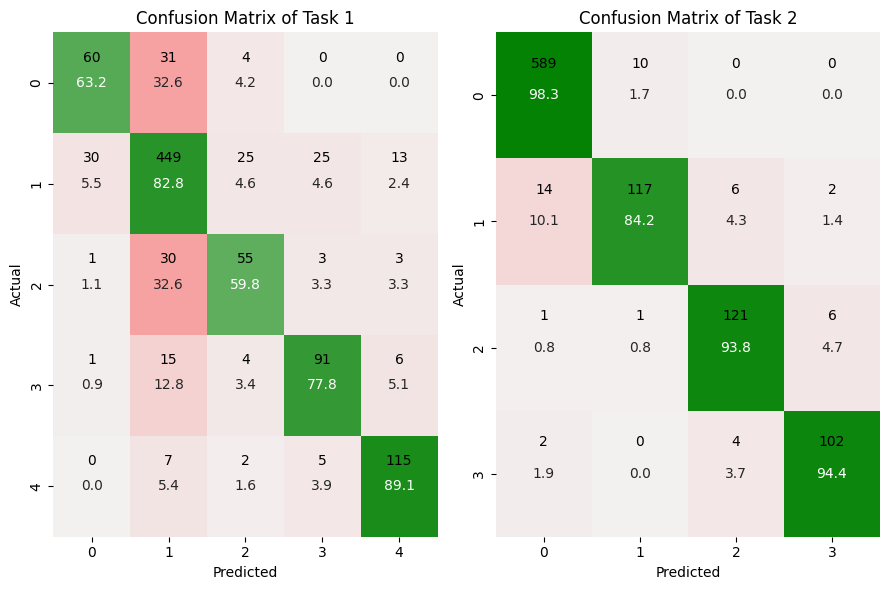

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 6))

# Confusion matrix for Task 1
conf_matrix1 = calculate_confusion_matrix(y_true_classes1, y_pred_classes1)
plot_confusion_matrix(axs[0], conf_matrix1, 'Confusion Matrix of Task 1')

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs[1], conf_matrix2, 'Confusion Matrix of Task 2')

plt.tight_layout()
plt.show()


# Hazard-based Model

## Task 1 (Departure Time)

In [ ]:
pip install lifelines

  Obtaining dependency information for lifelines from https://files.pythonhosted.org/packages/fa/7d/b227ca1bae2474f954f00644dcf692f75701043717565a1a56685cb69416/lifelines-0.29.0-py3-none-any.whl.metadata
  Obtaining dependency information for pandas>=2.1 from https://files.pythonhosted.org/packages/ab/63/966db1321a0ad55df1d1fe51505d2cdae191b84c907974873817b0a6e849/pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for autograd>=1.5 from https://files.pythonhosted.org/packages/81/70/d5c7c2a458b8be96495c8b1634c2155beab58cbe864b7a9a5c06c2e52520/autograd-1.6.2-py3-none-any.whl.metadata
  Using cached autograd_gamma-0.5.0-py3-none-any.whl
  Obtaining dependency information for formulaic>=0.2.2 from https://files.pythonhosted.org/packages/f7/a3/eeb29e0dbfd6ef0bafd0b3107649e0b8a02b382265f5e9572c7bda22eeff/formulaic-1.0.2-py3-none-any.whl.metadata
  Obtaining dependency information for interface-meta>=1.2.0 from https://files.pythonhosted.org/packages/02/3f/a6ec

In [ ]:
# Concatenate x_train and y_train_task2_MNL
df_Hzrd = pd.concat([x_train, pd.DataFrame(y_train_task1,columns=['Trip_Duration'])], axis=1)


In [ ]:
df_Hzrd = pd.concat([x_train, y_train_task1], axis=1)

df_Hzrd['Gender'] = df_Hzrd['Gender'].replace(2, 0)


df_Hzrd['Event'] = 1

In [ ]:
print(df_Hzrd)

      Driving_minutes  Driving_km  Transit_minutes  Transit_km  \
168          0.976513    0.766901         0.489305   -0.005352   
2590         0.099706   -0.066708        -0.217301   -0.177548   
1011         1.160966    1.040154         0.236339   -0.001602   
2979        -0.946062   -0.718921        -0.605579   -0.298837   
2740         0.039451   -0.094555        -0.194141   -0.162365   
...               ...         ...              ...         ...   
3092        -0.737815   -0.659649        -0.531422   -0.283264   
1095        -0.596561   -0.459393        -0.469791   -0.255093   
1130         0.447514    0.233866        -0.350028   -0.172182   
1294        -0.258977   -0.243859         0.164599   -0.185184   
860         -0.575680   -0.397659        -0.571768   -0.296596   

      Biking_minutes  Biking_km  Walking_minutes  Walking_km     BS_SD  \
168         0.529372   0.787833         0.776340    0.823838 -0.403488   
2590       -0.154034  -0.093793        -0.058090   -0.04078

In [ ]:

x_test

y_train_task1

y_test_task1

In [ ]:

df_Hzrd.drop(columns=['BL_A','BS_SD','Biking_minutes','Driving_minutes','Biking_km','Walking_minutes','Gender','SW_A','Transit_km','HD_DIST'],inplace=True)


print(df_Hzrd)




      Driving_km  Transit_minutes  Walking_km    LMIX_A    CBD_SD  HHIncome  \
168     0.766901         0.489305    0.823838  1.139840  0.078677         5   
2590   -0.066708        -0.217301   -0.040787  0.865364 -0.811140         3   
1011    1.040154         0.236339    1.109843 -0.038733 -0.594194         1   
2979   -0.718921        -0.605579   -0.759861  1.422046 -0.622411         3   
2740   -0.094555        -0.194141   -0.086489 -0.273393  0.154825         2   
...          ...              ...         ...       ...       ...       ...   
3092   -0.659649        -0.531422   -0.684115  0.056670 -0.451029         2   
1095   -0.459393        -0.469791   -0.433311 -1.648280  1.968292         4   
1130    0.233866        -0.350028    0.153819 -0.606362 -0.733027         4   
1294   -0.243859         0.164599   -0.273227  0.742413 -0.452662         1   
860    -0.397659        -0.571768   -0.742184 -0.011111 -0.255870         2   

      Vehcile/PplNum  Bike/PplNum       Age  Is Ful

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter, ExponentialFitter

# Fit the Weibull model
weibull_model = WeibullAFTFitter()
weibull_model.fit(df_Hzrd, duration_col='TripStart', event_col='Event')#, formula="feature1 + feature2")

LogNormal_model = LogNormalAFTFitter()
LogNormal_model.fit(df_Hzrd, duration_col='TripStart', event_col='Event')

LogLogistic_model = LogLogisticAFTFitter()
LogLogistic_model.fit(df_Hzrd, duration_col='TripStart', event_col='Event')




<lifelines.LogLogisticAFTFitter: fitted with 2480 total observations, 0 right-censored observations>

In [ ]:
# Estimate AIC and BIC
weibull_model_aic = weibull_model.AIC_
weibull_model_bic = weibull_model.BIC_

LogNormal_model_aic = LogNormal_model.AIC_
LogNormal_model_bic = LogNormal_model.BIC_

LogLogistic_model_aic = LogLogistic_model.AIC_
LogLogistic_model_bic = LogLogistic_model.BIC_


print(f"Weibull_AIC: {weibull_model_aic}")
print(f"Weibull_BIC: {weibull_model_bic}")
print('')
print(f"LogNormal_AIC: {LogNormal_model_aic}")
print(f"LogNormal_BIC: {LogNormal_model_bic}")
print('')
print(f"LogLogistic_AIC: {LogLogistic_model_aic}")
print(f"LogLogistic_BIC: {LogLogistic_model_bic}")

Weibull_AIC: 35109.58069705591
Weibull_BIC: 35101.21272473423

LogNormal_AIC: 34311.86762186375
LogNormal_BIC: 34303.499649542064

LogLogistic_AIC: 34259.69864735252
LogLogistic_BIC: 34251.33067503083


In [ ]:
# Print summary
print(weibull_model.summary)


                                    coef    exp(coef)  se(coef)  \
param   covariate                                                 
lambda_ Age                    -0.011363     0.988701  0.006761   
        BL_A                   -0.004463     0.995547  0.008266   
        BS_SD                   0.002103     1.002106  0.007403   
        Bike/PplNum            -0.032843     0.967691  0.010239   
        Biking_km              -0.007599     0.992430  0.139392   
        Biking_minutes          0.169359     1.184545  0.114346   
        CBD_SD                 -0.040575     0.960237  0.009771   
        Driving_km              0.264446     1.302709  0.113697   
        Driving_minutes        -0.171447     0.842445  0.032795   
        Gender                 -0.018309     0.981858  0.012945   
        HD_DIST                 0.042927     1.043862  0.009711   
        HHIncome                0.010817     1.010875  0.004877   
        Is Full Time Empolyee? -0.142921     0.866823  0.01570

In [ ]:
# Print summary
print(LogNormal_model.summary)


                                   coef   exp(coef)  se(coef)  coef lower 95%  \
param  covariate                                                                
mu_    Age                    -0.018907    0.981271  0.006222       -0.031102   
       Bike/PplNum            -0.017376    0.982774  0.009739       -0.036465   
       CBD_SD                 -0.025504    0.974819  0.006976       -0.039176   
       Driving_km              0.350200    1.419351  0.100356        0.153505   
       HD_DIST                 0.024257    1.024554  0.009477        0.005683   
       HHIncome                0.007328    1.007355  0.004459       -0.001411   
       Is Full Time Empolyee? -0.154048    0.857231  0.014224       -0.181927   
       LMIX_A                 -0.014694    0.985414  0.006809       -0.028039   
       Transit_minutes        -0.009145    0.990896  0.008118       -0.025056   
       Vehcile/PplNum          0.022266    1.022516  0.015123       -0.007374   
       Walking_km           

In [ ]:
# Print summary
print(LogLogistic_model.summary)


                                   coef   exp(coef)  se(coef)  coef lower 95%  \
param  covariate                                                                
alpha_ Age                    -0.021038    0.979182  0.005891       -0.032584   
       Bike/PplNum            -0.017340    0.982809  0.009203       -0.035378   
       CBD_SD                 -0.022674    0.977581  0.006514       -0.035442   
       Driving_km              0.195366    1.215756  0.100904       -0.002403   
       HHIncome                0.005709    1.005726  0.004208       -0.002537   
       Is Full Time Empolyee? -0.159104    0.852907  0.014079       -0.186699   
       LMIX_A                 -0.017457    0.982695  0.006437       -0.030074   
       Transit_minutes        -0.004942    0.995070  0.007358       -0.019363   
       Vehcile/PplNum          0.026133    1.026478  0.014120       -0.001541   
       Walking_km             -0.255157    0.774795  0.098949       -0.449094   
       Intercept            

In [ ]:
# Print summary
print(LogLogistic_model.summary)


                                   coef   exp(coef)  se(coef)  coef lower 95%  \
param  covariate                                                                
alpha_ Age                    -0.020152    0.980050  0.005794       -0.031509   
       Bike/PplNum            -0.014809    0.985300  0.009102       -0.032649   
       Biking_km              -0.081002    0.922192  0.112899       -0.302280   
       CBD_SD                 -0.021593    0.978639  0.007871       -0.037020   
       Driving_km              0.376435    1.457080  0.111188        0.158510   
       Driving_minutes        -0.176903    0.837861  0.031212       -0.238077   
       Gender                  0.005473    1.005488  0.010932       -0.015954   
       HD_DIST                 0.063192    1.065231  0.013922        0.035906   
       HHIncome                0.004627    1.004638  0.004165       -0.003537   
       Is Full Time Empolyee? -0.153483    0.857715  0.013834       -0.180597   
       LMIX_A               

In [ ]:
x_test['Gender'] = x_test['Gender'].replace(2, 0)


x_test.drop(columns=['BL_A','BS_SD','Biking_minutes','Driving_minutes','Biking_km','Walking_minutes','Gender','SW_A','Transit_km','HD_DIST'],inplace=True)



In [ ]:
# Predict survival function for a new individual
survival_function_weibull = weibull_model.predict_survival_function(x_test)
survival_function_lognormal = LogNormal_model.predict_survival_function(x_test)
survival_function_loglogistic = LogLogistic_model.predict_survival_function(x_test)

In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# Assuming survival_function_loglogistic is a pandas DataFrame
# Create a dictionary to store the results
results = {}

# Loop through each column
for column in survival_function_loglogistic.columns:
    values = survival_function_loglogistic[column].values
    indices = survival_function_loglogistic.index.astype(float)  # Ensure the index is numeric

    # Create the interpolation function
    interp_func = interp1d(values, indices, bounds_error=False, fill_value="extrapolate")

    # Interpolate the value 0.5
    interpolated_value = interp_func(0.5)

    # Store the result in the dictionary
    results[column] = interpolated_value

# Convert the dictionary to a DataFrame
interpolated_df = pd.DataFrame.from_dict(results, orient='index', columns=['Interpolated_0.5'])

print(interpolated_df)


      Interpolated_0.5
718         800.992659
2940        841.575226
3065        846.596276
1613        764.298222
1190        799.978305
...                ...
2916        801.248806
2495        825.499368
1187        793.525853
2881        829.650368
1173        817.162715

[621 rows x 1 columns]


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test_task1, interpolated_df) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 20.89%


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Calculate the metrics
mape = mean_absolute_percentage_error(y_test_task1, interpolated_df) * 100
mae = mean_absolute_error(y_test_task1, interpolated_df)
mse = mean_squared_error(y_test_task1, interpolated_df)
r2 = r2_score(y_test_task1, interpolated_df)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['MAPE', 'MAE', 'MSE', 'R2'],
    'Value': [f'{mape:.2f}%', f'{mae:.2f}', f'{mse:.2f}', f'{r2:.2f}']
})

print(metrics_df)


  Metric     Value
0   MAPE    20.89%
1    MAE    197.34
2    MSE  81560.18
3     R2      0.04


In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

y_pred_task1 = interpolated_df

# Ensure they are 1-dimensional
y_test_task1 = np.ravel(y_test_task1)
interpolated_df = np.ravel(y_pred_task1)

def convert_to_minutes(value):
    # Convert HHMM format to minutes
    hours = value // 100
    minutes = value % 100
    return hours * 60 + minutes

def convert_to_hhmm(minutes):
    # Convert minutes back to HHMM format
    hours = minutes // 60
    minutes = minutes % 60
    return hours * 100 + minutes

def convert_time(value):
    # Extract hours and minutes
    hours = value // 100
    minutes = value % 100

    # Convert any excess minutes to hours
    if minutes >= 60:
        hours += minutes // 60
        minutes = minutes % 60

    # Ensure the hours and minutes are correctly formatted
    return hours * 100 + minutes

# Apply the conversion to y_pred_task1
y_pred_task1_converted = np.array([convert_time(value) for value in y_pred_task1])

# Convert times to minutes
y_test_task1_minutes = np.array([convert_to_minutes(value) for value in y_test_task1])
y_pred_task1_minutes = np.array([convert_to_minutes(value) for value in y_pred_task1])

# Calculate the difference in minutes
time_difference_minutes = y_test_task1_minutes - y_pred_task1_minutes

# Convert the difference back to HHMM format
time_difference_hhmm = np.array([convert_to_hhmm(abs(diff)) for diff in time_difference_minutes])

# Create a DataFrame
df = pd.DataFrame({
    'y_test_task1': y_test_task1,
    'Original_y_pred_task1': y_pred_task1,
    'Fixed_y_pred_task1': y_pred_task1_converted,
    'time_difference': time_difference_hhmm
})

# Save the DataFrame to an Excel file
file_name = 'Hazard_based_Model.xlsx'
df.to_excel(file_name, index=False)

# Download the file
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

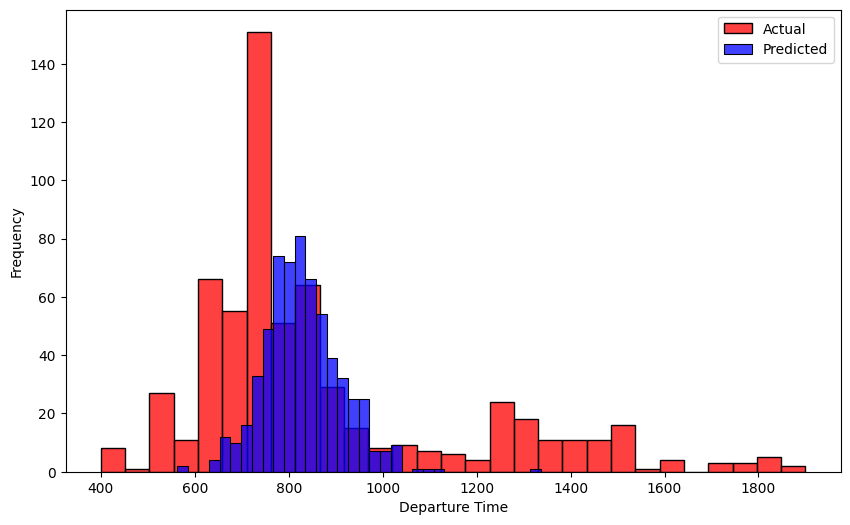

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_test_task1 to a numpy array if it is a Pandas Series
y_test_task1 = y_test_task1.values if isinstance(y_test_task1, pd.Series) else y_test_task1

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the frequency curves
sns.histplot(y_test_task1, label='Actual', color='red')
sns.histplot(y_pred_task1_converted, label='Predicted', color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Departure Time')
plt.ylabel('Frequency')
#plt.title('Histogram of Actual vs. Predicted Departure Time (SO-NN)')
plt.legend()

# Show the plot
plt.show()


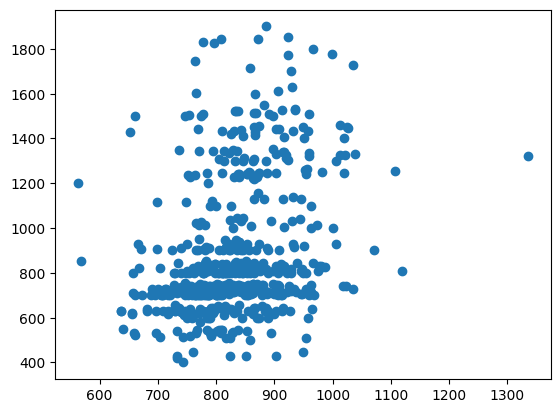

In [ ]:
plt.plot(y_pred_task1,y_test_task1,'o')

In [ ]:
# Assuming survival_function is a pandas DataFrame
first_column = survival_function_loglogistic.iloc[:, 0]
print(first_column)


400.0     0.976049
404.0     0.974491
405.0     0.974088
412.0     0.971126
418.0     0.968373
            ...   
1940.0    0.001431
1950.0    0.001384
1991.0    0.001209
2000.0    0.001174
2230.0    0.000579
Name: 718, Length: 475, dtype: float64


In [ ]:
import numpy as np
from scipy.interpolate import interp1d

# Assuming first_column is a pandas Series and its index is numeric or can be converted to numeric
values = first_column.values
indices = first_column.index.astype(float)  # Ensure the index is numeric

interp_func = interp1d(values, indices)

newarr = interp_func(0.5)
print(newarr)



707.8844940484634


887.8331673456315


In [ ]:
# Assuming first_column is a pandas Series
closest_index = (first_column - 0.5).abs().idxmin()
print(f"Index of the closest value to 0.5: {closest_index}")


Index of the closest value to 0.5: 881.0


In [ ]:
indices = first_column.index.astype(float)
indices

Index([ 400.0,  404.0,  405.0,  412.0,  418.0,  420.0,  429.0,  430.0,  431.0,
        434.0,
       ...
       1840.0, 1845.0, 1904.0, 1910.0, 1915.0, 1940.0, 1950.0, 1991.0, 2000.0,
       2230.0],
      dtype='float64', length=475)

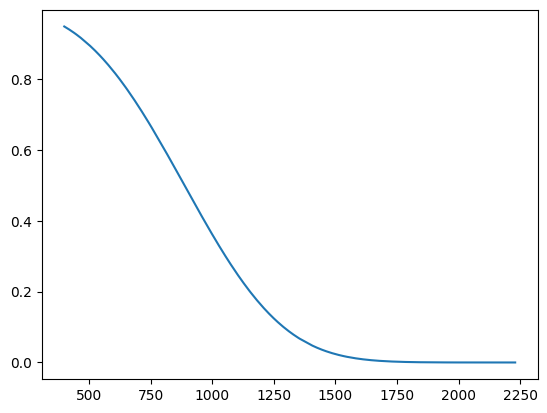

In [ ]:
plt.plot(indices,values)

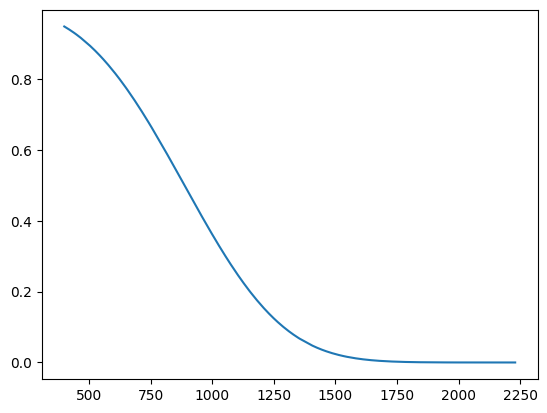

In [ ]:
plt.plot(first_column)

In [ ]:
first_column

400.0     0.948000
404.0     0.946355
405.0     0.945939
412.0     0.942966
418.0     0.940335
            ...   
1940.0    0.000193
1950.0    0.000167
1991.0    0.000091
2000.0    0.000080
2230.0    0.000002
Name: 1173, Length: 475, dtype: float64

### Running Time

In [ ]:
x_test['Gender'] = x_test['Gender'].replace(2, 0)


x_test.drop(columns=['BL_A','BS_SD','Biking_minutes','Driving_minutes','Biking_km','Walking_minutes','Gender','SW_A','Transit_km','HD_DIST'],inplace=True)



In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d


# Assuming x_test is already defined with 621 rows
rows_needed = 1000000
current_rows = len(x_test)

# Calculate the number of times to repeat the DataFrame
repeat_factor = rows_needed // current_rows + 1

# Repeat the DataFrame
x_test_expanded = pd.concat([x_test] * repeat_factor, ignore_index=True)

# Truncate to exactly 100,000 rows
x_test_expanded = x_test_expanded.iloc[:rows_needed]

print(f"Original number of rows: {current_rows}")
print(f"Number of rows after expansion: {len(x_test_expanded)}")


Original number of rows: 621
Number of rows after expansion: 1000000


In [ ]:
import time

In [ ]:
import time
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np

# Assuming LogLogistic_model and x_test are defined elsewhere

num_iterations = 10  # Number of times to run the code
elapsed_times = []

for _ in range(num_iterations):
    start = time.monotonic()

    # Replace this with your original code snippet
    survival_function_loglogistic = LogLogistic_model.predict_survival_function(x_test_expanded)


    end = time.monotonic()
    elapsed_time = end - start
    elapsed_times.append(elapsed_time)

average_runtime = np.mean(elapsed_times)
print(f"Average elapsed time over {num_iterations} iterations: {average_runtime:.2f} seconds")


Average elapsed time over 10 iterations: 20.22 seconds


# Multi-nomial Logit Model

## Task 2 (Travel Mode)

In [ ]:
y_train_task2_one_column = np.argmax(y_train_task2, axis=1)


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Fit the model
model = sm.MNLogit(y_train_task2_one_column, x_train)
result = model.fit()

# Print summary of results
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.853815
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 2480
Model:                        MNLogit   Df Residuals:                     2420
Method:                           MLE   Df Model:                           57
Date:                Tue, 02 Jul 2024   Pseudo R-squ.:                  0.3067
Time:                        20:14:15   Log-Likelihood:                -2117.5
converged:                       True   LL-Null:                       -3054.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Driving_minutes           -0.2311      0.373     -0.619      0.536      -0.963     

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define and train the model
model = make_pipeline(LogisticRegression(multi_class='multinomial', solver='lbfgs'))
model.fit(x_train, y_train_task2_one_column)

# Predict
y_pred = model.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Access coefficients
coefficients = model.named_steps['logisticregression'].coef_

print("Coefficients:")
print(coefficients)


Coefficients:
[[-0.41228279  0.59028074  2.06163218 -0.76145769 -0.09008809  0.19233601
   0.08211522  0.32474818  0.297755   -0.03716773 -0.0401848   0.31333892
   0.03145473  0.09543715  0.32619757  1.70292254 -0.2822436   0.56940765
   0.21509566  0.95424662]
 [-0.57404728  0.7877658   1.1032582  -0.56713499  0.55804689 -0.05576945
   0.10686655 -0.08357195  0.28110821  0.09171568  0.08508607  0.23935557
  -0.05242928  0.33030229  0.01395146  0.08472627 -0.40637959  0.4878115
   0.03165442  0.09441388]
 [ 1.69096408 -1.50852869 -2.25279832  1.45740113  0.78770584  0.42473974
   0.32394807  0.09051479 -0.49810422 -0.3438325  -0.01290721  0.18016693
  -0.00812171 -0.24271788 -0.37239528 -1.58842868 -0.24764937 -0.15879094
  -0.29322608 -0.82436488]
 [-0.70463401  0.13048215 -0.91209206 -0.12880845 -1.25566464 -0.5613063
  -0.51292984 -0.33169101 -0.08075899  0.28928455 -0.03199406 -0.73286141
   0.02909627 -0.18302157  0.03224625 -0.19922013  0.93627257 -0.89842821
   0.046476   -0.22

In [ ]:
y_test_task2_one_column = np.argmax(y_test_task2, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate accuracy
accuracy = accuracy_score(y_test_task2_one_column, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6843800322061192


In [ ]:
y_true_classes2 = y_test_task2_one_column
y_pred_classes2 = y_pred

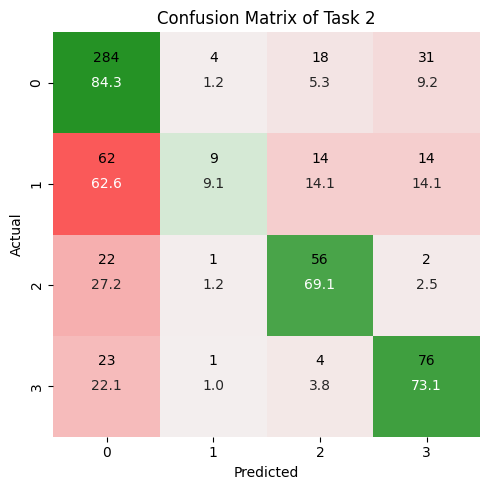

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(5, 5))  # Change to 1 subplot

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs, conf_matrix2, 'Confusion Matrix of Task 2')

plt.tight_layout()
plt.show()


# Problem Transformation

## Classification Chains

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Model
from keras.layers import Input, Dense, Concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.metrics import Precision, Recall
import numpy as np
import keras

# Define the shared input layer
input_layer = Input(shape=(input_data.shape[1],))

# Define the shared hidden layers
shared_hidden_layer_1 = Dense(200, activation='relu')(input_layer)
shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)
shared_hidden_layer_1 = Dense(200, activation='relu')(shared_hidden_layer_1)
shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)
shared_hidden_layer_1 = Dense(200, activation='relu')(shared_hidden_layer_1)
shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)

# Define the Outputs
task2_output = Dense(4, activation="softmax", name='task2_output')(shared_hidden_layer_1)


# Concatenate input_layer with task1_output
new_input_layer = Concatenate()([input_layer, task2_output])

shared_hidden_layer_2 = Dense(200, activation='relu')(new_input_layer)
shared_hidden_layer_2 = BatchNormalization()(shared_hidden_layer_2)
shared_hidden_layer_2 = Dense(200, activation='relu')(shared_hidden_layer_2)
shared_hidden_layer_2 = BatchNormalization()(shared_hidden_layer_2)
shared_hidden_layer_2 = Dense(200, activation='relu')(shared_hidden_layer_2)
shared_hidden_layer_2 = BatchNormalization()(shared_hidden_layer_2)

task1_output = Dense(5, activation="softmax", name='task1_output')(shared_hidden_layer_2)

# Define the model with multiple outputs
model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

# Define a specific learning rate
learning_rate = 3e-4

# Instantiate an optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)


# Compile the model
model.compile(optimizer=optimizer,
            loss = keras.losses.CategoricalFocalCrossentropy(), #['categorical_crossentropy','categorical_crossentropy']
            metrics= ['accuracy'])



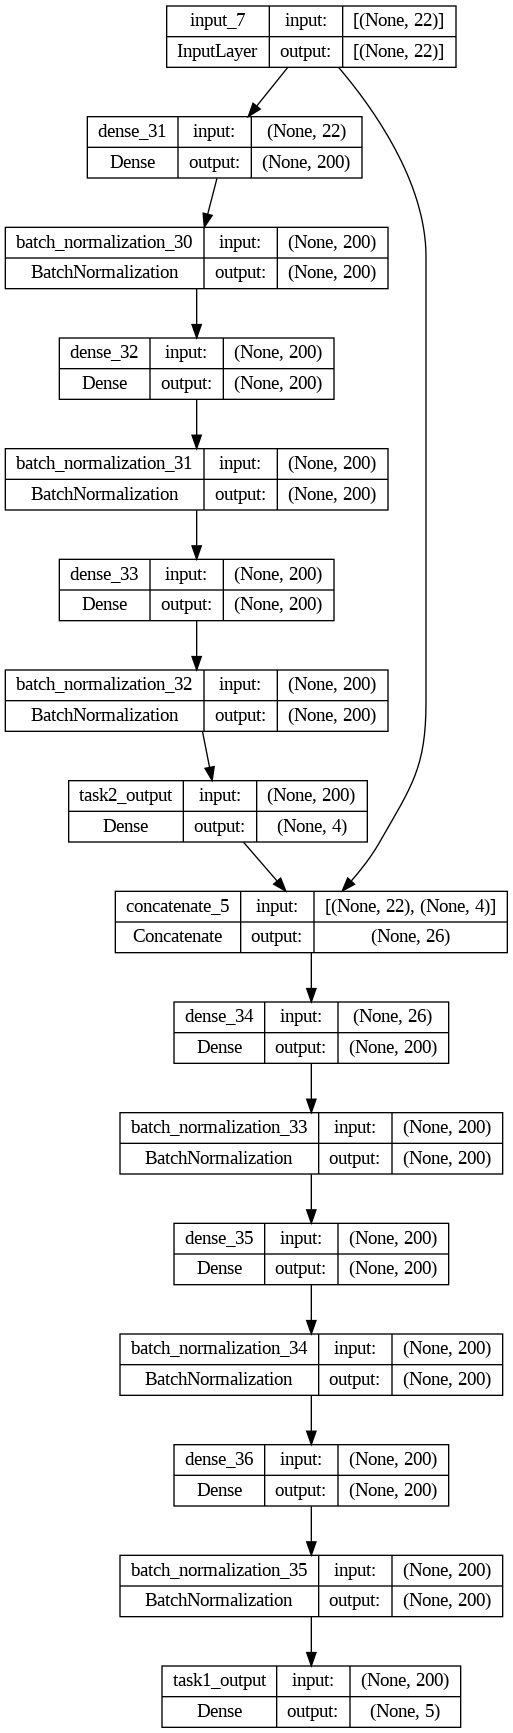

In [ ]:
import keras
keras.utils.plot_model(
    model, "ticket_classifier_with_shape_info.png", show_shapes=True)


In [ ]:
from keras.callbacks import EarlyStopping
import tensorflow as tf

'''
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model on the multi-task data with early stopping
history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=1000, batch_size=32, validation_split=0.20, callbacks=[early_stopping],verbose = 1)
'''

history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=120, batch_size=32, validation_split=0.20)


Epoch 1/120
98/98 [==============================] - 7s 19ms/step - loss: 0.4697 - task1_output_loss: 0.2729 - task2_output_loss: 0.1968 - task1_output_accuracy: 0.3594 - task2_output_accuracy: 0.4927 - val_loss: 0.3366 - val_task1_output_loss: 0.2043 - val_task2_output_loss: 0.1323 - val_task1_output_accuracy: 0.5191 - val_task2_output_accuracy: 0.6046
Epoch 2/120
98/98 [==============================] - 1s 12ms/step - loss: 0.2603 - task1_output_loss: 0.1605 - task2_output_loss: 0.0998 - task1_output_accuracy: 0.5609 - task2_output_accuracy: 0.6881 - val_loss: 0.2850 - val_task1_output_loss: 0.1701 - val_task2_output_loss: 0.1149 - val_task1_output_accuracy: 0.5829 - val_task2_output_accuracy: 0.6735
Epoch 3/120
98/98 [==============================] - 1s 15ms/step - loss: 0.1945 - task1_output_loss: 0.1224 - task2_output_loss: 0.0721 - task1_output_accuracy: 0.6617 - task2_output_accuracy: 0.7675 - val_loss: 0.2271 - val_task1_output_loss: 0.1337 - val_task2_output_loss: 0.0934 - va

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 1
y_pred_classes1 = np.argmax(y_pred_task1, axis=1)
y_true_classes1 = np.argmax(y_test_task1, axis=1)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)

31/31 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy1 = accuracy_score(y_true_classes1, y_pred_classes1)
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss1 = cross_entropy_loss(y_pred_task1, y_test_task1)
loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision1 = precision_score(y_true_classes1, y_pred_classes1, average='weighted')
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall1 = recall_score(y_true_classes1, y_pred_classes1, average='weighted')
recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score1 = f1_score(y_true_classes1, y_pred_classes1, average='weighted')
f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 1", "Task 2"],
    "Overall Accuracy": [overall_accuracy1, overall_accuracy2],
    "Cross-Entropy Loss": [loss1, loss2],
    "Precision": [precision1, precision2],
    "Recall": [recall1, recall2],
    "F1 Score": [f1_score1, f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision   Recall  F1 Score
0  Task 1           0.75841            0.757024   0.760080  0.75841  0.758670
1  Task 2           0.85423            0.481969   0.852776  0.85423  0.853402

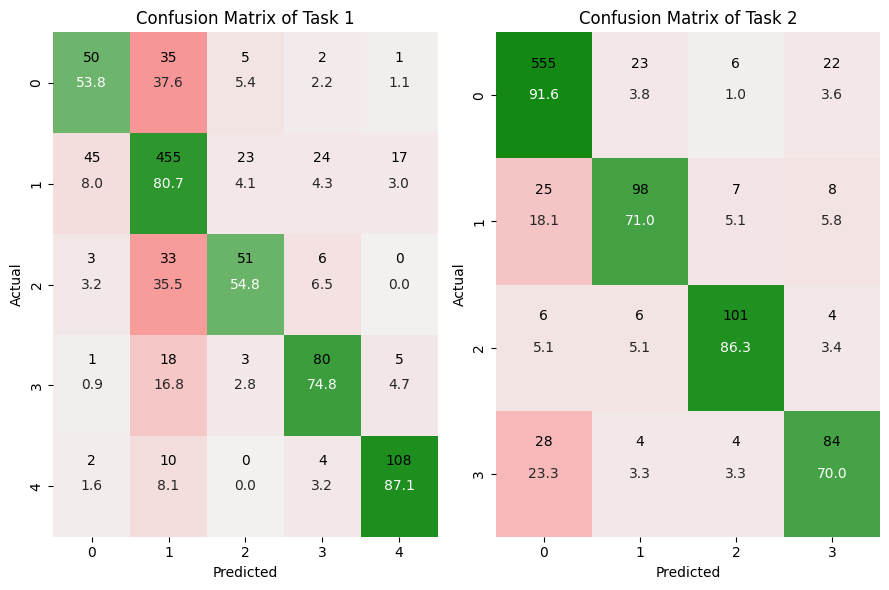

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 6))

# Confusion matrix for Task 1
conf_matrix1 = calculate_confusion_matrix(y_true_classes1, y_pred_classes1)
plot_confusion_matrix(axs[0], conf_matrix1, 'Confusion Matrix of Task 1')

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs[1], conf_matrix2, 'Confusion Matrix of Task 2')

plt.tight_layout()
plt.show()


## Stacked single-target (SST)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Model
from keras.layers import Input, Dense, Concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.metrics import Precision, Recall
import numpy as np
import keras

# Define the shared input layer
input_layer = Input(shape=(input_data.shape[1],))

# Define the shared hidden layers
shared_hidden_layer_1 = Dense(200, activation='relu')(input_layer)
shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)
shared_hidden_layer_1 = Dense(200, activation='relu')(shared_hidden_layer_1)
shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)
shared_hidden_layer_1 = Dense(200, activation='relu')(shared_hidden_layer_1)
shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)

# Define the Outputs
task1_output_phase_one = Dense(5, activation="softmax", name='task1_output_phase_one')(shared_hidden_layer_1)
task2_output_phase_one = Dense(4, activation="softmax", name='task2_output_phase_one')(shared_hidden_layer_1)

# Concatenate input_layer with task1_output
new_input_layer = Concatenate()([input_layer, task1_output_phase_one, task2_output_phase_one])

shared_hidden_layer_2 = Dense(200, activation='relu')(new_input_layer)
shared_hidden_layer_2 = BatchNormalization()(shared_hidden_layer_2)
shared_hidden_layer_2 = Dense(200, activation='relu')(shared_hidden_layer_2)
shared_hidden_layer_2 = BatchNormalization()(shared_hidden_layer_2)
shared_hidden_layer_2 = Dense(200, activation='relu')(shared_hidden_layer_2)
shared_hidden_layer_2 = BatchNormalization()(shared_hidden_layer_2)

task1_output = Dense(5, activation="softmax", name='task1_output')(shared_hidden_layer_2)
task2_output = Dense(4, activation="softmax", name='task2_output')(shared_hidden_layer_2)



# Define the model with multiple outputs
model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

# Define a specific learning rate
learning_rate = 3e-4

# Instantiate an optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)


# Compile the model
model.compile(optimizer=optimizer,
            loss = keras.losses.CategoricalFocalCrossentropy(), #['categorical_crossentropy','categorical_crossentropy']
            metrics= ['accuracy'])



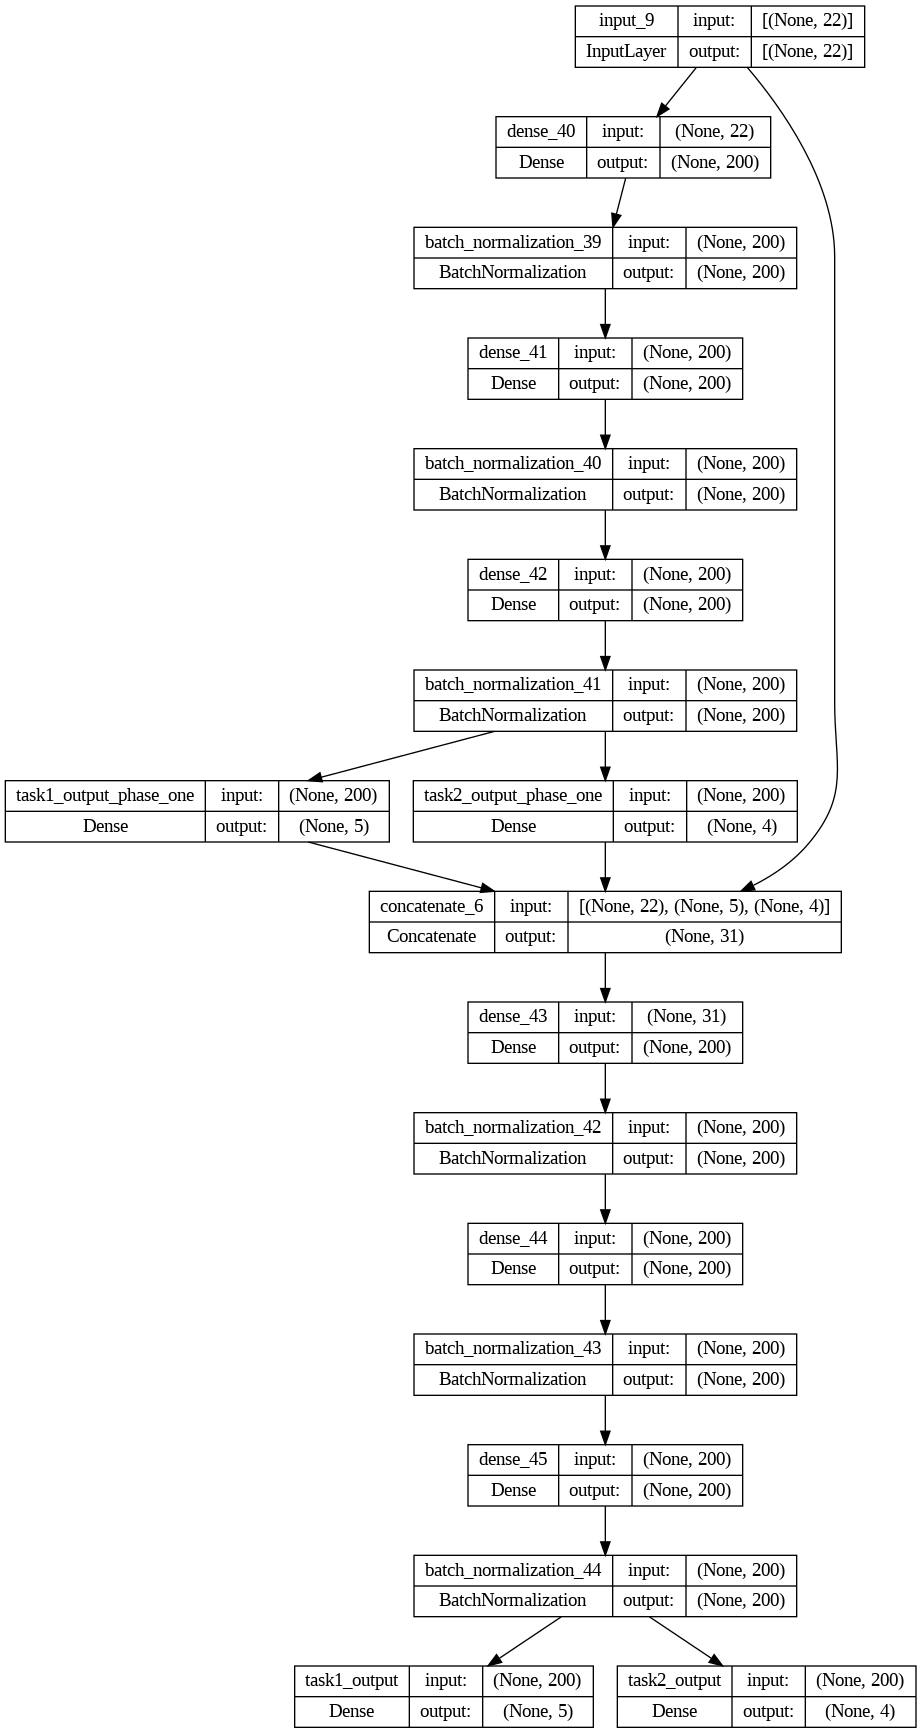

In [ ]:
import keras
keras.utils.plot_model(
    model, "ticket_classifier_with_shape_info.png", show_shapes=True)


In [ ]:
from keras.callbacks import EarlyStopping
import tensorflow as tf

'''
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model on the multi-task data with early stopping
history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=1000, batch_size=32, validation_split=0.20, callbacks=[early_stopping],verbose = 1)
'''

history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=120, batch_size=32, validation_split=0.20)


Epoch 1/120
98/98 [==============================] - 10s 21ms/step - loss: 0.4847 - task1_output_loss: 0.2922 - task2_output_loss: 0.1925 - task1_output_accuracy: 0.3476 - task2_output_accuracy: 0.5051 - val_loss: 0.3453 - val_task1_output_loss: 0.2028 - val_task2_output_loss: 0.1425 - val_task1_output_accuracy: 0.5319 - val_task2_output_accuracy: 0.6288
Epoch 2/120
98/98 [==============================] - 1s 13ms/step - loss: 0.2778 - task1_output_loss: 0.1757 - task2_output_loss: 0.1020 - task1_output_accuracy: 0.5287 - task2_output_accuracy: 0.6929 - val_loss: 0.2784 - val_task1_output_loss: 0.1686 - val_task2_output_loss: 0.1098 - val_task1_output_accuracy: 0.5829 - val_task2_output_accuracy: 0.6760
Epoch 3/120
98/98 [==============================] - 2s 21ms/step - loss: 0.2125 - task1_output_loss: 0.1316 - task2_output_loss: 0.0808 - task1_output_accuracy: 0.6327 - task2_output_accuracy: 0.7557 - val_loss: 0.2353 - val_task1_output_loss: 0.1436 - val_task2_output_loss: 0.0917 - v

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 1
y_pred_classes1 = np.argmax(y_pred_task1, axis=1)
y_true_classes1 = np.argmax(y_test_task1, axis=1)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)

31/31 [==============================] - 1s 5ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy1 = accuracy_score(y_true_classes1, y_pred_classes1)
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss1 = cross_entropy_loss(y_pred_task1, y_test_task1)
loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision1 = precision_score(y_true_classes1, y_pred_classes1, average='weighted')
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall1 = recall_score(y_true_classes1, y_pred_classes1, average='weighted')
recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score1 = f1_score(y_true_classes1, y_pred_classes1, average='weighted')
f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 1", "Task 2"],
    "Overall Accuracy": [overall_accuracy1, overall_accuracy2],
    "Cross-Entropy Loss": [loss1, loss2],
    "Precision": [precision1, precision2],
    "Recall": [recall1, recall2],
    "F1 Score": [f1_score1, f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 1          0.778797            0.730736   0.778393  0.778797  0.777841
1  Task 2          0.853211            0.452479   0.851070  0.853211  0.851692

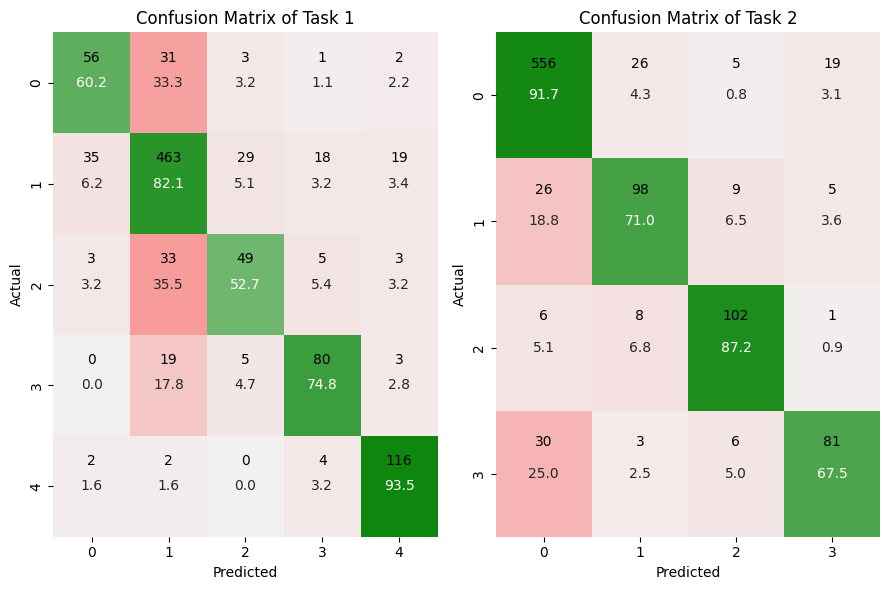

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 6))

# Confusion matrix for Task 1
conf_matrix1 = calculate_confusion_matrix(y_true_classes1, y_pred_classes1)
plot_confusion_matrix(axs[0], conf_matrix1, 'Confusion Matrix of Task 1')

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs[1], conf_matrix2, 'Confusion Matrix of Task 2')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Model
from keras.layers import Input, Dense, Concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.metrics import Precision, Recall
import numpy as np
import keras

# Define the shared input layer
input_layer = Input(shape=(input_data.shape[1],))

# Define the shared hidden layers
shared_hidden_layer_1 = Dense(200, activation='relu')(input_layer)
shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)
shared_hidden_layer_1 = Dense(200, activation='relu')(shared_hidden_layer_1)
shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)
shared_hidden_layer_1 = Dense(200, activation='relu')(shared_hidden_layer_1)
shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)

# Define the Outputs
task1_output = Dense(5, activation="softmax", name='task1_output')(shared_hidden_layer_1)
task2_output = Dense(4, activation="softmax", name='task2_output')(shared_hidden_layer_1)

# Define the model with multiple outputs
model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

# Define a specific learning rate
learning_rate = 3e-4

# Instantiate an optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)


# Compile the model
model.compile(optimizer=optimizer,
            loss = keras.losses.CategoricalFocalCrossentropy(), #['categorical_crossentropy','categorical_crossentropy']
            metrics= ['accuracy'])



# MTL - Resindual Connection

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Model
from keras.layers import Input, Dense, Concatenate, Dropout, BatchNormalization, Add
from keras.optimizers import Adam
from keras.metrics import Precision, Recall
import numpy as np
import keras

# Define the shared input layer
input_layer = Input(shape=(input_data.shape[1],))

# Define the shared hidden layers
shared_hidden_layer_1 = Dense(200, activation='relu')(input_layer)
shared_hidden_layer_1 = BatchNormalization()(shared_hidden_layer_1)

shared_hidden_layer_2 = Dense(200, activation='relu')(shared_hidden_layer_1)
shared_hidden_layer_2 = BatchNormalization()(shared_hidden_layer_2)

# Residual connection
shared_hidden_layer_3 = Dense(200, activation='relu')(shared_hidden_layer_2)
shared_hidden_layer_3 = BatchNormalization()(shared_hidden_layer_3)
shared_hidden_layer_3 = Add()([shared_hidden_layer_2, shared_hidden_layer_3])  # Residual connection

# Define the Outputs
task1_output = Dense(5, activation="softmax", name='task1_output')(shared_hidden_layer_3)
task2_output = Dense(4, activation="softmax", name='task2_output')(shared_hidden_layer_3)

# Define the model with multiple outputs
model = Model(inputs=input_layer, outputs=[task1_output, task2_output])

# Define a specific learning rate
learning_rate = 3e-4

# Instantiate an optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer,
            loss = keras.losses.CategoricalFocalCrossentropy(),
            metrics= ['accuracy'])


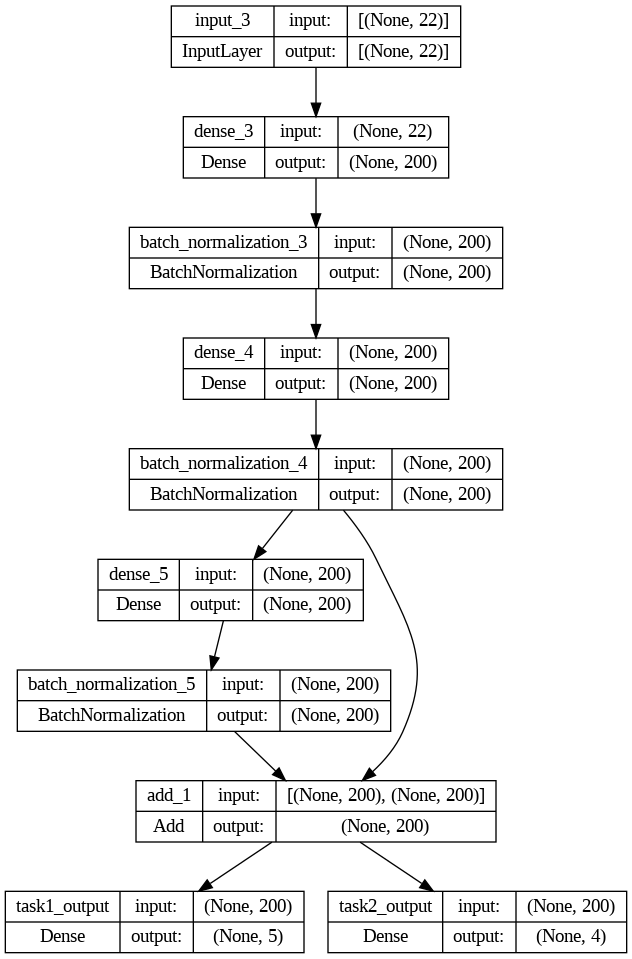

In [ ]:
import keras
keras.utils.plot_model(
    model, "ticket_classifier_with_shape_info.png", show_shapes=True)


In [ ]:
from keras.callbacks import EarlyStopping
import tensorflow as tf

'''
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model on the multi-task data with early stopping
history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=1000, batch_size=32, validation_split=0.20, callbacks=[early_stopping],verbose = 1)
'''

history = model.fit(x_train, {'task1_output': y_train_task1, 'task2_output': y_train_task2},
                    epochs=120, batch_size=32, validation_split=0.20)


Epoch 1/120
98/98 [==============================] - 5s 15ms/step - loss: 0.5482 - task1_output_loss: 0.3207 - task2_output_loss: 0.2275 - task1_output_accuracy: 0.3300 - task2_output_accuracy: 0.4853 - val_loss: 0.3383 - val_task1_output_loss: 0.1962 - val_task2_output_loss: 0.1421 - val_task1_output_accuracy: 0.5344 - val_task2_output_accuracy: 0.5944
Epoch 2/120
98/98 [==============================] - 1s 9ms/step - loss: 0.2898 - task1_output_loss: 0.1837 - task2_output_loss: 0.1061 - task1_output_accuracy: 0.5223 - task2_output_accuracy: 0.6843 - val_loss: 0.2957 - val_task1_output_loss: 0.1756 - val_task2_output_loss: 0.1201 - val_task1_output_accuracy: 0.5510 - val_task2_output_accuracy: 0.6378
Epoch 3/120
98/98 [==============================] - 1s 11ms/step - loss: 0.2207 - task1_output_loss: 0.1418 - task2_output_loss: 0.0789 - task1_output_accuracy: 0.6205 - task2_output_accuracy: 0.7462 - val_loss: 0.2399 - val_task1_output_loss: 0.1467 - val_task2_output_loss: 0.0932 - val

In [ ]:
# Evaluate the model on the testing data
y_pred_task1, y_pred_task2 = model.predict(x_test)

# Convert predicted probabilities to labels - Task 1
y_pred_classes1 = np.argmax(y_pred_task1, axis=1)
y_true_classes1 = np.argmax(y_test_task1, axis=1)

# Convert predicted probabilities to labels - Task 2
y_pred_classes2 = np.argmax(y_pred_task2, axis=1)
y_true_classes2 = np.argmax(y_test_task2, axis=1)

31/31 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy1 = accuracy_score(y_true_classes1, y_pred_classes1)
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss1 = cross_entropy_loss(y_pred_task1, y_test_task1)
loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision1 = precision_score(y_true_classes1, y_pred_classes1, average='weighted')
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall1 = recall_score(y_true_classes1, y_pred_classes1, average='weighted')
recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score1 = f1_score(y_true_classes1, y_pred_classes1, average='weighted')
f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 1", "Task 2"],
    "Overall Accuracy": [overall_accuracy1, overall_accuracy2],
    "Cross-Entropy Loss": [loss1, loss2],
    "Precision": [precision1, precision2],
    "Recall": [recall1, recall2],
    "F1 Score": [f1_score1, f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 1          0.771662            0.731481   0.774993  0.771662  0.772391
1  Task 2          0.852192            0.509006   0.851350  0.852192  0.851391

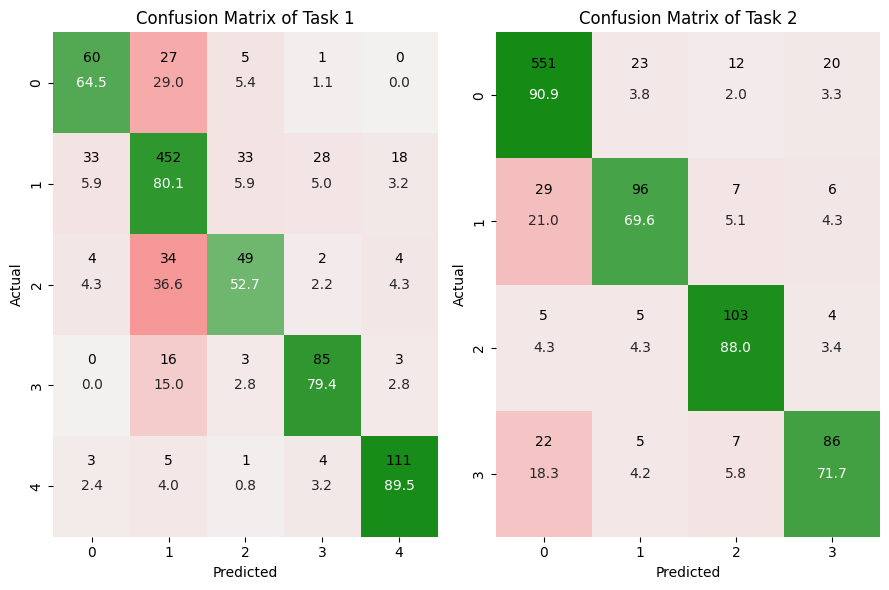

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 6))

# Confusion matrix for Task 1
conf_matrix1 = calculate_confusion_matrix(y_true_classes1, y_pred_classes1)
plot_confusion_matrix(axs[0], conf_matrix1, 'Confusion Matrix of Task 1')

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs[1], conf_matrix2, 'Confusion Matrix of Task 2')

plt.tight_layout()
plt.show()


# Multi-task RF

In [ ]:
!pip install https://github.com/systemallica/morfist/releases/download/0.4.0/decision_tree_morfist-0.4.0-py3-none-any.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 7.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.1
    Uninstalling llvmlite-0.41.1:
      Successfully uninstalled llvmlite-0.41.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1


In [ ]:
from morfist import MixedRandomForest

mrf = MixedRandomForest(
    n_estimators=10,
    min_samples_leaf=10,
    classification_targets=[0,1]
)

In [ ]:
from morfist import MixedRandomForest

mrf = MixedRandomForest(
    classification_targets=[0,1]
)

In [ ]:
import pandas as pd

# Assuming y_train_task1 and y_train_task2 are pandas Series
y_train = pd.concat([y_train_task1, y_train_task2], axis=1)


In [ ]:
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

x_test_np = x_test.to_numpy()

In [ ]:
mlt_rf = mrf.fit(x_train_np, y_train_np)

mlt_rf_prediction = mrf.predict(x_test_np)

In [ ]:
# Convert w to a pandas Series
y_pred_classes1 = pd.Series(mlt_rf_prediction[:,0])
# Convert y_test_task1 to a pandas Series if it's not already
y_true_classes1 = pd.Series(y_test_task1)

# Convert w to a pandas Series
y_pred_classes2 = pd.Series(mlt_rf_prediction[:,1])
# Convert y_test_task1 to a pandas Series if it's not already
y_true_classes2 = pd.Series(y_test_task2)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy1 = accuracy_score(y_true_classes1, y_pred_classes1)
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

#loss1 = cross_entropy_loss(y_pred_task1, y_test_task1)
#loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision1 = precision_score(y_true_classes1, y_pred_classes1, average='weighted')
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall1 = recall_score(y_true_classes1, y_pred_classes1, average='weighted')
recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score1 = f1_score(y_true_classes1, y_pred_classes1, average='weighted')
f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 1", "Task 2"],
    "Overall Accuracy": [overall_accuracy1, overall_accuracy2],
    #"Cross-Entropy Loss": [loss1, loss2],
    "Precision": [precision1, precision2],
    "Recall": [recall1, recall2],
    "F1 Score": [f1_score1, f1_score2]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Precision    Recall  F1 Score
0  Task 1          0.614679   0.685138  0.614679  0.502114
1  Task 2          0.687054   0.763235  0.687054  0.598581

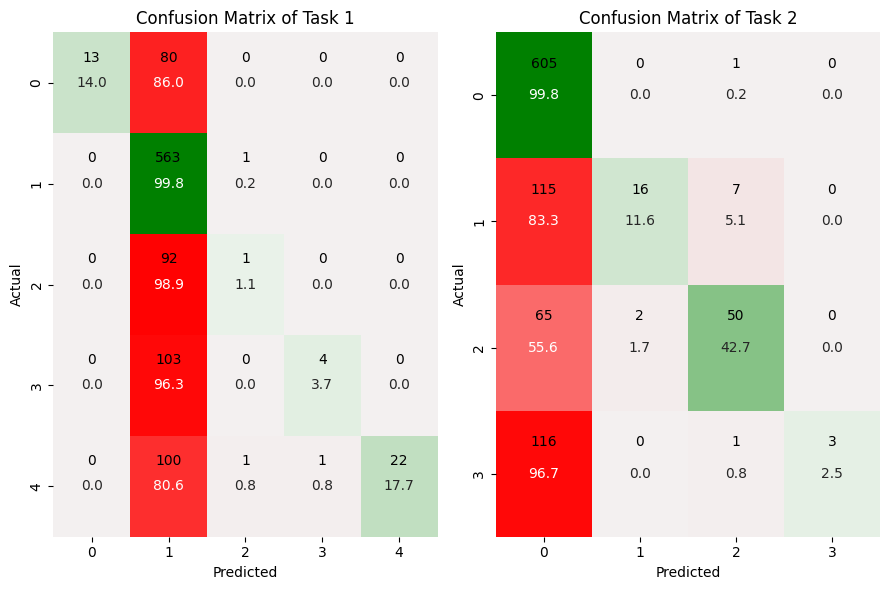

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 6))

# Confusion matrix for Task 1
conf_matrix1 = calculate_confusion_matrix(y_true_classes1, y_pred_classes1)
plot_confusion_matrix(axs[0], conf_matrix1, 'Confusion Matrix of Task 1')

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs[1], conf_matrix2, 'Confusion Matrix of Task 2')

plt.tight_layout()
plt.show()


# Single-output RF Model

## Task 1 (Departure Time)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier object
random_forest_model = RandomForestClassifier()

# Train the model using the training data
rf_mdl_task1 = random_forest_model.fit(x_train, y_train_task1)



In [ ]:
rf_mdl_task1_prediction = rf_mdl_task1.predict(x_test)

In [ ]:
# Convert w to a pandas Series
y_pred_classes1 = pd.Series(rf_mdl_task1_prediction)
# Convert y_test_task1 to a pandas Series if it's not already
y_true_classes1 = pd.Series(y_test_task1)


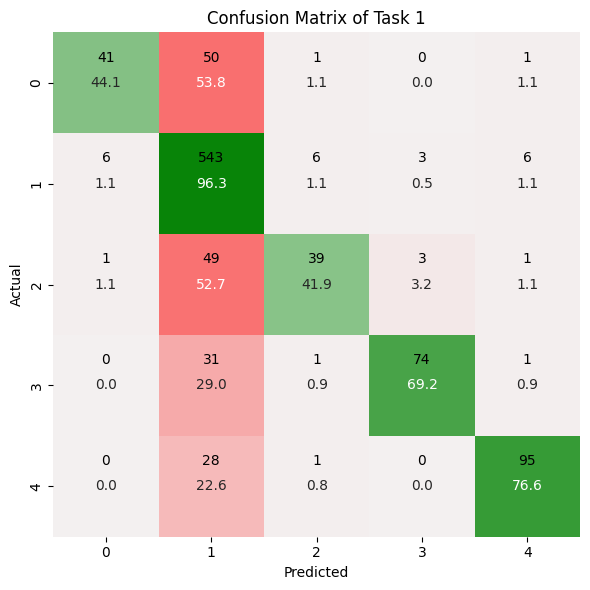

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 6))  # Change to 1 subplot

# Confusion matrix for Task 1
conf_matrix1 = calculate_confusion_matrix(y_true_classes1, y_pred_classes1)
plot_confusion_matrix(axs, conf_matrix1, 'Confusion Matrix of Task 1')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy1 = accuracy_score(y_true_classes1, y_pred_classes1)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

#loss1 = cross_entropy_loss(y_pred_task1, y_test_task1)

# Calculate precision, recall, and F1-score for each task
precision1 = precision_score(y_true_classes1, y_pred_classes1, average='weighted')

recall1 = recall_score(y_true_classes1, y_pred_classes1, average='weighted')

f1_score1 = f1_score(y_true_classes1, y_pred_classes1, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 1"],
    "Overall Accuracy": [overall_accuracy1],
#    "Cross-Entropy Loss": [loss1],
    "Precision": [precision1],
    "Recall": [recall1],
    "F1 Score": [f1_score1]
}

results_df = pd.DataFrame(data)
results_df


Task  Overall Accuracy  Precision    Recall  F1 Score
0  Task 1          0.807339   0.819697  0.807339  0.792806

In [ ]:
֫importances = rf_mdl_task1.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


SyntaxError: invalid character '֫' (U+05AB) (<ipython-input-14-ad87affaaeb5>, line 1)

In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.3 MB/s eta 0:00:00


In [ ]:
wmu = shap.KernelExplainer(rf_mdl_task1,x_test)

Provided model function fails when applied to the provided data set.


TypeError: 'RandomForestClassifier' object is not callable

In [ ]:
np.shape(shap_values)

(981, 22, 5)

In [ ]:
x_test

Gender       Age  PplNum  HHIncome  VehNum  BikeNum  MobilityChallenges  \
4871       1 -1.214513       2         4       3        0                   0   
3539       0 -0.786239       5         3       1        5                   0   
907        1 -0.337573       4         5       2        3                   0   
4354       0 -0.348225       2         4       2        2                   0   
3745       0 -1.110427       2         4       2        0                   0   
...      ...       ...     ...       ...     ...      ...                 ...   
1539       0 -0.414940       4         5       2        4                   0   
964        1 -0.956509       4         4       3        3                   0   
168        1  1.673970       2         3       2        2                   0   
3662       0 -1.100893       3         1       3        0                   0   
4667       0 -0.466137       3         2       1        3                   0   

      svDvrLic  Is_Full_Time_Employee?  Is_Student?  ...     REC_A     RES_A  \
4871         1                       1            0  ...  0.084683  0.166879   
3539         0                       1            0  ... -0.469998 -0.539918   
907          1                       1            0  ...  2.105639  2.618488   
4354         1                       1            0  ... -0.399956 -0.579875   
3745         1                       1            0  ... -0.283417 -0.260039   
...        ...                     ...          ...  ...       ...       ...   
1539         1                       1            0  ... -0.516495 -0.579875   
964          1                       1            0  ... -0.633034 -0.579875   
168          1                       0            0  ... -0.399956 -0.579875   
3662         1                       1            0  ...  1.548251  2.083929   
4667         1                       0            0  ... -0.296556 -0.278070   

          SW_A    LMIX_A     BS_SD    CBD_SD    REC_SD     UC_SD     CHD_M  \
4871  0.374725 -1.444244 -0.393258  0.276799 -0.329653 -0.710380  0.379476   
3539 -0.927591 -1.238785 -0.381855  1.888430 -0.374367  1.003240  0.673970   
907   1.944493  0.854719 -0.374377 -1.002416 -0.656101 -0.588486  0.838471   
4354  0.734473  0.342564 -0.392255 -0.655016 -0.753158 -0.371884  0.079517   
3745  0.018855 -0.096993 -0.358631 -0.208083 -0.776665 -0.691745  0.387862   
...        ...       ...       ...       ...       ...       ...       ...   
1539 -1.245357  0.436225 -0.320880 -0.847145  0.409809 -0.103398 -1.097986   
964   0.011960 -0.570056 -0.319402 -0.621111  1.292975  0.122172  0.126041   
168  -0.206922  0.616692  2.820416 -0.646283 -0.225059 -0.127772 -1.169863   
3662  0.396434  0.865383 -0.383598 -0.914893 -0.649060 -0.587190 -0.451211   
4667 -0.030974 -0.045743 -0.360783 -0.180579 -0.764934 -0.657325  4.158355   

         THD_M  
4871  0.481916  
3539  0.472181  
907   0.190458  
4354 -0.253115  
3745  1.233096  
...        ...  
1539 -0.757176  
964   0.190458  
168  -0.816838  
3662 -0.561157  
4667  2.394026  

[981 rows x 22 columns]

In [ ]:
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf_mdl_task1)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(x_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], x_test)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
explainer = shap.Explainer(rf_mdl_task1)

shap_values_v02 = explainer(x_test)

print(np.shape(shap_values_v02))

(981, 22, 5)


In [ ]:
shap_values[:, :, 0]

array([[ 0.0136089 , -0.02638623, -0.00026318, ..., -0.01667896,
         0.00680981,  0.0008023 ],
       [ 0.00312601,  0.00931227,  0.03906075, ...,  0.0644358 ,
        -0.00010685,  0.00313627],
       [ 0.0134315 , -0.0057964 ,  0.00238267, ..., -0.01898087,
        -0.00133211, -0.00092356],
       ...,
       [ 0.00916553,  0.01634196, -0.00225069, ..., -0.00346891,
         0.00400204, -0.00151819],
       [-0.00548679, -0.01345265,  0.00551832, ..., -0.00918149,
         0.00034261,  0.00050822],
       [-0.00370687,  0.00124174,  0.00339992, ..., -0.00727992,
         0.00400697, -0.00060756]])

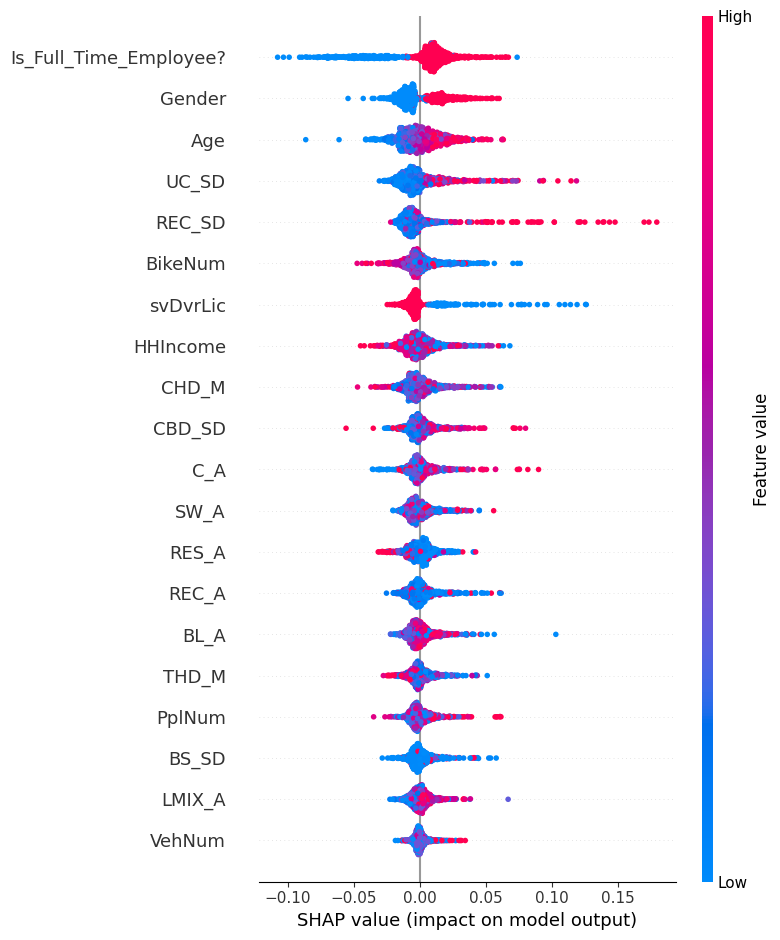

In [ ]:
shap.summary_plot(shap_values[:, :, 0], x_test)

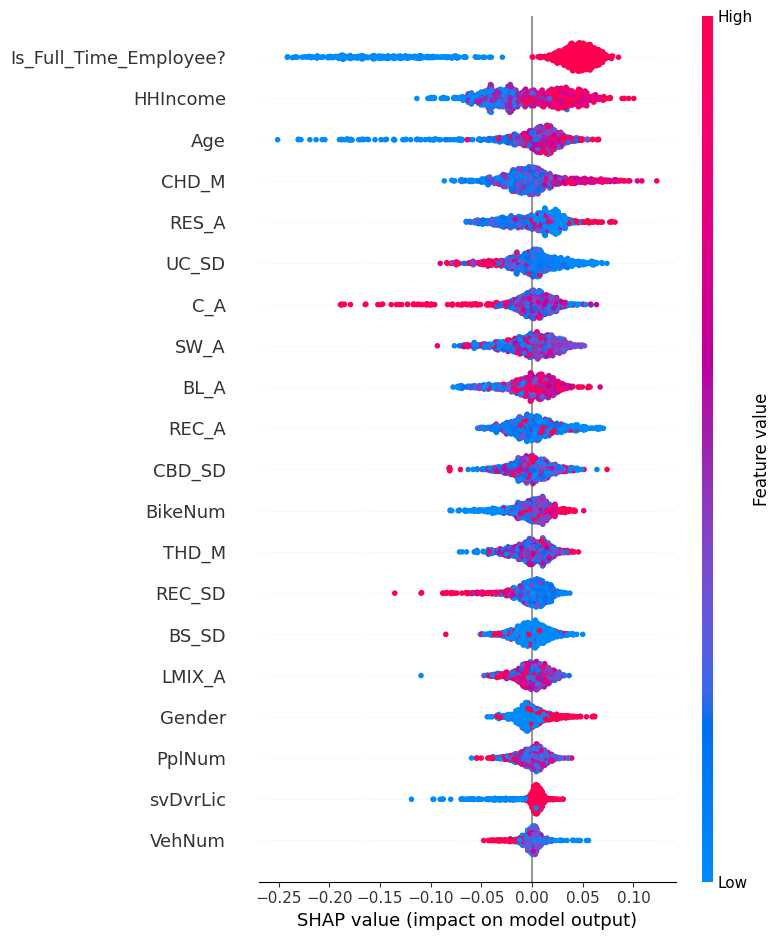

In [ ]:
shap.summary_plot(shap_values[:, :, 1], x_test)

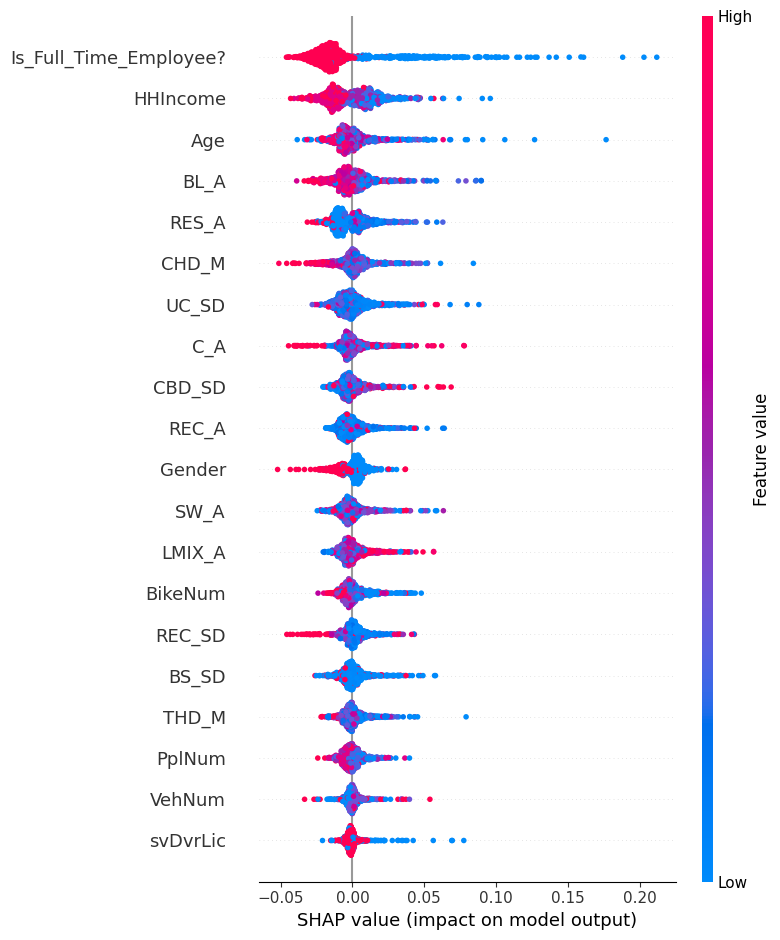

In [ ]:
shap.summary_plot(shap_values[:, :, 2], x_test)

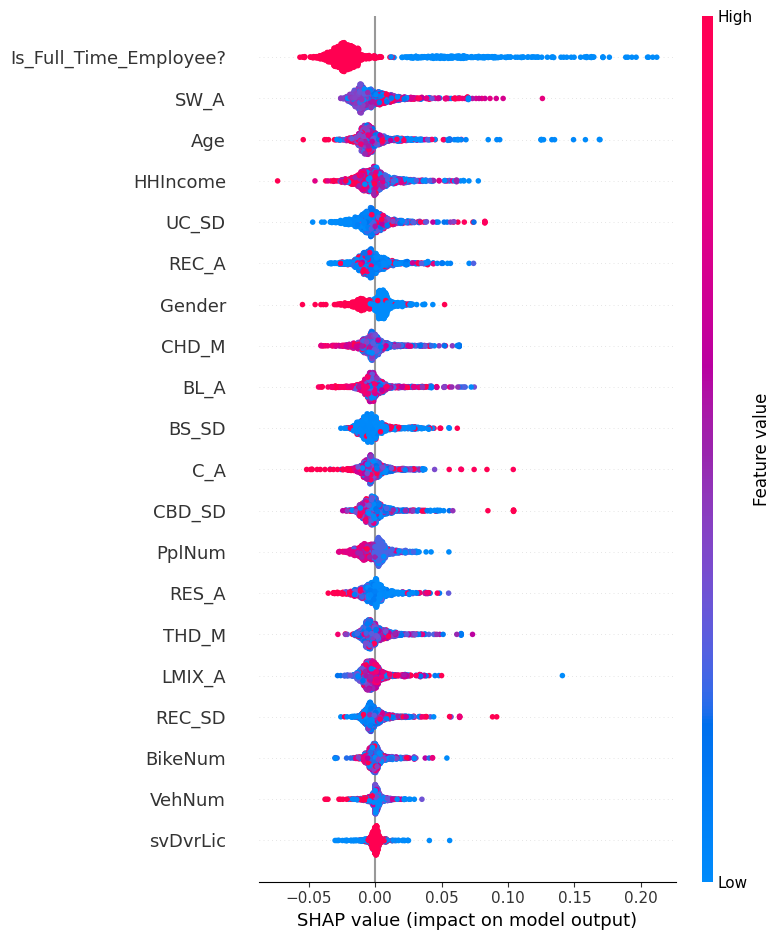

In [ ]:
shap.summary_plot(shap_values[:, :, 3], x_test)

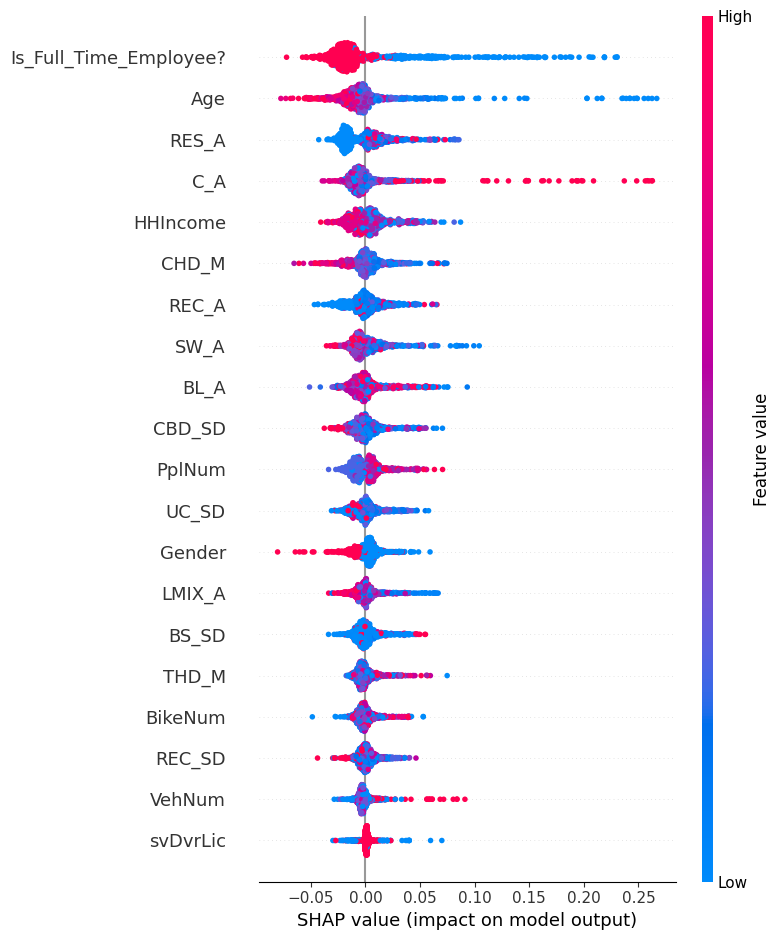

In [ ]:
shap.summary_plot(shap_values[:, :, 4], x_test)

In [ ]:
shap.plots.waterfall(shap_values[0, :, 0])

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

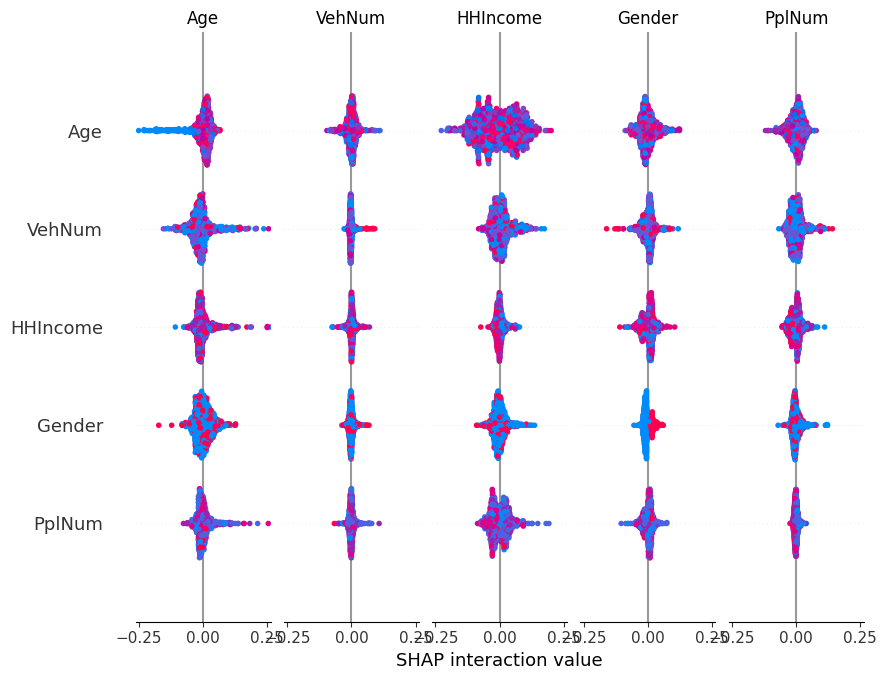

In [ ]:
shap_values = shap.TreeExplainer(rf_mdl_task1).shap_values(x_test)
shap.summary_plot(shap_values, x_test)


In [ ]:
import shap

# compute SHAP values
explainer = shap.TreeExplainer(rf_mdl_task1)
shap_values = explainer.shap_values(x_train.iloc[:101, :])


In [ ]:
import shap

# Create explainer
explainer = shap.Explainer(rf_mdl_task1, x_train)

# Generate SHAP values for a specific instance (e.g., the first instance)
shap_values = explainer.shap_values(x_train.iloc[0])

# Visualize SHAP values for each class separately
for class_index in range(len(shap_values)):
    shap.summary_plot(shap_values[class_index], features=x_train.iloc[0], title=f"Class {class_index} SHAP Summary Plot")


AssertionError: Summary plots need a matrix of shap_values, not a vector.

In [ ]:
shap.summary_plot(shap_values[1], x_train.values, feature_names = x_train.columns)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

AssertionError: Feature and SHAP matrices must have the same number of rows!

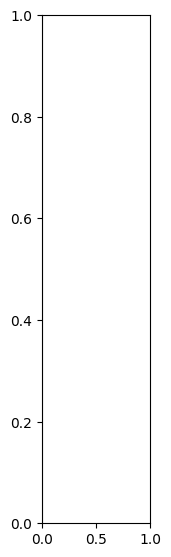

In [ ]:
shap.summary_plot(shap_values, x_train.values, plot_type="bar")#, class_names= class_names, feature_names = X.columns)


 99%|===================| 498/505 [01:10<00:00]       

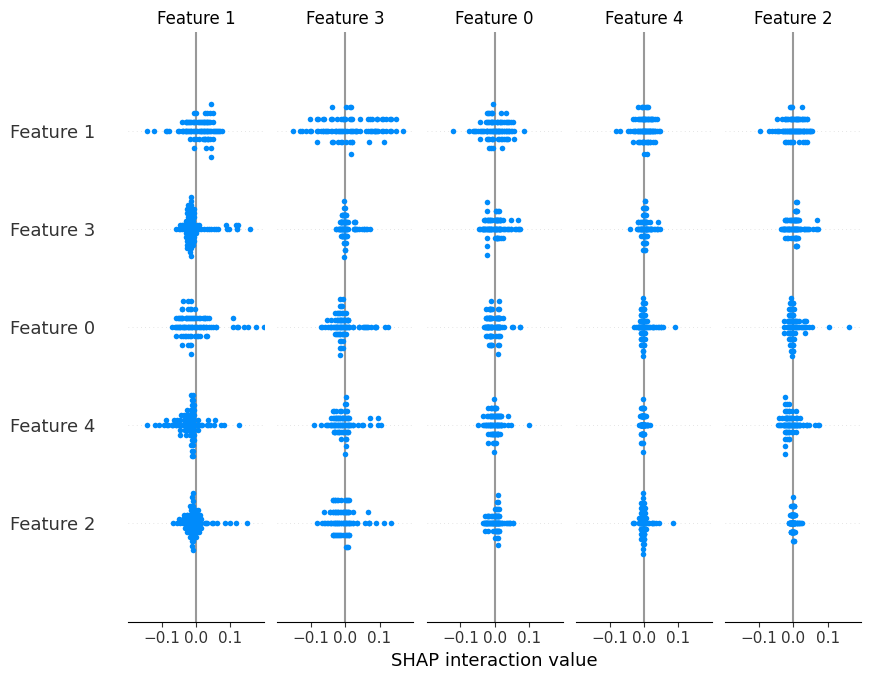

In [ ]:
import shap

explainer = shap.Explainer(random_forest_model, x_train)
shap_values = explainer.shap_values(x_train.iloc[:101, :])
shap.summary_plot(shap_values)#, features=x_train[0])

In [ ]:
?x_train

## Task 2 (Travel Mode)

In [ ]:
pip install biogeme

  Obtaining dependency information for biogeme from https://files.pythonhosted.org/packages/ec/81/07a36f8c33bf58c9f07b400460265b2c6268a4f5b2741e341ebfcf009add/biogeme-3.2.13-py3-none-any.whl.metadata
  Obtaining dependency information for tomlkit>=0.11.5 from https://files.pythonhosted.org/packages/fd/7c/b753bf603852cab0a660da6e81f4ea5d2ca0f0b2b4870766d7aa9bceb7a2/tomlkit-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for cythonbiogeme==1.0.2 from https://files.pythonhosted.org/packages/92/42/15d0c68eca170d555ee46e586cf6614649c88a68d39fbd8fb275280fe178/cythonbiogeme-1.0.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for biogeme-optimization==0.0.5 from https://files.pythonhosted.org/packages/65/5d/d84b08154a59b2bb0775ec3d459330c8e44c26e23a71c04abe503e735157/biogeme_optimization-0.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for cython>=0.29.16 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [ ]:
y_train_task2_MNL = np.argmax(y_train_task2, axis=1)
# Set pandas display option to show all columns
pd.set_option('display.max_columns', None)

NameError: name 'y_train_task2' is not defined

In [ ]:
# Concatenate x_train and y_train_task2_MNL
df_MNL = pd.concat([x_train.reset_index(drop=True), pd.DataFrame(y_train_task2_MNL,columns=['Mode_Choice'])], axis=1)


df_MNL.rename(columns={
    'Vehcile/PplNum': 'Vehicle_by_PplNum',
    'Bike/PplNum': 'Bike_by_PplNum',
    'Is Full Time Empolyee?': 'FTE'
}, inplace=True)

df_MNL['Gender'] = df_MNL['Gender'].replace(2, 0)

print(df_MNL)

#x_test, y_test_task2


      Driving_minutes  Driving_km  Transit_minutes  Transit_km  \
0            0.976513    0.766901         0.489305   -0.005352   
1            0.099706   -0.066708        -0.217301   -0.177548   
2            1.160966    1.040154         0.236339   -0.001602   
3           -0.946062   -0.718921        -0.605579   -0.298837   
4            0.039451   -0.094555        -0.194141   -0.162365   
...               ...         ...              ...         ...   
2475        -0.737815   -0.659649        -0.531422   -0.283264   
2476        -0.596561   -0.459393        -0.469791   -0.255093   
2477         0.447514    0.233866        -0.350028   -0.172182   
2478        -0.258977   -0.243859         0.164599   -0.185184   
2479        -0.575680   -0.397659        -0.571768   -0.296596   

      Biking_minutes  Biking_km  Walking_minutes  Walking_km     BS_SD  \
0           0.529372   0.787833         0.776340    0.823838 -0.403488   
1          -0.154034  -0.093793        -0.058090   -0.04078

In [ ]:
import biogeme.database as db

database = db.Database('df_MNL', df_MNL)


In [ ]:
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta
from biogeme.expressions import Variable


# Definition of variables
Driving_minutes = Variable('Driving_minutes')
Driving_km = Variable('Driving_km')
Transit_minutes = Variable('Transit_minutes')
Transit_km = Variable('Transit_km')
Biking_minutes = Variable('Biking_minutes')
Biking_km = Variable('Biking_km')
Walking_minutes = Variable('Walking_minutes')
Walking_km = Variable('Walking_km')

BS_SD = Variable('BS_SD')
SW_A = Variable('SW_A')
BL_A = Variable('BL_A')
HD_DIST = Variable('HD_DIST')
LMIX_A = Variable('LMIX_A')
CBD_SD = Variable('CBD_SD')

HHIncome = Variable('HHIncome')

Vehicle_by_PplNum = Variable('Vehicle_by_PplNum')
Bike_by_PplNum = Variable('Bike_by_PplNum')

Gender = Variable('Gender')
Age = Variable('Age')
FTE = Variable('FTE')

Mode_Choice = Variable('Mode_Choice')


In [ ]:
# Parameters to be estimated
V_D = Beta('V_D', 0, None, None, 0)
V_AP = Beta('V_AP', 0, None, None, 0)
V_Transit = Beta('V_Transit', 0, None, None, 0)
V_AT = Beta('V_AT', 0, None, None, 0)

B_Driving_minutes = Beta('B_Driving_minutes', 0, None, None, 0)
B_Driving_km = Beta('B_Driving_km', 0, None, None, 0)
B_Transit_minutes = Beta('B_Transit_minutes', 0, None, None, 0)
B_Transit_km = Beta('B_Transit_km', 0, None, None, 0)
B_Biking_minutes = Beta('B_Biking_minutes', 0, None, None, 0)
B_Biking_km = Beta('B_Biking_km', 0, None, None, 0)

B_BS_SD = Beta('B_BS_SD', 0, None, None, 0)
B_SW_A = Beta('B_SW_A', 0, None, None, 0)
B_BL_A = Beta('B_BL_A', 0, None, None, 0)
B_HD_DIST = Beta('B_HD_DIST', 0, None, None, 0)
B_LMIX_A = Beta('B_LMIX_A', 0, None, None, 0)
B_CBD_SD = Beta('B_CBD_SD', 0, None, None, 0)
B_HHIncome = Beta('B_HHIncome', 0, None, None, 0)

B_Vehicle_by_PplNum = Beta('B_Vehicle_by_PplNum', 0, None, None, 0)
B_Bike_by_PplNum = Beta('B_Bike_by_PplNum', 0, None, None, 0)

B_Gender = Beta('B_Gender', 0, None, None, 0)

B_Age_Auto_Driver = Beta('B_Age_Auto_Driver', 0, None, None, 0)
B_Age_Auto_Passenger = Beta('B_Age_Auto_Passenger', 0, None, None, 0)
B_Age_Transit = Beta('B_Age_Transit', 0, None, None, 0)
B_Age_AT = Beta('B_Age_AT', 0, None, None, 0)

B_FTE = Beta('B_FTE', 0, None, None, 0)


In [ ]:
# Definition of the utility function
V1 = V_D + B_Driving_minutes * Driving_minutes + B_Driving_km * Driving_km + B_BS_SD* BS_SD + B_SW_A * SW_A +\
B_BL_A * BL_A + B_HD_DIST * HD_DIST + B_LMIX_A * LMIX_A + B_CBD_SD * CBD_SD + B_HHIncome * HHIncome +\
B_Gender * Gender + B_Age * Age + B_Vehicle_by_PplNum * Vehicle_by_PplNum + B_Bike_by_PplNum * Bike_by_PplNum + B_FTE * FTE


V2 = V_AP + B_Driving_minutes * Driving_minutes + B_Driving_km * Driving_km + B_BS_SD* BS_SD + B_SW_A * SW_A +\
B_BL_A * BL_A + B_HD_DIST * HD_DIST + B_LMIX_A * LMIX_A + B_CBD_SD * CBD_SD + B_HHIncome * HHIncome +\
B_Gender * Gender + B_Age * Age + B_Vehicle_by_PplNum * Vehicle_by_PplNum + B_Bike_by_PplNum * Bike_by_PplNum + B_FTE * FTE

V3 = V_Transit + B_Transit_minutes * Transit_minutes + B_Transit_km * Transit_km + B_BS_SD* BS_SD + B_SW_A * SW_A +\
B_BL_A * BL_A + B_HD_DIST * HD_DIST + B_LMIX_A * LMIX_A + B_CBD_SD * CBD_SD + B_HHIncome * HHIncome +\
B_Gender * Gender + B_Age * Age + B_Vehicle_by_PplNum * Vehicle_by_PplNum + B_Bike_by_PplNum * Bike_by_PplNum + B_FTE * FTE

V4 = V_AT + B_Biking_minutes * Biking_minutes + B_Biking_km * Biking_km + B_BS_SD* BS_SD + B_SW_A * SW_A +\
B_BL_A * BL_A + B_HD_DIST * HD_DIST + B_LMIX_A * LMIX_A + B_CBD_SD * CBD_SD + B_HHIncome * HHIncome +\
B_Gender * Gender + B_Age * Age + B_Vehicle_by_PplNum * Vehicle_by_PplNum + B_Bike_by_PplNum * Bike_by_PplNum + B_FTE * FTE

In [ ]:
# Definition of the utility function
V1 = V_D + B_Driving_minutes * Driving_minutes+\
B_LMIX_A * LMIX_A + B_HHIncome * HHIncome +\
B_Age * Age + B_Vehicle_by_PplNum * Vehicle_by_PplNum + B_FTE * FTE

V2 = V_AP + B_Driving_minutes * Driving_minutes +\
B_LMIX_A * LMIX_A + B_HHIncome * HHIncome +\
B_Vehicle_by_PplNum * Vehicle_by_PplNum

V3 = V_Transit + B_Transit_minutes * Transit_minutes + B_BS_SD* BS_SD + B_SW_A * SW_A +\
B_LMIX_A * LMIX_A + B_HHIncome * HHIncome +\
B_Age * Age + B_FTE * FTE

V4 = B_Biking_minutes * Biking_minutes +\
B_CBD_SD * CBD_SD+\
B_Vehicle_by_PplNum * Vehicle_by_PplNum + B_Bike_by_PplNum * Bike_by_PplNum


In [ ]:
# Associate utility functions with the numbering of alternatives.
V = {0: V1, 1: V2, 2: V3, 3:V4}


In [ ]:
# Define the availability variables
availability_A = 1
availability_B = 1
availability_C = 1

# Associate the availability conditions with the alternatives
av = {0: availability_A, 1: availability_A, 2: availability_B, 3: availability_C}

In [ ]:
# Definition of the model. This is the contribution of each observation to the log likelihood function.
logprob = models.loglogit(V, av, Mode_Choice)


In [ ]:
# Create the Biogeme object.
the_biogeme = bio.BIOGEME(database, logprob)
the_biogeme.modelName = 'MK_MNL_v04'


File biogeme.toml has been created


In [ ]:
# Calculate the null log likelihood for reporting.
the_biogeme.calculateNullLoglikelihood(av)


-3438.0100155771397

In [ ]:
# Estimate the parameters.
results = the_biogeme.estimate()
print(results.short_summary())


Results for model MK_MNL_v04
Nbr of parameters:		15
Sample size:			2480
Excluded data:			0
Null log likelihood:		-3438.01
Final log likelihood:		-2459.085
Likelihood ratio test (null):		1957.85
Rho square (null):			0.285
Rho bar square (null):			0.28
Akaike Information Criterion:	4948.17
Bayesian Information Criterion:	5035.41



In [ ]:
# Get the results in a pandas table
pandas_results = results.getEstimatedParameters()
print(pandas_results)


                        Value  Rob. Std err  Rob. t-test  Rob. p-value
B_Age                0.184063      0.047486     3.876195  1.061025e-04
B_BS_SD             -0.318510      0.091273    -3.489638  4.836745e-04
B_Bike_by_PplNum     1.078965      0.140628     7.672478  1.687539e-14
B_Biking_minutes    -8.179478      0.743287   -11.004466  0.000000e+00
B_CBD_SD            -0.305761      0.098140    -3.115568  1.835909e-03
B_Driving_minutes   -0.842643      0.256893    -3.280132  1.037585e-03
B_FTE                0.425954      0.109990     3.872669  1.076500e-04
B_HHIncome           0.098048      0.055521     1.765944  7.740518e-02
B_LMIX_A            -0.153619      0.083396    -1.842034  6.547019e-02
B_SW_A              -0.200485      0.064869    -3.090594  1.997564e-03
B_Transit_minutes   -2.727702      0.465941    -5.854183  4.793614e-09
B_Vehicle_by_PplNum  2.925801      0.257343    11.369257  0.000000e+00
V_AP                 3.662853      0.327875    11.171481  0.000000e+00
V_D   

In [ ]:
# Assuming pandas_results is your DataFrame
parameters = {}
for variable_name, coefficient_value in pandas_results['Value'].items():
    parameters[variable_name] = coefficient_value

# Example usage to access coefficients
# Now you can access coefficients like:
# B_Driving_minutes = parameters['B_Driving_minutes']
# B_Driving_km = parameters['B_Driving_km']
# ...

# Example printout to match your desired format
for variable_name, coefficient_value in parameters.items():
    print(f"{variable_name} = {coefficient_value}")



B_Age = 0.184063355204401
B_BS_SD = -0.3185104532392865
B_Bike_by_PplNum = 1.0789653144723552
B_Biking_minutes = -8.179478076223031
B_CBD_SD = -0.30576053734676956
B_Driving_minutes = -0.8426425116743667
B_FTE = 0.42595370242819497
B_HHIncome = 0.09804756582572682
B_LMIX_A = -0.15361875244688356
B_SW_A = -0.2004847494332399
B_Transit_minutes = -2.7277023863991774
B_Vehicle_by_PplNum = 2.925800945895692
V_AP = 3.66285277348159
V_D = 4.503724035178149
V_Transit = 4.708298432434163


In [ ]:
B_Age = 0.1840633552001596
B_BS_SD = -0.31851045323713995
B_Bike_by_PplNum = 1.0789653144733018
B_Biking_minutes = -8.179478076225491
B_CBD_SD = -0.3057605373471047
B_Driving_minutes = -0.8426425116761415
B_FTE = 0.4259537024426396
B_HHIncome = 0.09804756581954081
B_LMIX_A = -0.15361875244713924
B_SW_A = -0.20048474943245212
B_Transit_minutes = -2.7277023864033167
B_Vehicle_by_PplNum = 2.925800945899231
V_AP = 3.662852773461348
V_D = 4.503724035200512
V_Transit = 4.708298432421895


In [ ]:
x_test.rename(columns={
    'Vehcile/PplNum': 'Vehicle_by_PplNum',
    'Bike/PplNum': 'Bike_by_PplNum',
    'Is Full Time Empolyee?': 'FTE'
}, inplace=True)


print(x_test)




      Driving_km  Transit_minutes  Walking_km    LMIX_A    CBD_SD  HHIncome  \
718     0.554579         0.473890    0.502644  0.159369  0.544260         4   
2940   -0.471237        -0.460478   -0.518077  1.042198 -1.036141         3   
3065   -0.690078        -0.559386   -0.697100 -0.277490 -0.601243         2   
1613   -0.388827        -0.196074   -0.367877  0.808465  0.126035         1   
1190   -0.059014         0.480016   -0.024373 -1.192694  1.793216         5   
...          ...              ...         ...       ...       ...       ...   
2916   -0.613104        -0.545388   -0.618187  0.519470 -0.467444         2   
2495   -0.597978        -0.528554   -0.625242  0.362417  0.386918         3   
1187    0.894027         0.037326    0.665341  0.476305  0.524319         4   
2881   -0.788159        -0.648789   -0.786073  0.657364  0.267623         5   
1173   -0.327271        -0.476708   -0.303657  0.887097 -0.981943         4   

      Vehicle_by_PplNum  Bike_by_PplNum       Age  

In [ ]:
y_test_task2_MNL = np.argmax(y_test_task2, axis=1)


In [ ]:
import numpy as np

# Assuming x_test is your new dataset
# Replace the following with actual values or data access from x_test

# Example values (replace with actual data from x_test)
Driving_minutes = x_test['Driving_minutes']
Driving_km = x_test['Driving_km']
Transit_minutes = x_test['Transit_minutes']
Transit_km = x_test['Transit_km']
Biking_minutes = x_test['Biking_minutes']
Biking_km = x_test['Biking_km']
Age = x_test['Age']
Gender = x_test['Gender']
HHIncome = x_test['HHIncome']
BS_SD = x_test['BS_SD']
SW_A = x_test['SW_A']
BL_A = x_test['BL_A']
HD_DIST = x_test['HD_DIST']
LMIX_A = x_test['LMIX_A']
CBD_SD = x_test['CBD_SD']
Vehicle_by_PplNum = x_test['Vehicle_by_PplNum']
Bike_by_PplNum = x_test['Bike_by_PplNum']
FTE = x_test['FTE']



Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\mak19\AppData\Local\anaconda3\envs\Google_Colab\Lib\site-packages\pandas\core\indexes\base.py", line 3653, in get_loc
  File "pandas\_libs\index.pyx", line 147, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 176, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Driving_minutes'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\mak19\AppData\Local\anaconda3\envs\Google_Colab\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\mak19\AppData\Local\Temp\ipykernel_26436\3241711284.py", line 7, in <module>
    Drivi

In [ ]:
# Definition of the utility function
U_V1 = V_D + B_Driving_minutes * Driving_minutes+\
B_LMIX_A * LMIX_A + B_HHIncome * HHIncome +\
B_Age * Age + B_Vehicle_by_PplNum * Vehicle_by_PplNum + B_FTE * FTE

U_V2 = V_AP + B_Driving_minutes * Driving_minutes +\
B_LMIX_A * LMIX_A + B_HHIncome * HHIncome +\
B_Vehicle_by_PplNum * Vehicle_by_PplNum

U_V3 = V_Transit + B_Transit_minutes * Transit_minutes + B_BS_SD* BS_SD + B_SW_A * SW_A +\
B_LMIX_A * LMIX_A + B_HHIncome * HHIncome +\
B_Age * Age + B_FTE * FTE

U_V4 = B_Biking_minutes * Biking_minutes +\
B_CBD_SD * CBD_SD+\
B_Vehicle_by_PplNum * Vehicle_by_PplNum + B_Bike_by_PplNum * Bike_by_PplNum


In [ ]:
# Calculate choice probabilities using softmax function
exp_U_V1 = np.exp(U_V1)
exp_U_V2 = np.exp(U_V2)
exp_U_V3 = np.exp(U_V3)
exp_U_V4 = np.exp(U_V4)

sum_exp_U = exp_U_V1 + exp_U_V2 + exp_U_V3 + exp_U_V4

P_V1 = exp_U_V1 / sum_exp_U
P_V2 = exp_U_V2 / sum_exp_U
P_V3 = exp_U_V3 / sum_exp_U
P_V4 = exp_U_V4 / sum_exp_U

# Predict the choice with the highest probability
MNL_predicted_choices = np.argmax(np.array([P_V1, P_V2, P_V3, P_V4]), axis=0)

MNL_predicted_choices
# 'predicted_choices' now contains the predicted choices (0 for V1, 1 for V2, 2 for V3, 3 for V4)


TypeError: loop of ufunc does not support argument 0 of type Plus which has no callable exp method

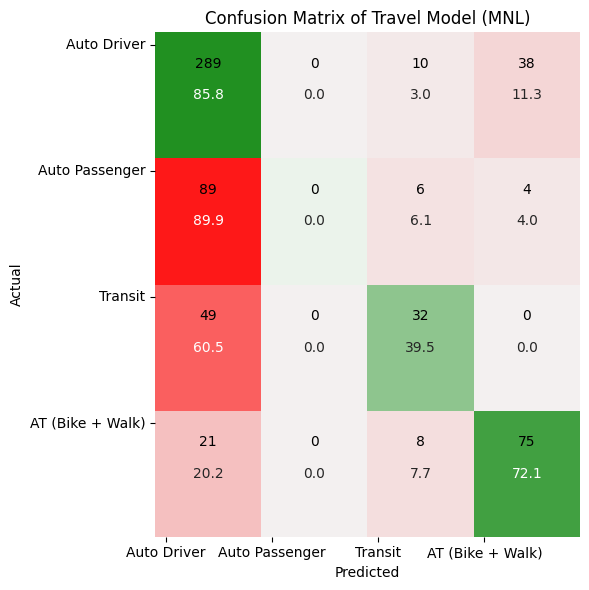

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

# Define category labels and indices mapping
category_labels = ['Auto Driver', 'Auto Passenger', 'Transit', 'AT (Bike + Walk)']
category_indices = {label: idx for idx, label in enumerate(category_labels)}


# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)

    # Set xticks and yticks with category labels
    ax.set_xticks(np.arange(len(category_labels)) + 0.1)
    ax.set_yticks(np.arange(len(category_labels)) + 0.1)
    ax.set_xticklabels(category_labels, rotation=0)
    ax.set_yticklabels(category_labels, rotation=0)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 6))  # Change to 1 subplot

# Confusion matrix for Task 2
conf_matrix2 = calculate_confusion_matrix(y_test_task2_MNL, MNL_predicted_choices)
plot_confusion_matrix(axs, conf_matrix2, 'Confusion Matrix of Travel Model (MNL)')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy2 = accuracy_score(y_test_task2_MNL, MNL_predicted_choices)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

loss2 = cross_entropy_loss(MNL_predicted_choices, y_test_task2_MNL)

# Calculate precision, recall, and F1-score for each task
precision2 = precision_score(y_test_task2_MNL, MNL_predicted_choices, average='weighted')

recall2 = recall_score(y_test_task2_MNL, MNL_predicted_choices, average='weighted')

f1_score2 = f1_score(y_test_task2_MNL, MNL_predicted_choices, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 2"],
    "Overall Accuracy": [overall_accuracy2],
    "Cross-Entropy Loss": [loss2],
    "Precision": [precision2],
    "Recall": [recall2],
    "F1 Score": [f1_score2]
}

results_df = pd.DataFrame(data)
results_df


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Task  Overall Accuracy  Cross-Entropy Loss  Precision    Recall  F1 Score
0  Task 2          0.637681           13.904499    0.53196  0.637681  0.574175

### Running Time

In [ ]:
x_test

Driving_minutes  Driving_km  Transit_minutes  Transit_km  \
718          0.722454    0.554579         0.473890   -0.112127   
2940        -0.530245   -0.471237        -0.460478   -0.254361   
3065        -0.899578   -0.690078        -0.559386   -0.287780   
1613        -0.514775   -0.388827        -0.196074   -0.234353   
1190         0.017703   -0.059014         0.480016   -0.097232   
...               ...         ...              ...         ...   
2916        -0.737380   -0.613104        -0.545388   -0.272360   
2495        -0.845327   -0.597978        -0.528554   -0.272483   
1187         0.757257    0.894027         0.037326   -0.072754   
2881        -1.137856   -0.788159        -0.648789   -0.302159   
1173        -0.431249   -0.327271        -0.476708   -0.237465   

      Biking_minutes  Biking_km  Walking_minutes  Walking_km     BS_SD  \
718         0.279611   0.430185         0.456057    0.502644 -0.303258   
2940       -0.437494  -0.493896        -0.507788   -0.518077  0.090221   
3065       -0.630697  -0.678406        -0.692253   -0.697100 -0.373299   
1613       -0.431561  -0.388925        -0.376837   -0.367877 -0.385103   
1190       -0.149769  -0.071996        -0.051095   -0.024373 -0.360947   
...              ...        ...              ...         ...       ...   
2916       -0.554290  -0.597632        -0.605276   -0.618187 -0.402601   
2495       -0.564512  -0.591723        -0.620479   -0.625242 -0.358133   
1187        0.560998   0.756114         0.639628    0.665341 -0.391756   
2881       -0.705320  -0.772992        -0.783528   -0.786073 -0.393012   
1173       -0.367094  -0.329774        -0.316670   -0.303657 -0.388894   

          SW_A      BL_A   HD_DIST    LMIX_A    CBD_SD  HHIncome  \
718  -1.036539  0.106135  0.190665  0.159369  0.544260         4   
2940  1.695200 -0.051185 -0.580068  1.042198 -1.036141         3   
3065  0.968586  0.540426 -0.817671 -0.277490 -0.601243         2   
1613 -0.578482  0.393105  0.078417  0.808465  0.126035         1   
1190 -0.938985 -0.073389 -0.260697 -1.192694  1.793216         5   
...        ...       ...       ...       ...       ...       ...   
2916  1.423348  1.272932 -0.720483  0.519470 -0.467444         2   
2495 -0.807654 -0.265962 -0.217952  0.362417  0.386918         3   
1187 -0.065390  0.320534  0.833399  0.476305  0.524319         4   
2881 -0.070514  2.248444 -0.469840  0.657364  0.267623         5   
1173  2.060822  0.249125 -0.688327  0.887097 -0.981943         4   

      Vehicle_by_PplNum  Bike_by_PplNum  Gender       Age  FTE  
718            1.000000        0.000000       1 -1.212634    1  
2940           1.372619        1.474524       1 -0.541938    1  
3065           0.792575        0.292575       2 -0.053821    1  
1613           0.250000        0.250000       2  0.947346    1  
1190           0.666667        0.000000       1 -0.826924    1  
...                 ...             ...     ...       ...  ...  
2916           0.291027        2.000000       1 -0.518355    1  
2495           0.250000        0.000000       1 -0.635266    1  
1187           1.000000        0.500000       1 -0.132644    1  
2881           0.533282        1.233359       1 -0.898931    1  
1173           1.000000        1.000000       1 -0.132644    1  

[621 rows x 20 columns]

In [ ]:
import pandas as pd

# Assuming x_test is already defined with 621 rows
rows_needed = 100000
current_rows = len(x_test)

# Calculate the number of times to repeat the DataFrame
repeat_factor = rows_needed // current_rows + 1

# Repeat the DataFrame
x_test_expanded = pd.concat([x_test] * repeat_factor, ignore_index=True)

# Truncate to exactly 100,000 rows
x_test_expanded = x_test_expanded.iloc[:rows_needed]

print(f"Original number of rows: {current_rows}")
print(f"Number of rows after expansion: {len(x_test_expanded)}")


Original number of rows: 621
Number of rows after expansion: 100000


In [ ]:
print(x_test_expanded)

       Driving_km  Transit_minutes  Walking_km    LMIX_A    CBD_SD  HHIncome  \
0        0.554579         0.473890    0.502644  0.159369  0.544260         4   
1       -0.471237        -0.460478   -0.518077  1.042198 -1.036141         3   
2       -0.690078        -0.559386   -0.697100 -0.277490 -0.601243         2   
3       -0.388827        -0.196074   -0.367877  0.808465  0.126035         1   
4       -0.059014         0.480016   -0.024373 -1.192694  1.793216         5   
...           ...              ...         ...       ...       ...       ...   
99995   -0.659801        -0.533221   -0.651051  1.429461 -1.021423         1   
99996   -0.542270        -0.408526   -0.570806 -0.583536 -0.652049         3   
99997   -0.789473        -0.680860   -0.802111  0.392647 -1.123940         5   
99998   -0.723903        -0.596669   -0.731170  1.149957 -1.151292         3   
99999   -0.402138        -0.378832   -0.413092 -0.017210  0.135047         1   

       Vehicle_by_PplNum  Bike_by_PplNu

In [ ]:
print(x_test)

      Driving_km  Transit_minutes  Walking_km    LMIX_A    CBD_SD  HHIncome  \
718     0.554579         0.473890    0.502644  0.159369  0.544260         4   
2940   -0.471237        -0.460478   -0.518077  1.042198 -1.036141         3   
3065   -0.690078        -0.559386   -0.697100 -0.277490 -0.601243         2   
1613   -0.388827        -0.196074   -0.367877  0.808465  0.126035         1   
1190   -0.059014         0.480016   -0.024373 -1.192694  1.793216         5   
...          ...              ...         ...       ...       ...       ...   
2916   -0.613104        -0.545388   -0.618187  0.519470 -0.467444         2   
2495   -0.597978        -0.528554   -0.625242  0.362417  0.386918         3   
1187    0.894027         0.037326    0.665341  0.476305  0.524319         4   
2881   -0.788159        -0.648789   -0.786073  0.657364  0.267623         5   
1173   -0.327271        -0.476708   -0.303657  0.887097 -0.981943         4   

      Vehicle_by_PplNum  Bike_by_PplNum       Age  

In [ ]:
import numpy as np

# Assuming x_test is your new dataset
# Replace the following with actual values or data access from x_test

# Example values (replace with actual data from x_test)
#Driving_minutes = x_test_expanded['Driving_minutes']
Driving_km = x_test_expanded['Driving_km']
Transit_minutes = x_test_expanded['Transit_minutes']
#Transit_km = x_test_expanded['Transit_km']
#Biking_minutes = x_test_expanded['Biking_minutes']
#Biking_km = x_test_expanded['Biking_km']
Age = x_test_expanded['Age']
#Gender = x_test_expanded['Gender']
HHIncome = x_test_expanded['HHIncome']
#BS_SD = x_test_expanded['BS_SD']
#SW_A = x_test_expanded['SW_A']
#BL_A = x_test_expanded['BL_A']
#HD_DIST = x_test_expanded['HD_DIST']
LMIX_A = x_test_expanded['LMIX_A']
CBD_SD = x_test_expanded['CBD_SD']
Vehicle_by_PplNum = x_test_expanded['Vehicle_by_PplNum']
Bike_by_PplNum = x_test_expanded['Bike_by_PplNum']
FTE = x_test_expanded['FTE']



In [ ]:
B_Age = 0.1840633552001596
B_BS_SD = -0.31851045323713995
B_Bike_by_PplNum = 1.0789653144733018
B_Biking_minutes = -8.179478076225491
B_CBD_SD = -0.3057605373471047
B_Driving_minutes = -0.8426425116761415
B_FTE = 0.4259537024426396
B_HHIncome = 0.09804756581954081
B_LMIX_A = -0.15361875244713924
B_SW_A = -0.20048474943245212
B_Transit_minutes = -2.7277023864033167
B_Vehicle_by_PplNum = 2.925800945899231
V_AP = 3.662852773461348
V_D = 4.503724035200512
V_Transit = 4.708298432421895


In [ ]:
B_LMIX_A

-0.15361875244713924

In [ ]:
LMIX_A

0        0.159369
1        1.042198
2       -0.277490
3        0.808465
4       -1.192694
           ...   
99995    1.429461
99996   -0.583536
99997    0.392647
99998    1.149957
99999   -0.017210
Name: LMIX_A, Length: 100000, dtype: float64

In [ ]:
# Definition of the utility function
U_V1 = V_D + B_Driving_minutes * Driving_minutes+\
B_LMIX_A * LMIX_A + B_HHIncome * HHIncome +\
B_Age * Age + B_Vehicle_by_PplNum * Vehicle_by_PplNum + B_FTE * FTE

U_V2 = V_AP + B_Driving_minutes * Driving_minutes +\
B_LMIX_A * LMIX_A + B_HHIncome * HHIncome +\
B_Vehicle_by_PplNum * Vehicle_by_PplNum

U_V3 = V_Transit + B_Transit_minutes * Transit_minutes + B_BS_SD* BS_SD + B_SW_A * SW_A +\
B_LMIX_A * LMIX_A + B_HHIncome * HHIncome +\
B_Age * Age + B_FTE * FTE

U_V4 = B_Biking_minutes * Biking_minutes +\
B_CBD_SD * CBD_SD+\
B_Vehicle_by_PplNum * Vehicle_by_PplNum + B_Bike_by_PplNum * Bike_by_PplNum


BiogemeError: Invalid expression during addition to (`4.503724035200512` + (`-0.8426425116761415` * Driving_minutes)): [0       -0.024482
1       -0.160101
2        0.042628
3       -0.124195
4        0.183220
           ...   
99995   -0.219592
99996    0.089642
99997   -0.060318
99998   -0.176655
99999    0.002644
Name: LMIX_A, Length: 100000, dtype: float64]

In [ ]:
import time

In [ ]:
start = time.monotonic()

# Calculate choice probabilities using softmax function
exp_U_V1 = np.exp(U_V1)
exp_U_V2 = np.exp(U_V2)
exp_U_V3 = np.exp(U_V3)
exp_U_V4 = np.exp(U_V4)

sum_exp_U = exp_U_V1 + exp_U_V2 + exp_U_V3 + exp_U_V4

P_V1 = exp_U_V1 / sum_exp_U
P_V2 = exp_U_V2 / sum_exp_U
P_V3 = exp_U_V3 / sum_exp_U
P_V4 = exp_U_V4 / sum_exp_U

# Predict the choice with the highest probability
MNL_predicted_choices = np.argmax(np.array([P_V1, P_V2, P_V3, P_V4]), axis=0)

end = time.monotonic()

print(end - start)


0.8803336380000246


In [ ]:
MNL_predicted_choices.size

1000000

In [ ]:
# Get the results in a pandas table
pandas_results = results.getEstimatedParameters()
print(pandas_results)


                        Value   Rob. Std err    Rob. t-test  Rob. p-value
B_Age                0.029708   5.702448e-15   5.209756e+12  0.000000e+00
B_BL_A              -0.036254  1.797693e+308 -2.016713e-310  1.000000e+00
B_BS_SD              0.202556   1.460243e-14   1.387139e+13  0.000000e+00
B_Bike_by_PplNum     0.000000   7.446551e-15   0.000000e+00  1.000000e+00
B_Biking_km         -4.945995   1.195822e+00  -4.136064e+00  3.533137e-05
B_Biking_minutes    -2.806768   1.266807e+00  -2.215624e+00  2.671724e-02
B_CBD_SD             0.321926   1.681999e-15   1.913950e+14  0.000000e+00
B_Driving_km         0.577403   5.232387e-01   1.103518e+00  2.698022e-01
B_Driving_minutes   -2.375143   4.078310e-01  -5.823841e+00  5.751021e-09
B_FTE                0.000000   1.350509e-15   0.000000e+00  1.000000e+00
B_Gender             1.577350   1.109945e-15   1.421107e+15  0.000000e+00
B_HD_DIST            2.921949  1.797693e+308  1.625388e-308  1.000000e+00
B_HHIncome           0.089081   4.9753

# Biogeme

In [ ]:
from google.colab import files
import pandas as pd
import biogeme.database as db

uploaded = files.upload()

df = pd.read_csv('swissmetro.dat', sep='\t')
df


Saving swissmetro.dat to swissmetro (3).dat


GROUP  SURVEY  SP    ID  PURPOSE  FIRST  TICKET  WHO  LUGGAGE  AGE  \
0          2       0   1     1        1      0       1    1        0    3   
1          2       0   1     1        1      0       1    1        0    3   
2          2       0   1     1        1      0       1    1        0    3   
3          2       0   1     1        1      0       1    1        0    3   
4          2       0   1     1        1      0       1    1        0    3   
...      ...     ...  ..   ...      ...    ...     ...  ...      ...  ...   
10723      3       1   1  1192        4      1       7    1        0    5   
10724      3       1   1  1192        4      1       7    1        0    5   
10725      3       1   1  1192        4      1       7    1        0    5   
10726      3       1   1  1192        4      1       7    1        0    5   
10727      3       1   1  1192        4      1       7    1        0    5   

       MALE  INCOME  GA  ORIGIN  DEST  TRAIN_AV  CAR_AV  SM_AV  TRAIN_TT  \
0         0       2   0       2     1         1       1      1       112   
1         0       2   0       2     1         1       1      1       103   
2         0       2   0       2     1         1       1      1       130   
3         0       2   0       2     1         1       1      1       103   
4         0       2   0       2     1         1       1      1       130   
...     ...     ...  ..     ...   ...       ...     ...    ...       ...   
10723     1       3   0       2    20         1       1      1       148   
10724     1       3   0       2    20         1       1      1       148   
10725     1       3   0       2    20         1       1      1       148   
10726     1       3   0       2    20         1       1      1       178   
10727     1       3   0       2    20         1       1      1       148   

       TRAIN_CO  TRAIN_HE  SM_TT  SM_CO  SM_HE  SM_SEATS  CAR_TT  CAR_CO  \
0            48       120     63     52     20         0     117      65   
1            48        30     60     49     10         0     117      84   
2            48        60     67     58     30         0     117      52   
3            40        30     63     52     20         0      72      52   
4            36        60     63     42     20         0      90      84   
...         ...       ...    ...    ...    ...       ...     ...     ...   
10723        13        30     93     17     30         0     156      56   
10724        12        30     96     16     10         0      96      70   
10725        16        60     93     16     20         0      96      56   
10726        16        30     96     17     30         0      96      91   
10727        13        60     96     21     30         0     120      70   

       CHOICE  
0           2  
1           2  
2           2  
3           2  
4           2  
...       ...  
10723       2  
10724       3  
10725       3  
10726       2  
10727       3  

[10728 rows x 28 columns]

In [ ]:
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta
from biogeme.expressions import Variable


df = pd.read_csv('swissmetro.dat', sep='\t')
database = db.Database('swissmetro', df)


In [ ]:
# Definition of variables
GROUP = Variable('GROUP')
SURVEY = Variable('SURVEY')
SP = Variable('SP')
ID = Variable('ID')
PURPOSE = Variable('PURPOSE')
FIRST = Variable('FIRST')
TICKET = Variable('TICKET')
WHO = Variable('WHO')
LUGGAGE = Variable('LUGGAGE')
AGE = Variable('AGE')
MALE = Variable('MALE')
INCOME = Variable('INCOME')
GA = Variable('GA')
ORIGIN = Variable('ORIGIN')
DEST = Variable('DEST')
TRAIN_AV = Variable('TRAIN_AV')
CAR_AV = Variable('CAR_AV')
SM_AV = Variable('SM_AV')
TRAIN_TT = Variable('TRAIN_TT')
TRAIN_CO = Variable('TRAIN_CO')
TRAIN_HE = Variable('TRAIN_HE')
SM_TT = Variable('SM_TT')
SM_CO = Variable('SM_CO')
SM_HE = Variable('SM_HE')
SM_SEATS = Variable('SM_SEATS')
CAR_TT = Variable('CAR_TT')
CAR_CO = Variable('CAR_CO')
CHOICE = Variable('CHOICE')




In [ ]:
# Remove some observations from the database
remove = (((database.data.PURPOSE != 1) &
         (database.data.PURPOSE != 3)) |
         (database.data.CHOICE == 0))
database.data.drop(database.data[remove].index,inplace=True)


In [ ]:
# Definitio of new variables
SM_COST = database.DefineVariable('SM_COST', SM_CO * (GA == 0))
TRAIN_COST = database.DefineVariable('TRAIN_COST', TRAIN_CO * (GA == 0))
CAR_AV_SP = database.DefineVariable('CAR_AV_SP', CAR_AV * (SP != 0))
TRAIN_AV_SP = database.DefineVariable('TRAIN_AV_SP', TRAIN_AV * (SP != 0))
TRAIN_TT_SCALED = database.DefineVariable('TRAIN_TT_SCALED', TRAIN_TT / 100)
TRAIN_COST_SCALED = database.DefineVariable('TRAIN_COST_SCALED', TRAIN_COST / 100)
SM_TT_SCALED = database.DefineVariable('SM_TT_SCALED', SM_TT / 100)
SM_COST_SCALED = database.DefineVariable('SM_COST_SCALED', SM_COST / 100)
CAR_TT_SCALED = database.DefineVariable('CAR_TT_SCALED', CAR_TT / 100)
CAR_CO_SCALED = database.DefineVariable('CAR_CO_SCALED', CAR_CO / 100)


In [ ]:
# Parameters to be estimated
ASC_CAR = Beta('ASC_CAR', 0, None, None, 0)
ASC_TRAIN = Beta('ASC_TRAIN', 0, None, None, 0)
ASC_SM = Beta('ASC_SM', 0, None, None, 1)
B_TIME = Beta('B_TIME', 0, None, None, 0)
B_COST = Beta('B_COST', 0, None, None, 0)


In [ ]:
# Definition of the utility function
V1 = ASC_TRAIN + B_TIME * TRAIN_TT_SCALED + B_COST * TRAIN_COST_SCALED

V2 = ASC_SM + B_TIME * SM_TT_SCALED + B_COST * SM_COST_SCALED + TRAIN_COST_SCALED

V3 = ASC_CAR + B_TIME * CAR_TT_SCALED + B_COST * CAR_CO_SCALED


In [ ]:
# Associate utility functions with the numbering of alternatives.
V = {1: V1, 2: V2, 3: V3}


In [ ]:
# Associate the availability conditions with the alternatives.
av = {1: TRAIN_AV_SP, 2: SM_AV, 3: CAR_AV_SP}


In [ ]:
# Definition of the model. This is the contribution of each observation to the log likelihood function.
logprob = models.loglogit(V, av, CHOICE)


In [ ]:
# Create the Biogeme object.
the_biogeme = bio.BIOGEME(database, logprob)
the_biogeme.modelName = 'b01logit'


In [ ]:
# Calculate the null log likelihood for reporting.
the_biogeme.calculateNullLoglikelihood(av)


-6964.662979191462

In [ ]:
# Estimate the parameters.
results = the_biogeme.estimate()
print(results.short_summary())


Results for model b01logit
Nbr of parameters:		4
Sample size:			6768
Excluded data:			0
Null log likelihood:		-6964.663
Final log likelihood:		-5220.089
Likelihood ratio test (null):		3489.149
Rho square (null):			0.25
Rho bar square (null):			0.25
Akaike Information Criterion:	10448.18
Bayesian Information Criterion:	10475.46



In [ ]:
# Get the results in a pandas table
pandas_results = results.getEstimatedParameters()
print(pandas_results)


              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_CAR    0.415215      0.059524     6.975597  3.045786e-12
ASC_TRAIN -0.347927      0.081506    -4.268758  1.965645e-05
B_COST    -1.843713      0.073641   -25.036464  0.000000e+00
B_TIME    -0.997552      0.103754    -9.614620  0.000000e+00


In [ ]:
import pandas as pd
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta, Variable

# Example data
df = pd.DataFrame({
    'choice': [0, 1, 0, 1, 2, 0, 1, 2],
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8],
    'feature2': [1, 1, 2, 2, 3, 3, 4, 4]
})

# Load data into a Biogeme database
database = db.Database('example', df)

# Define variables from the database with unique names
biogeme_feature1 = Variable('feature1')
biogeme_feature2 = Variable('feature2')
biogeme_choice = Variable('choice')

# Parameters to be estimated
beta_feature1 = Beta('beta_feature1', 0, None, None, 0)
beta_feature2 = Beta('beta_feature2', 0, None, None, 0)

# Utility functions
V0 = beta_feature1 * biogeme_feature1
V1 = beta_feature1 * biogeme_feature1 + beta_feature2 * biogeme_feature2
V2 = beta_feature2 * biogeme_feature2

# Associate utility functions with the alternatives
V = {0: V0, 1: V1, 2: V2}

# Availability of alternatives (assume all are available)
av = {0: 1, 1: 1, 2: 1}

# Choice model
logprob = models.loglogit(V, av, biogeme_choice)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)

# Estimate the parameters
results = biogeme.estimate()

print(results.getEstimatedParameters())


                  Value  Rob. Std err  Rob. t-test  Rob. p-value
beta_feature1 -0.010796      0.174955    -0.061708      0.950796
beta_feature2  0.041502      0.305525     0.135840      0.891948


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier object
random_forest_model = RandomForestClassifier()

# Train the model using the training data
rf_mdl_task2 = random_forest_model.fit(x_train, y_train_task2)



In [ ]:
rf_mdl_task2_prediction = rf_mdl_task2.predict(x_test)

In [ ]:
# Convert w to a pandas Series
y_pred_classes2 = pd.Series(rf_mdl_task2_prediction)
# Convert y_test_task1 to a pandas Series if it's not already
y_true_classes2 = pd.Series(y_test_task2)


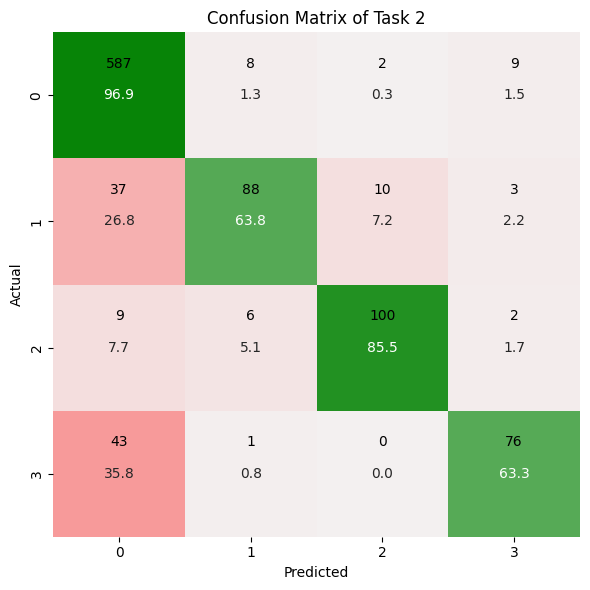

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from sklearn.metrics import confusion_matrix

# Function to calculate confusion matrix
def calculate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to plot confusion matrix with color variation
def plot_confusion_matrix(ax, conf_matrix, title):
    # Calculate percentages based on the total number of predictions for each class
    total_predictions = conf_matrix.sum(axis=1)
    total_predictions_matrix = np.transpose(np.tile(total_predictions, (conf_matrix.shape[0], 1)))
    percentages = conf_matrix / total_predictions_matrix * 100

    # Define color maps with normalization from 0 to 100
    norm = Normalize(vmin=0, vmax=100)
    green_cmap = sns.light_palette("green", as_cmap=True, n_colors=100)
    red_cmap = sns.light_palette("red", as_cmap=True, n_colors=100)

    # Plot heatmap with diagonal cells from light green to strong green and others from light red to dark red
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=green_cmap, cbar=False, ax=ax, mask=~np.eye(len(conf_matrix), dtype=bool), norm=norm)
    sns.heatmap(percentages, annot=True, fmt=".1f", cmap=red_cmap, cbar=False, ax=ax, mask=np.eye(len(conf_matrix), dtype=bool), norm=norm)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j + 0.5, i + 0.25, f'{conf_matrix[i, j]}',
                    ha='center', va='center', color='black', fontsize=10)


    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 6))  # Change to 1 subplot

# Confusion matrix for Task 1
conf_matrix1 = calculate_confusion_matrix(y_true_classes2, y_pred_classes2)
plot_confusion_matrix(axs, conf_matrix1, 'Confusion Matrix of Task 2')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Calculate overall accuracy for each task
overall_accuracy2 = accuracy_score(y_true_classes2, y_pred_classes2)

# Calculate cross-entropy loss for each task
def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

#loss2 = cross_entropy_loss(y_pred_task2, y_test_task2)

# Calculate precision, recall, and F1-score for each task
precision2 = precision_score(y_true_classes2, y_pred_classes2, average='weighted')

recall2 = recall_score(y_true_classes2, y_pred_classes2, average='weighted')

f1_score2 = f1_score(y_true_classes2, y_pred_classes2, average='weighted')


# Create a DataFrame to display the results
data = {
    "Task": ["Task 2"],
    "Overall Accuracy": [overall_accuracy2],
#    "Cross-Entropy Loss": [loss2],
    "Precision": [precision2],
    "Recall": [recall2],
    "F1 Score": [f1_score2]
}

results_df = pd.DataFrame(data)
results_df
